# Time Series Fundamentals with Tensorflow

* Docs -> https://www.tensorflow.org/tutorials/structured_data/time_series


* Dataset Link -> https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

## Explaination

> The `BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv` file has roughly ~8yrs of bitcoin prices, calculated on a daily basis which amounts to `2787` samples.

> Typically a machine learning models requires `lots and lots of samples`.

> In `time series problems`, we will be often coming across datasets which do not have `sufficient or smaller number of samples`.

### Seasonality

> The frequency at which a time series value is collected is often referred to as `seasonality`. This is usually mesaured in number of samples per year. For example, collecting the price of Bitcoin once per day would result in a time series with a `seasonality of 365`. Time series data collected with different seasonality values often exhibit seasonal patterns (`e.g.` electricity demand behing higher in Summer months for air conditioning than Winter months)

In [1]:
!wget https://raw.githubusercontent.com/arghanath007/MachineLearning/main/helper_functions.py

--2022-09-12 12:04:38--  https://raw.githubusercontent.com/arghanath007/MachineLearning/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27621 (27K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  26.97K  --.-KB/s    in 0.003s  

2022-09-12 12:04:38 (9.94 MB/s) - ‘helper_functions.py’ saved [27621/27621]



In [321]:
from helper_functions import model_check_point_callback, plot_loss_curves, create_early_stopping_callback, reduce_learning_rate_callback, model_check_point_callback

## Getting the data

In [3]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2022-09-12 12:04:41--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.02s   

2022-09-12 12:04:41 (10.5 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



In [4]:
import pandas as pd

In [5]:
bitcoin_df= pd.read_csv('/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv', parse_dates=["Date"], index_col=["Date"])
bitcoin_df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


## Getting the Data

Link -> https://finance.yahoo.com/quote/BTC-USD/

In [6]:
!wget https://media.githubusercontent.com/media/arghanath007/MachineLearning/main/Time%20Series/BTC-USD.csv

--2022-09-12 12:04:41--  https://media.githubusercontent.com/media/arghanath007/MachineLearning/main/Time%20Series/BTC-USD.csv
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 74121 (72K) [text/plain]
Saving to: ‘BTC-USD.csv’

BTC-USD.csv         100%[===================>]  72.38K  --.-KB/s    in 0.008s  

2022-09-12 12:04:42 (9.32 MB/s) - ‘BTC-USD.csv’ saved [74121/74121]



In [7]:
bitcoin_df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [8]:
bitcoin_updated_df= pd.read_csv('/content/BTC-USD.csv', parse_dates=["Date"], index_col=["Date"])
bitcoin_updated_df.head()

,Close
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [9]:
len(bitcoin_updated_df)

3262

In [10]:
len(bitcoin_df)

2787

In [11]:
bitcoin_updated_df.tail()

,Close
Date,
2022-09-01,20127.140625
2022-09-02,19969.771484
2022-09-03,19832.087891
2022-09-04,19986.712891
2022-09-05,19728.171875


In [12]:
bitcoin_df.tail()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292
2021-05-17,BTC,45604.615754,46805.537852,49670.414174,43868.638969
2021-05-18,BTC,43144.471291,46439.336570,46622.853437,42102.346430


## DataFrame `Info`

In [13]:
bitcoin_updated_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3262 entries, 2013-10-01 to 2022-09-05
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   3262 non-null   float64
dtypes: float64(1)
memory usage: 51.0 KB


In [14]:
bitcoin_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [15]:
bitcoin_updated_df.describe()

,Close
count,3262.000000
mean,11339.245271
std,15997.256465
min,108.584830
25%,577.478226
50%,5294.078369
75%,11098.937500
max,67566.828125


In [16]:
len(bitcoin_df) / 365

7.635616438356164

## Visualizing the dataset

In [17]:
bitcoin_updated_df[:5]

,Close
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [18]:
bitcoin_prices= pd.DataFrame(bitcoin_updated_df['Close']).rename(columns={"Close": "Price"})
bitcoin_prices

,Price
Date,
2013-10-01,123.654990
2013-10-02,125.455000
2013-10-03,108.584830
2013-10-04,118.674660
2013-10-05,121.338660
...,...
2022-09-01,20127.140625
2022-09-02,19969.771484
2022-09-03,19832.087891


In [19]:
import matplotlib.pyplot as plt


Text(0.5, 1.0, 'Price of Bitcon')

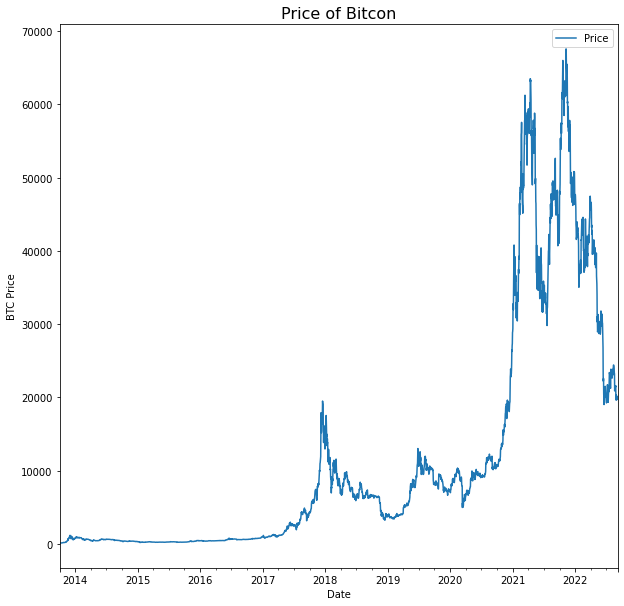

In [20]:
bitcoin_prices.plot(figsize=(10,10))
plt.ylabel("BTC Price")
plt.title("Price of Bitcon", fontsize=16)

In [21]:
bitcoin_df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [22]:
bitcoin_updated_df.head()

,Close
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


## Importing the `bitcon prices csv file using python`

Link -> https://realpython.com/python-csv/

In [23]:
import csv
from datetime import datetime

timesteps=[]
btc_prices=[]

with open('/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv', 'r') as f:
  csv_reader = csv.reader(f, delimiter=",")
  next(csv_reader)
  for line in csv_reader:
      timesteps.append(datetime.strptime(line[1], "%Y-%m-%d")) # get the dates as dates (not strings), strptime = string parse time
      btc_prices.append(float(line[2])) # get the closing price as float

# View first 10 of each
timesteps[:10], btc_prices[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

In [24]:
import csv
from datetime import datetime

timesteps=[]
btc_prices=[]

with open('/content/BTC-USD.csv', 'r') as f:
  csv_reader = csv.reader(f, delimiter=",")
  next(csv_reader)
  for line in csv_reader:
      timesteps.append(datetime.strptime(line[0], "%Y-%m-%d")) # get the dates as dates (not strings), strptime = string parse time
      btc_prices.append(float(line[1])) # get the closing price as float

# View first 10 of each
timesteps[:10], btc_prices[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

## Visualizing the dataset

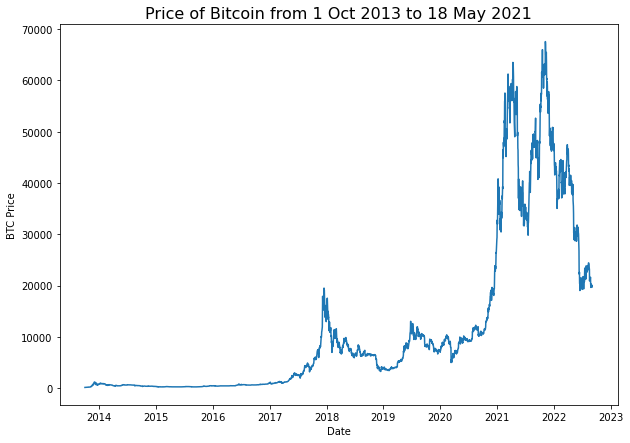

In [25]:
plt.figure(figsize=(10, 7))
plt.plot(timesteps, btc_prices)
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.xlabel("Date")
plt.ylabel("BTC Price");

## `Format Data Type 1`: Creating the train and test datasets from the time series dataset

In [26]:
bitcoin_prices[:5]

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


### Creating the datasets the `wrong way`

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
timesteps= bitcoin_prices.index.to_numpy()
prices= bitcoin_prices['Price'].to_numpy()

timesteps[:5], prices[:5]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000'], dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866]))

In [29]:
X_train, X_test, y_train, y_test= train_test_split(timesteps, prices, test_size=0.2, random_state=22)

len(X_train), len(X_test), X_train.shape, X_test.shape

(2609, 653, (2609,), (653,))

## Let's plot wrong train and test splits

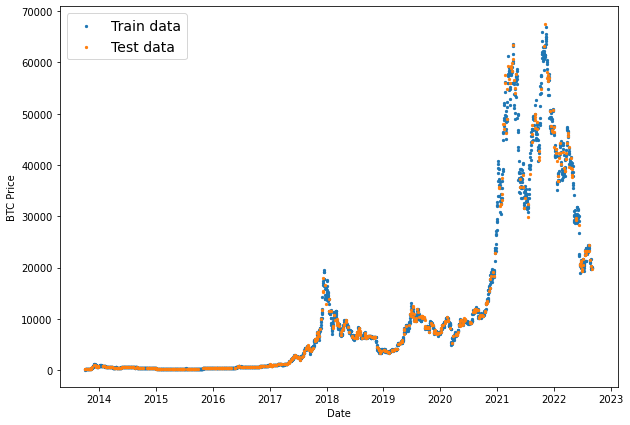

In [30]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

### Creating the datasets the `right way`

In [31]:
split_sizes= int(0.8 * len(prices))

X_train, y_train= timesteps[:split_sizes], prices[:split_sizes]

X_test, y_test= timesteps[split_sizes: ], prices[split_sizes: ]

len(X_train), len(X_test), len(X_train), len(X_test)

(2609, 653, 2609, 653)

### Let's plot `right` train and test splits

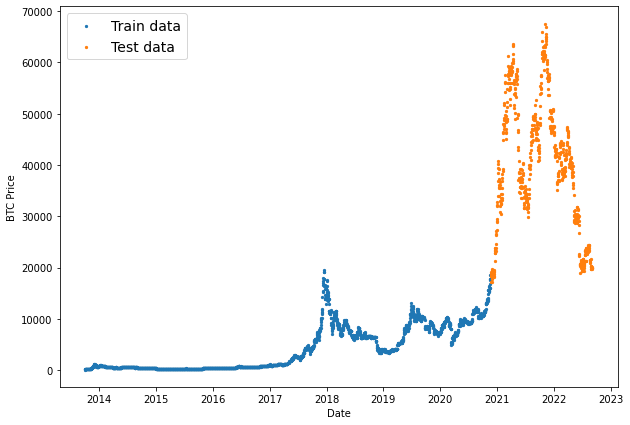

In [32]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

##Create a plotting function

> Plotting function to plot the datasets 


In [33]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, ylabel,format='.', start=0, end=None, label=None):
  """
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).
  
  Parameters
  ---------
  timesteps : array of timesteps
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (setting a value will index from end of timesteps & values)
  label : label to show on plot of values
  ylabel: The ylabel of the plot, string type.
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel(ylabel)
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

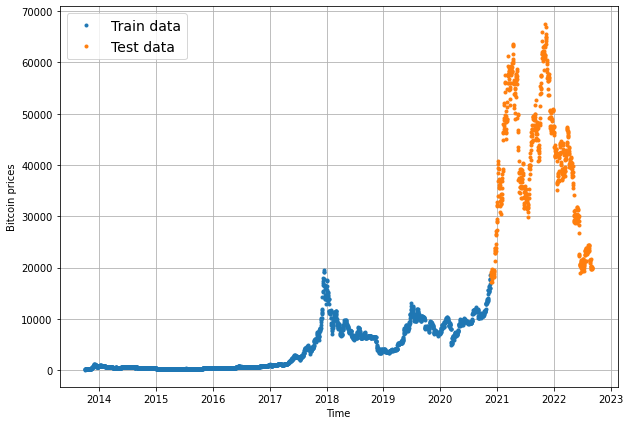

In [34]:
# Try out our plotting function
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data", ylabel="Bitcoin prices")
plot_time_series(timesteps=X_test, values=y_test, label="Test data", ylabel="Bitcoin prices")

## Modelling Experiments

> Before we discuss what modelling experiments we're going to run, there are two terms you should be familiar with, horizon and window.

* **Horizon** = `number of timesteps to predict into future`
* **Window size**= `number of timesteps from past used to predict horizon`

> For example, if we wanted to predict the price of Bitcoin for tomorrow (1 day in the future) using the previous week's worth of Bitcoin prices (7 days in the past), the horizon would be 1 and the window would be 7.

### Experiment List: 

| Model Number | Model Type | Horizon size | Window size | Extra data |
| ----- | ----- | ----- | ----- | ----- |
| 0 | Naïve model (baseline) | NA | NA | NA |
| 1 | Dense model | 1 | 7 | NA |
| 2 | Same as 1 | 1 | 30 | NA | 
| 3 | Same as 1 | 7 | 30 | NA |
| 4 | Conv1D | 1 | 7 | NA |
| 5 | LSTM | 1 | 7 | NA |
| 6 | Same as 1 (but with multivariate data) | 1 | 7 | Block reward size |
| 7 | [N-BEATs Algorithm](https://arxiv.org/pdf/1905.10437.pdf) | 1 | 7 | NA |
| 8 | Ensemble (multiple models optimized on different loss functions) | 1 | 7 | NA | 
| 9 | Future prediction model (model to predict future values) | 1 | 7 | NA| 
| 10 | Same as 1 (but with turkey 🦃 data introduced) | 1 | 7 | NA |


>To reiterate, as you can see, we can build many types of models for the data we're working with. But that doesn't mean that they'll perform well. Deep learning is a powerful technique but it doesn't always work. And as always, start with a simple model first and then add complexity as needed.



## `Model 0`: Naive Forecasting(baseline)

* Docs -> https://otexts.com/fpp2/simple-methods.html

In [35]:
y_test[:5]

array([18370.001953, 18364.121094, 19107.464844, 18732.121094,
       17150.623047])

### Creating a Naive forecast

In [36]:
naive_forecast= y_test[:-1]

naive_forecast[:10], naive_forecast[-10:]

(array([18370.001953, 18364.121094, 19107.464844, 18732.121094,
        17150.623047, 17108.402344, 17717.414063, 18177.484375,
        19625.835938, 18802.998047]),
 array([20260.019531, 20041.738281, 19616.814453, 20297.994141,
        19796.808594, 20049.763672, 20127.140625, 19969.771484,
        19832.087891, 19986.712891]))

In [37]:
y_test[-10:]

array([20041.738281, 19616.814453, 20297.994141, 19796.808594,
       20049.763672, 20127.140625, 19969.771484, 19832.087891,
       19986.712891, 19728.171875])

### Plotting the Naive forecast

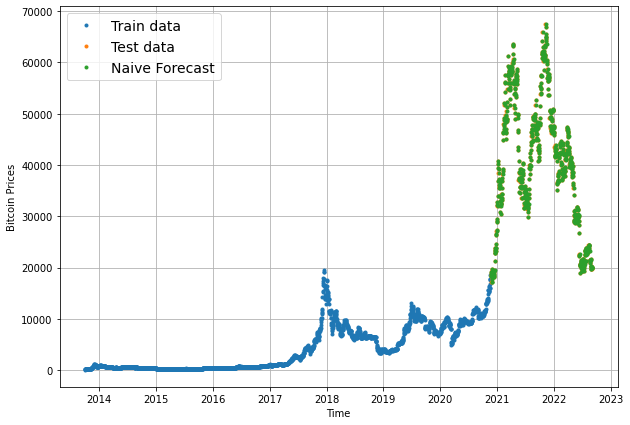

In [38]:
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data", ylabel="Bitcoin Prices")
plot_time_series(timesteps=X_test, values=y_test, label="Test data", ylabel="Bitcoin Prices")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, label="Naive Forecast", ylabel="Bitcoin Prices")

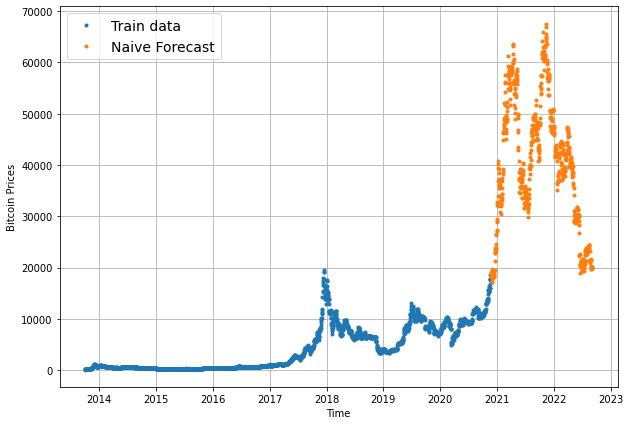

In [39]:
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data", ylabel="Bitcoin Prices")
# plot_time_series(timesteps=X_test, values=y_test, label="Test data", ylabel="Bitcoin Prices")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, label="Naive Forecast", ylabel="Bitcoin Prices")

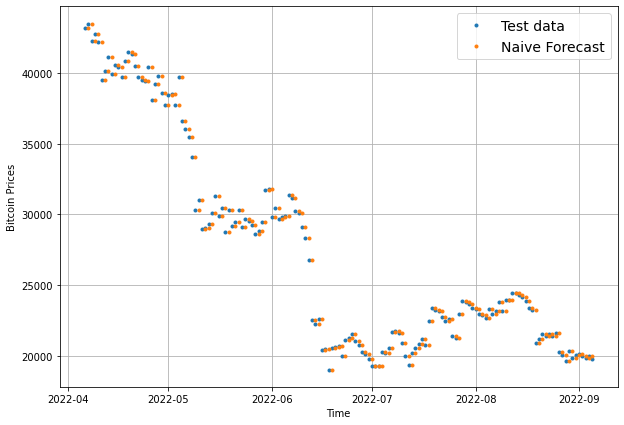

In [40]:
plt.figure(figsize=(10,7))
# plot_time_series(timesteps=X_train, values=y_train, label="Train data", ylabel="Bitcoin Prices")
plot_time_series(timesteps=X_test, values=y_test, label="Test data", start=500, ylabel="Bitcoin Prices")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, label="Naive Forecast", start=500, ylabel="Bitcoin Prices")

## Evaluating a time series model

> Time series forecasting often involves predicting a number (in our case, the price of Bitcoin). And what kind of problem is predicting a number?

> **Regression**.

With this known, we can use regression evaluation metrics to evaluate our time series forecasts.

The main thing we will be evaluating is: **how do our model's predictions (`y_pred`) compare against the actual values (`y_true` or *ground truth values*)**? 

> 📖 **Resource:** We're going to be using several metrics to evaluate our different model's time series forecast accuracy. Many of them are sourced and explained mathematically and conceptually in [Forecasting: Principles and Practice chapter 5.8](https://otexts.com/fpp3/accuracy.html), I'd recommend reading through here for a more in-depth overview of what we're going to practice.

For all of the following metrics, **lower is better** (for example an MAE of 0 is better than an MAE 100).

### Scale-dependent errors

These are metrics which can be used to compare time series values and forecasts that are on the same scale.

For example, Bitcoin historical prices in USD veresus Bitcoin forecast values in USD.

| Metric | Details | Code |
| ----- | ----- | ----- |
| **MAE** (mean absolute error) | Easy to interpret (a forecast is X amount different from actual amount). Forecast methods which minimises the MAE will lead to forecasts of the median. | [`tf.keras.metrics.mean_absolute_error()`](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/MeanAbsoluteError) |
| **RMSE** (root mean square error) | Forecasts which minimise the RMSE lead to forecasts of the mean. | `tf.sqrt(`[`tf.keras.metrics.mean_square_error()`](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/RootMeanSquaredError)`)`|

### Percentage errors

Percentage errors do not have units, this means they can be used to compare forecasts across different datasets.

| **Metric** | **Details** | **Code** |
| ----- | ----- | ----- |
| **MAPE** (mean absolute percentage error) | Most commonly used percentage error. May explode (not work) if `y=0`. | [`tf.keras.metrics.mean_absolute_percentage_error()`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/MAPE) | 
| **sMAPE** (symmetric mean absolute percentage error) | Recommended not to be used by [Forecasting: Principles and Practice](https://otexts.com/fpp3/accuracy.html#percentage-errors), though it is used in forecasting competitions. | Custom implementation |

### Scaled errors

Scaled errors are an alternative to percentage errors when comparing forecast performance across different time series.

| **Metric** | **Details** | **Code** |
| ----- | ----- | ----- |
| **MASE** (mean absolute scaled error). | MASE equals one for the naive forecast (or very close to one). A forecast which performs better than the naïve should get <1 MASE. | See sktime's [`mase_loss()`](https://github.com/alan-turing-institute/sktime/blob/ee7a06843a44f4aaec7582d847e36073a9ab0566/sktime/performance_metrics/forecasting/_functions.py#L16) |

> 🤔 **Question:** There are so many metrics... which one should I pay most attention to? It's going to depend on your problem. However, since its ease of interpretation (you can explain it in a sentence to your grandma), MAE is often a very good place to start.

Since we're going to be evaluing a lot of models, let's write a function to help us calculate evaluation metrics on their forecasts.

In [41]:
import tensorflow as tf
import numpy as np

In [42]:
# MASE implemented courtesy of sktime - https://github.com/alan-turing-institute/sktime/blob/ee7a06843a44f4aaec7582d847e36073a9ab0566/sktime/performance_metrics/forecasting/_functions.py#L16
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shifting of 1 day)

  return mae / mae_naive_no_season

In [43]:
mean_absolute_scaled_error(y_test[1:], naive_forecast).numpy()

0.9984741472055335

## Function to evaluate a time series model

In [44]:
def evaluate_preds(y_true, y_pred):
  """
    Description:
      Function to get the different evaluation metrics of a time series model.
    Parameters:
      y_true: The truth/actual values.(y_test)
      y_pred: The predicted values of the model(y_preds)
  """
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) # puts and emphasis on outliers (all errors get squared)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)
  
  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}


In [45]:
naive_results= evaluate_preds(y_test[1:], naive_forecast)
naive_results

{'mae': 1141.506761082822,
 'mse': 2592967.393714534,
 'rmse': 1610.269354398367,
 'mape': 2.8639307796373665,
 'mase': 0.9984741472055335}

In [46]:
y_test.dtype

dtype('float64')

In [47]:
naive_forecast[-10:]

array([20260.019531, 20041.738281, 19616.814453, 20297.994141,
       19796.808594, 20049.763672, 20127.140625, 19969.771484,
       19832.087891, 19986.712891])

In [48]:
tf.reduce_mean(y_test).numpy()

40268.54986610107

In [49]:
tf.reduce_max(y_test).numpy(), tf.reduce_min(y_test).numpy()

(67566.828125, 17108.402344)

## `Format Data Type 2`: Windowing dataset

> For example for a univariate time series, windowing for one week (`window=7`) to predict the next single value (`horizon=1`) might look like:

```
Window for one week (univariate time series)

[0, 1, 2, 3, 4, 5, 6] -> [7]
[1, 2, 3, 4, 5, 6, 7] -> [8]
[2, 3, 4, 5, 6, 7, 8] -> [9]
```

> Or for the price of Bitcoin, it'd look like:

```
Window for one week with the target of predicting the next day (Bitcoin prices)

[123.654, 125.455, 108.584, 118.674, 121.338, 120.655, 121.795] -> [123.033]
[125.455, 108.584, 118.674, 121.338, 120.655, 121.795, 123.033] -> [124.049]
[108.584, 118.674, 121.338, 120.655, 121.795, 123.033, 124.049] -> [125.961]
```


In [50]:
bitcoin_prices[:5]

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [51]:
len(bitcoin_prices)

3262

In [52]:
len(btc_prices)

3262

In [53]:
btc_prices[:5]

[123.65499, 125.455, 108.58483, 118.67466, 121.33866]

## Global Values for `Horizon` and `Window_Size`

In [54]:
HORIZON = 1 # predict 1 step at a time
WINDOW_SIZE = 7 # use a week worth of timesteps to predict the horizon

## Functuon to `label windowed data`

In [55]:
def get_labelled_windows(x, horizon=HORIZON):
  """
    Description:
      Creates labels for windowed dataset.
      E.g, 
        if horizon=1
        Input: [0,1,2,3,4,5,6,7] -> Output: ([0,1,2,3,4,5,6], [7])
  """

  return x[:, :-horizon], x[:, -horizon:]

In [56]:
test_window, test_label= get_labelled_windows(tf.expand_dims(tf.range(8), axis=0))
test_window.numpy(), test_label.numpy()

(array([[0, 1, 2, 3, 4, 5, 6]], dtype=int32), array([[7]], dtype=int32))

## Numpy indexing

* Docs -> https://numpy.org/doc/stable/user/basics.indexing.html#basics-indexing

### Steps for the function

1. Creates a window step of specific window size, for example: [[0, 1, 2, 3, 4, 5, 6, 7]]
2. Uses NumPy indexing to create a 2D of multiple window steps, for example:

```
[[0, 1, 2, 3, 4, 5, 6, 7],
 [1, 2, 3, 4, 5, 6, 7, 8],
 [2, 3, 4, 5, 6, 7, 8, 9]]
```

3. Uses the 2D array of multi-tuple window steps to index on a target series
4. Uses the `get_labelled_windows()` function we created above to turn the window steps into windows with a specified horizon

In [57]:
np.expand_dims(np.arange(10), axis=0)

array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])

In [58]:
np.expand_dims(np.arange(10) + 1, axis=0)

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]])

In [59]:
prices[:5]

array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866])

In [60]:
len(prices)

3262

### Function to view numpy arrays as windows

In [61]:
def make_windows(x, window_size=WINDOW_SIZE, horizon= HORIZON):
  """
    Description:
      Turns a 1D array(Univariate) into a 2D array of sequential labelled windows of "window_size" with "horizon_size" labels. 

    Returns:
      It returns a tuple (windows, labels).
  """

  # 1 Creates a window step of specific window size
  window_step= np.expand_dims(np.arange(window_size + horizon), axis=0)

  # 2 Uses NumPy indexing to create a 2D of multiple window steps
  window_indexes= window_step + np.expand_dims(np.arange(len(x) - (window_size + horizon-1)), axis=0).T # create 2D array of windows of size window_size

  # 3 Uses the 2D array of multuple window steps to index on a target series
  windowed_array= x[window_indexes]

  # 4 Uses the get_labelled_windows() function we created above to turn the window steps into windows with a specified horizon
  windows, labels= get_labelled_windows(windowed_array, horizon=horizon)
  return windows, labels

In [62]:
full_windows, full_labels= make_windows(prices)

len(full_windows), len(full_labels)

(3255, 3255)

In [63]:
# View the first 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: [125.96116]


In [64]:
# View the last 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i-3:]} -> Label: {full_labels[i-3]}")

Window: [[20041.738281 19616.814453 20297.994141 19796.808594 20049.763672
  20127.140625 19969.771484]
 [19616.814453 20297.994141 19796.808594 20049.763672 20127.140625
  19969.771484 19832.087891]
 [20297.994141 19796.808594 20049.763672 20127.140625 19969.771484
  19832.087891 19986.712891]] -> Label: [19832.087891]
Window: [[19616.814453 20297.994141 19796.808594 20049.763672 20127.140625
  19969.771484 19832.087891]
 [20297.994141 19796.808594 20049.763672 20127.140625 19969.771484
  19832.087891 19986.712891]] -> Label: [19986.712891]
Window: [[20297.994141 19796.808594 20049.763672 20127.140625 19969.771484
  19832.087891 19986.712891]] -> Label: [19728.171875]


## Tensorflow build-in function which does the same as the above function `make_windows`

* Link -> https://www.tensorflow.org/api_docs/python/tf/keras/utils/timeseries_dataset_from_array

In [65]:
# full_dataset= tf.keras.preprocessing.timeseries_dataset_from_array(prices[:-10], prices[10:], sequence_length=10)
# full_dataset

In [66]:
# len(full_dataset)

In [67]:
# 23 *7

In [68]:
# for batch in full_dataset:
#   inputs, targets = batch
#   assert np.array_equal(inputs[0], prices[:10])  # First sequence: steps [0-9]
#   assert np.array_equal(targets[0], prices[10])  # Corresponding target: step 10
#   break


In [69]:
# len(inputs)

In [70]:
# len(targets)

In [71]:
# batch[1]

In [72]:
# inputs[:-1]

In [73]:
# targets[1:]

## Turning windows into training and test sets

In [74]:
full_windows[:5], full_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]), array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

## Funtion to make train/test splits for time series problems

In [75]:
def make_train_test_split(windows, labels, test_split=0.2):
  """
    Description: 
      Splits matching pairs of windows and labels into train and test split.

    Parameters: 
      windows -> The dataset(X)
      labels -> The labels of the dataset(y)
      test_split -> The ratio in which the dataset is to be split. Default is "0.2"

    Returns: 
      It is returned in this format -> train_windows, test_windows, train_labels, test_labels
  """

  split_size= int((1- test_split) * len(windows))
  train_windows= windows[:split_size]
  train_labels= labels[:split_size]

  test_windows= windows[split_size:]
  test_labels= labels[split_size:]

  return train_windows, test_windows, train_labels, test_labels

In [76]:
train_windows, test_windows, train_labels, test_labels= make_train_test_split(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2604, 651, 2604, 651)

In [77]:
len(full_windows) * 0.8

2604.0

In [78]:
train_windows[:5]

array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  ],
       [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
        123.033  ],
       [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
        124.049  ],
       [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
        125.96116],
       [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
        125.27966]])

In [79]:
train_labels[:5]

array([[123.033  ],
       [124.049  ],
       [125.96116],
       [125.27966],
       [125.9275 ]])

In [80]:
test_windows[:5]

array([[17645.40625 , 17804.005859, 17817.089844, 18621.314453,
        18642.232422, 18370.001953, 18364.121094],
       [17804.005859, 17817.089844, 18621.314453, 18642.232422,
        18370.001953, 18364.121094, 19107.464844],
       [17817.089844, 18621.314453, 18642.232422, 18370.001953,
        18364.121094, 19107.464844, 18732.121094],
       [18621.314453, 18642.232422, 18370.001953, 18364.121094,
        19107.464844, 18732.121094, 17150.623047],
       [18642.232422, 18370.001953, 18364.121094, 19107.464844,
        18732.121094, 17150.623047, 17108.402344]])

In [81]:
test_labels[:5]

array([[19107.464844],
       [18732.121094],
       [17150.623047],
       [17108.402344],
       [17717.414063]])

In [82]:
train_windows.shape

(2604, 7)

### Check to see if same (accounting for horizon and window size)

In [83]:
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

True

## Make a modelling checkpoint callback

In [84]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename 
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), # create filepath to save model
                                            monitor='val_loss',
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True) # save only the best model to file

In [85]:
train_windows.dtype

dtype('float64')

## `Model 1`: Dense model(window=7, horizon=1)

### Steps:


* A single dense layer with 128 hidden units and ReLU (rectified linear unit) activation
* An output layer with linear activation (or no activation)
* Adam optimizer and MAE loss function
* Batch size of 128
* 100 epochs


In [86]:
import tensorflow as tf
from tensorflow.keras import layers

In [87]:
inputs= layers.Input(shape=(WINDOW_SIZE,), dtype="float64", name="model_1_inputs")
x= layers.Dense(128, activation='relu')(inputs)
outputs= layers.Dense(HORIZON, activation='linear')(x)
model_1= tf.keras.Model(inputs, outputs, name="model_1_dense")

model_1.compile(loss='mae', optimizer=tf.keras.optimizers.Adam(), metrics=['mae', 'mse'])

In [88]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model_1_inputs (InputLayer)  [(None, 7)]              0         
                                                                 
 dense (Dense)               (None, 128)               1024      
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0
_________________________________________________________________


In [89]:
history_model_1= model_1.fit(train_windows, train_labels, epochs=100, batch_size=128, validation_data=(test_windows, test_labels), callbacks=[create_model_checkpoint(model_name='model_1_dense', save_path='model_experiments')])

Epoch 1/100
21/21 [==============================] - 4s 47ms/step - loss: 4459.9648 - mae: 4459.9648 - mse: 48711020.0000 - val_loss: 10588.6816 - val_mae: 10588.6816 - val_mse: 129837536.0000
Epoch 2/100
21/21 [==============================] - 0s 22ms/step - loss: 569.1986 - mae: 569.1986 - mse: 957097.8750 - val_loss: 3210.7288 - val_mae: 3210.7288 - val_mse: 16117686.0000
Epoch 3/100
21/21 [==============================] - 0s 23ms/step - loss: 329.2430 - mae: 329.2430 - mse: 388929.0625 - val_loss: 2239.2217 - val_mae: 2239.2217 - val_mse: 8799305.0000
Epoch 4/100
21/21 [==============================] - 0s 22ms/step - loss: 246.2048 - mae: 246.2048 - mse: 253668.5000 - val_loss: 2168.1482 - val_mae: 2168.1482 - val_mse: 8197089.5000
Epoch 5/100
21/21 [==============================] - 0s 24ms/step - loss: 222.5790 - mae: 222.5790 - mse: 225364.5156 - val_loss: 2108.5315 - val_mae: 2108.5315 - val_mse: 7808614.0000
Epoch 6/100
21/21 [==============================] - 0s 22ms/step 

In [90]:
naive_results

{'mae': 1141.506761082822,
 'mse': 2592967.393714534,
 'rmse': 1610.269354398367,
 'mape': 2.8639307796373665,
 'mase': 0.9984741472055335}

### Evaluating the model

In [91]:
model_1.evaluate(test_windows, test_labels)

21/21 [==============================] - 0s 6ms/step - loss: 1212.6373 - mae: 1212.6373 - mse: 2785978.0000


[1212.6373291015625, 1212.6373291015625, 2785978.0]

In [92]:
model_1_checkpoint= tf.keras.models.load_model('/content/model_experiments/model_1_dense/')

In [93]:
model_1_checkpoint.evaluate(test_windows, test_labels)

21/21 [==============================] - 0s 4ms/step - loss: 1148.5938 - mae: 1148.5938 - mse: 2633935.0000


[1148.59375, 1148.59375, 2633935.0]

In [94]:
# model_1_pred_preds= model_1_checkpoint.predict(test_windows)
# model_1_preds= tf.argmax(model_1_pred_preds, axis=0)
# model_1_preds[:5]

In [95]:
# model_1_results= evaluate_preds(test_labels, model_1_preds)
# model_1_results

## Making a function to return the predictions of a model

In [96]:
def make_preds(model, input_data):
  """
  Description:
    Uses model to make predictions on input_data.

  Parameters:
    model: trained model 
    input_data: windowed input data (same kind of data model was trained on)

  Returns model predictions on input_data.
  """
  forecast = model.predict(input_data)
  return tf.cast(tf.squeeze(forecast), dtype="float64") # return 1D array of predictions

In [97]:
model_1_preds= make_preds(model_1_checkpoint, test_windows)
model_1_preds[:5]

<tf.Tensor: shape=(5,), dtype=float64, numpy=
array([18404.16210938, 18975.20898438, 18797.52734375, 17449.00195312,
       17131.4765625 ])>

In [98]:
model_1_results= evaluate_preds(tf.squeeze(test_labels), model_1_preds)
model_1_results

{'mae': 1148.5936359959676,
 'mse': 2633934.6304410635,
 'rmse': 1622.9401191790976,
 'mape': 2.8890927225634364,
 'mase': 1.0041326500297292}

In [99]:
naive_results

{'mae': 1141.506761082822,
 'mse': 2592967.393714534,
 'rmse': 1610.269354398367,
 'mape': 2.8639307796373665,
 'mase': 0.9984741472055335}

## Autocorrelation time series

* Link -> https://otexts.com/fpp2/autocorrelation.html#

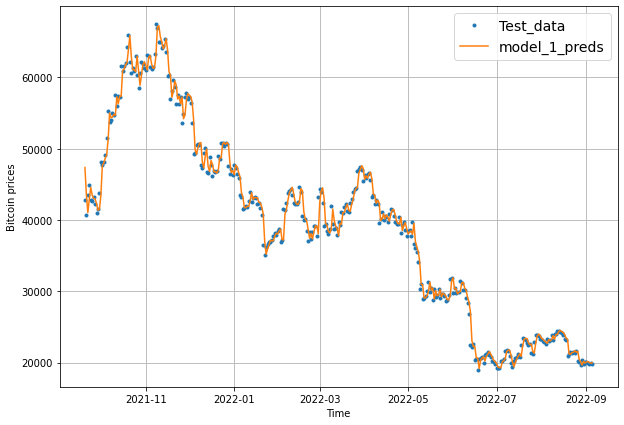

In [100]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data", ylabel="Bitcoin prices")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_1_preds, start=offset, format="-", label="model_1_preds", ylabel="Bitcoin prices")

## `Model 2`: Dense model(window=30, horizon=1)

### Steps:


* A single dense layer with 128 hidden units and ReLU (rectified linear unit) activation
* An output layer with linear activation (or no activation)
* Adam optimizer and MAE loss function
* Batch size of 128
* 100 epochs


In [101]:
WINDOW_SIZE, HORIZON

(7, 1)

In [102]:
WINDOW_SIZE= 30

inputs= layers.Input(shape=(WINDOW_SIZE,), dtype="float32", name="model_2_inputs")
x= layers.Dense(128, activation="relu")(inputs)
outputs= layers.Dense(HORIZON, activation='linear')(x)
model_2= tf.keras.Model(inputs, outputs, name="model_2_dense")

In [103]:
model_2.summary()

Model: "model_2_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model_2_inputs (InputLayer)  [(None, 30)]             0         
                                                                 
 dense_2 (Dense)             (None, 128)               3968      
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 4,097
Trainable params: 4,097
Non-trainable params: 0
_________________________________________________________________


In [104]:
WINDOW_SIZE, HORIZON

(30, 1)

## Creating the new windows datasets

In [105]:
new_30_windows, new_30_labels= make_windows(prices,WINDOW_SIZE, HORIZON)

In [106]:
len(new_30_windows), len(new_30_labels)

(3232, 3232)

## Splitting the new windows datasets

In [107]:
train_windows, test_windows, train_labels, test_labels= make_train_test_split(new_30_windows, new_30_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2585, 647, 2585, 647)

In [108]:
train_windows[:3], train_labels[:3], train_windows.shape

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  , 123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ,
         126.38333, 135.24199, 133.20333, 142.76333, 137.92333, 142.95166,
         152.55183, 160.33883, 164.31499, 177.63333, 188.29716, 200.70166,
         180.355  , 175.03166, 177.6965 , 187.15983, 192.75666, 197.4    ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  , 124.049  , 125.96116, 125.27966, 125.9275 , 126.38333,
         135.24199, 133.20333, 142.76333, 137.92333, 142.95166, 152.55183,
         160.33883, 164.31499, 177.63333, 188.29716, 200.70166, 180.355  ,
         175.03166, 177.6965 , 187.15983, 192.75666, 197.4    , 196.02499],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  , 125.96116, 125.27966, 125.9275 , 126.38333, 135.24199,
         133.20333, 142.76333, 137.92333, 142.95166, 152.55183, 160.33883,
         164.31499, 177

In [109]:
model_2.compile(loss="mse", optimizer= tf.keras.optimizers.Adam(), metrics=['mse','mae'])

history_2= model_2.fit(train_windows, train_labels, epochs=100, batch_size=128,validation_data=(test_windows, test_labels), callbacks=[create_model_checkpoint('model_2_dense')])

Epoch 1/100
21/21 [==============================] - 1s 28ms/step - loss: 4264927.0000 - mse: 4264927.0000 - mae: 1144.2703 - val_loss: 29432752.0000 - val_mse: 29432752.0000 - val_mae: 4123.6655
Epoch 2/100
21/21 [==============================] - 0s 23ms/step - loss: 786380.6875 - mse: 786380.6875 - mae: 455.3343 - val_loss: 24849860.0000 - val_mse: 24849860.0000 - val_mae: 4023.0764
Epoch 3/100
21/21 [==============================] - 1s 33ms/step - loss: 437812.7812 - mse: 437812.7812 - mae: 332.4473 - val_loss: 13957052.0000 - val_mse: 13957052.0000 - val_mae: 2884.2478
Epoch 4/100
21/21 [==============================] - 1s 34ms/step - loss: 359083.0938 - mse: 359083.0938 - mae: 300.7642 - val_loss: 10499073.0000 - val_mse: 10499073.0000 - val_mae: 2392.8069
Epoch 5/100
21/21 [==============================] - 1s 53ms/step - loss: 284724.6250 - mse: 284724.6250 - mae: 254.0534 - val_loss: 9020881.0000 - val_mse: 9020881.0000 - val_mae: 2226.9927
Epoch 6/100
21/21 [===============

### Evaluating the model

In [110]:
model_2.evaluate(test_windows, test_labels)

21/21 [==============================] - 0s 2ms/step - loss: 3211773.7500 - mse: 3211773.7500 - mae: 1354.5457


[3211773.75, 3211773.75, 1354.545654296875]

In [111]:
model_2_checkpoint= tf.keras.models.load_model('/content/model_experiments/model_2_dense/')
model_2_checkpoint

In [112]:
model_2_checkpoint.evaluate(test_windows, test_labels)

21/21 [==============================] - 0s 2ms/step - loss: 2881417.0000 - mse: 2881417.0000 - mae: 1265.0424


[2881417.0, 2881417.0, 1265.0423583984375]

### Making prediction on the model

In [113]:
model_2_preds= make_preds(model_2_checkpoint, test_windows)
model_2_preds[:5]

<tf.Tensor: shape=(5,), dtype=float64, numpy=
array([17232.90625   , 17239.04296875, 17972.5859375 , 19211.88671875,
       19120.5234375 ])>

In [114]:
model_2_results= evaluate_preds(tf.squeeze(test_labels), model_2_preds)
model_2_results

{'mae': 1265.0422744404943,
 'mse': 2881417.072801882,
 'rmse': 1697.4737325808262,
 'mape': 3.190103910145813,
 'mase': 1.1029986146978583}

In [115]:
model_1_results

{'mae': 1148.5936359959676,
 'mse': 2633934.6304410635,
 'rmse': 1622.9401191790976,
 'mape': 2.8890927225634364,
 'mase': 1.0041326500297292}

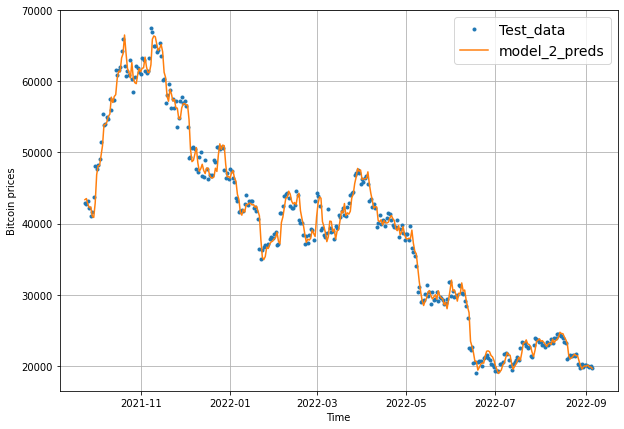

In [116]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data", ylabel="Bitcoin prices")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds, start=offset, format="-", label="model_2_preds", ylabel="Bitcoin prices")

In [117]:
WINDOW_SIZE, HORIZON

(30, 1)

## `Model 3`: Dense model(window=30, horizon=7)

### Steps:


* A single dense layer with 128 hidden units and ReLU (rectified linear unit) activation
* An output layer with linear activation (or no activation)
* Adam optimizer and MAE loss function
* Batch size of 128
* 100 epochs


## Creating the new windows datasets

In [118]:
WINDOW_SIZE= 30
HORIZON= 7
new_30_7_windows, new_30_7_labels= make_windows(prices,WINDOW_SIZE, HORIZON)

In [119]:
len(new_30_7_windows), len(new_30_7_labels)

(3226, 3226)

## Splitting the new windows datasets

In [120]:
train_windows, test_windows, train_labels, test_labels=make_train_test_split(new_30_7_windows, new_30_7_labels)

In [121]:
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2580, 646, 2580, 646)

In [122]:
train_windows[:3], train_labels[:3], train_windows.shape

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  , 123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ,
         126.38333, 135.24199, 133.20333, 142.76333, 137.92333, 142.95166,
         152.55183, 160.33883, 164.31499, 177.63333, 188.29716, 200.70166,
         180.355  , 175.03166, 177.6965 , 187.15983, 192.75666, 197.4    ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  , 124.049  , 125.96116, 125.27966, 125.9275 , 126.38333,
         135.24199, 133.20333, 142.76333, 137.92333, 142.95166, 152.55183,
         160.33883, 164.31499, 177.63333, 188.29716, 200.70166, 180.355  ,
         175.03166, 177.6965 , 187.15983, 192.75666, 197.4    , 196.02499],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  , 125.96116, 125.27966, 125.9275 , 126.38333, 135.24199,
         133.20333, 142.76333, 137.92333, 142.95166, 152.55183, 160.33883,
         164.31499, 177

In [123]:
2276 + 569

2845

### Creating the model

In [124]:
WINDOW_SIZE, HORIZON

(30, 7)

In [125]:
inputs= layers.Input(shape=(30, ), dtype="float32", name="model_3_inputs")
x= layers.Dense(128, activation="relu")(inputs)
outputs= layers.Dense(HORIZON, activation="linear")(x)

model_3= tf.keras.Model(inputs, outputs, name="model_3_dense")

In [126]:
model_3.summary()

Model: "model_3_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model_3_inputs (InputLayer)  [(None, 30)]             0         
                                                                 
 dense_4 (Dense)             (None, 128)               3968      
                                                                 
 dense_5 (Dense)             (None, 7)                 903       
                                                                 
Total params: 4,871
Trainable params: 4,871
Non-trainable params: 0
_________________________________________________________________


In [127]:
model_3.compile(loss="mae", optimizer=tf.keras.optimizers.Adam(), metrics=["mae", "mse"])

history_3= model_3.fit(train_windows, train_labels, epochs=100, batch_size=128, validation_data=(test_windows, test_labels), callbacks=[create_model_checkpoint('model_3_dense')])

Epoch 1/100
21/21 [==============================] - 1s 28ms/step - loss: 1520.3334 - mae: 1520.3334 - mse: 10091508.0000 - val_loss: 6265.6279 - val_mae: 6265.6279 - val_mse: 72216016.0000
Epoch 2/100
21/21 [==============================] - 0s 22ms/step - loss: 561.8295 - mae: 561.8295 - mse: 1270950.3750 - val_loss: 4382.8193 - val_mae: 4382.8193 - val_mse: 32790166.0000
Epoch 3/100
21/21 [==============================] - 0s 22ms/step - loss: 460.3278 - mae: 460.3278 - mse: 882966.3125 - val_loss: 3995.8997 - val_mae: 3995.8997 - val_mse: 27284800.0000
Epoch 4/100
21/21 [==============================] - 0s 22ms/step - loss: 415.6075 - mae: 415.6075 - mse: 740530.1875 - val_loss: 3651.0452 - val_mae: 3651.0452 - val_mse: 23279558.0000
Epoch 5/100
21/21 [==============================] - 0s 21ms/step - loss: 384.3097 - mae: 384.3097 - mse: 631947.5000 - val_loss: 3448.7705 - val_mae: 3448.7705 - val_mse: 21006736.0000
Epoch 6/100
21/21 [==============================] - 0s 22ms/step

### Evaluating the model

In [128]:
model_3.evaluate(test_windows, test_labels)

21/21 [==============================] - 0s 2ms/step - loss: 2504.4929 - mae: 2504.4929 - mse: 11560710.0000


[2504.492919921875, 2504.492919921875, 11560710.0]

In [129]:
model_3_checkpoint= tf.keras.models.load_model('/content/model_experiments/model_3_dense/')
model_3_checkpoint

In [130]:
model_3_checkpoint.evaluate(test_windows, test_labels)

21/21 [==============================] - 0s 2ms/step - loss: 2467.7598 - mae: 2467.7598 - mse: 11398314.0000


[2467.759765625, 2467.759765625, 11398314.0]

In [131]:
model_3_preds= make_preds(model_3_checkpoint, test_windows)
model_3_preds[:5]

<tf.Tensor: shape=(5, 7), dtype=float64, numpy=
array([[18845.49804688, 19070.21289062, 18854.171875  , 19002.26367188,
        19013.83789062, 19220.83984375, 19132.23632812],
       [18593.34179688, 18972.73242188, 18790.84570312, 18762.88671875,
        18681.94335938, 18835.796875  , 18581.89648438],
       [18802.20703125, 19373.33398438, 19191.15429688, 19018.18359375,
        18764.05664062, 19107.98632812, 18979.18945312],
       [18795.26757812, 19287.390625  , 19322.81054688, 19032.63867188,
        18929.80859375, 19383.40625   , 19290.0703125 ],
       [17581.35742188, 18011.78125   , 18040.21289062, 17986.5234375 ,
        18195.265625  , 18462.2578125 , 18191.15820312]])>

In [132]:
test_labels.shape

(646, 7)

In [133]:
tf.squeeze(test_labels).shape

TensorShape([646, 7])

In [134]:
model_3_preds.shape

TensorShape([646, 7])

In [135]:
# model_3_results_old= evaluate_preds(tf.squeeze(test_labels), model_3_preds)
# model_3_results_old

## Updated `evaluate_preds` function to calculate/work with multiple shapes of data.

In [136]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  # y_true = tf.cast(y_true, dtype=tf.float32)
  # y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # Account for different sized metrics (for longer horizons, reduce to single number)
  if mae.ndim > 0: # if mae isn't already a scalar, reduce it to one by aggregating tensors to mean, ("aggregating" means "condensing").
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

### Making Predictions with the model

In [137]:
model_3_results= evaluate_preds(test_labels, model_3_preds)
model_3_results

{'mae': 2467.759715526233,
 'mse': 11398315.091996346,
 'rmse': 2827.114208609707,
 'mape': 6.213652845127984,
 'mase': 2.146157744419862}

In [138]:
model_2_results

{'mae': 1265.0422744404943,
 'mse': 2881417.072801882,
 'rmse': 1697.4737325808262,
 'mape': 3.190103910145813,
 'mase': 1.1029986146978583}

In [139]:
model_1_results

{'mae': 1148.5936359959676,
 'mse': 2633934.6304410635,
 'rmse': 1622.9401191790976,
 'mape': 2.8890927225634364,
 'mase': 1.0041326500297292}

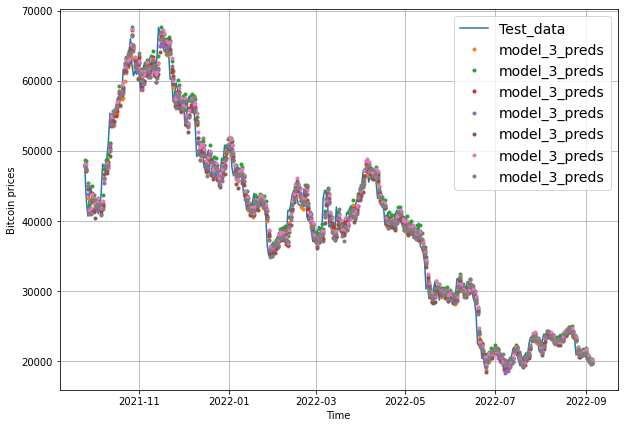

In [140]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, format="-", label="Test_data", ylabel="Bitcoin prices")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_3_preds, start=offset, label="model_3_preds", ylabel="Bitcoin prices")

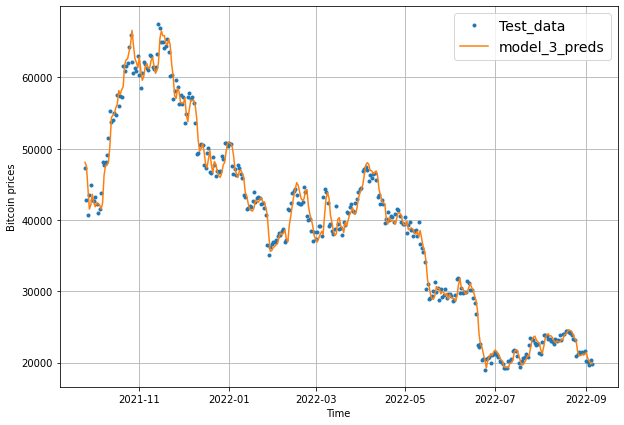

In [141]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data", ylabel="Bitcoin prices")
plot_time_series(timesteps=X_test[-len(test_windows):], values=tf.reduce_mean(model_3_preds, axis=1), format="-", start=offset, label="model_3_preds", ylabel="Bitcoin prices")

In [142]:
model_3_preds[:5]

<tf.Tensor: shape=(5, 7), dtype=float64, numpy=
array([[18845.49804688, 19070.21289062, 18854.171875  , 19002.26367188,
        19013.83789062, 19220.83984375, 19132.23632812],
       [18593.34179688, 18972.73242188, 18790.84570312, 18762.88671875,
        18681.94335938, 18835.796875  , 18581.89648438],
       [18802.20703125, 19373.33398438, 19191.15429688, 19018.18359375,
        18764.05664062, 19107.98632812, 18979.18945312],
       [18795.26757812, 19287.390625  , 19322.81054688, 19032.63867188,
        18929.80859375, 19383.40625   , 19290.0703125 ],
       [17581.35742188, 18011.78125   , 18040.21289062, 17986.5234375 ,
        18195.265625  , 18462.2578125 , 18191.15820312]])>

## Comparing the `4 Dense models`

In [143]:
dense_models= pd.DataFrame({"naive_model": naive_results, "model_1": model_1_results, "model_2": model_2_results, "model_3": model_3_results}, index=["mae"])
# dense_models=dense_models.T
dense_models

,naive_model,model_1,model_2,model_3
mae,1141.506761,1148.593636,1265.042274,2467.759716


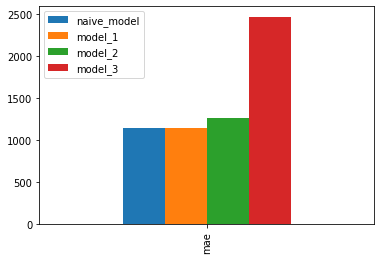

In [144]:
dense_models.plot(kind="bar");

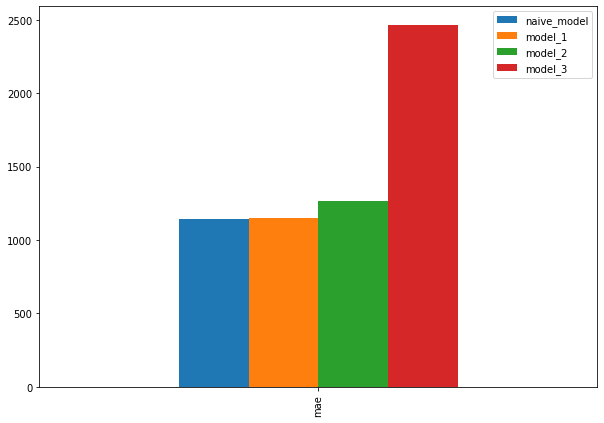

In [145]:
dense_models.plot(figsize=(10,7), kind="bar");

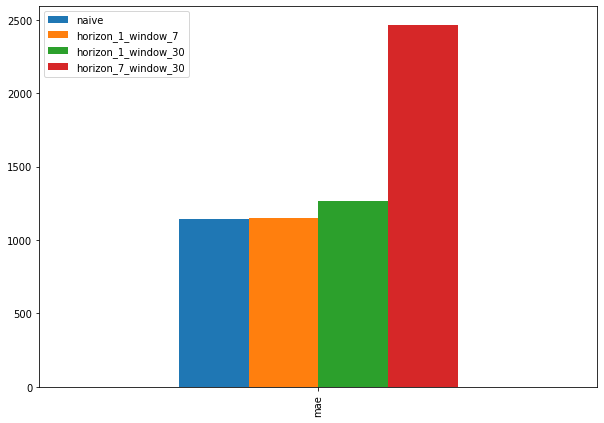

In [146]:
pd.DataFrame({"naive": naive_results["mae"], 
              "horizon_1_window_7": model_1_results["mae"], 
              "horizon_1_window_30": model_2_results["mae"], 
              "horizon_7_window_30": model_3_results["mae"]}, index=["mae"]).plot(figsize=(10, 7), kind="bar");

In [147]:
dense_models= pd.DataFrame({"naive_model": naive_results, "model_1": model_1_results, "model_2": model_2_results, "model_3": model_3_results}, index=["mae"])
dense_models=dense_models.T
dense_models

,mae
naive_model,1141.506761
model_1,1148.593636
model_2,1265.042274
model_3,2467.759716


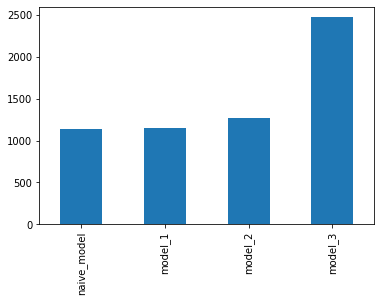

In [148]:
dense_models["mae"].plot(kind="bar");

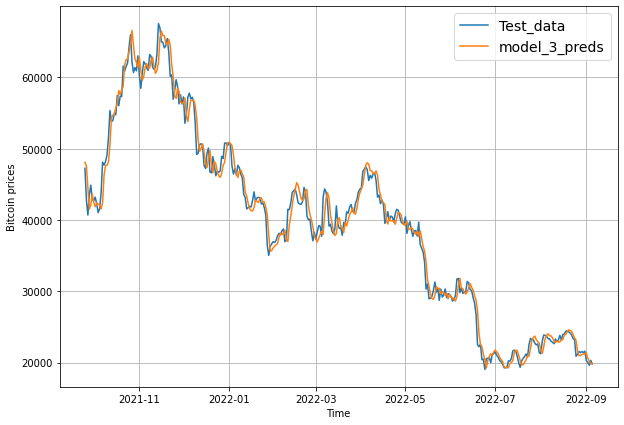

In [149]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, format="-", label="Test_data", ylabel="Bitcoin prices")
plot_time_series(timesteps=X_test[-len(test_windows):], values=tf.reduce_mean(model_3_preds, axis=1), format="-", start=offset, label="model_3_preds", ylabel="Bitcoin prices")

## AutoCorrelation for time series Problems

* Link -> https://towardsdatascience.com/how-not-to-use-machine-learning-for-time-series-forecasting-avoiding-the-pitfalls-19f9d7adf424



## `Model 4`: Conv1D 

### Input and Output shapes of a Conv1D layer

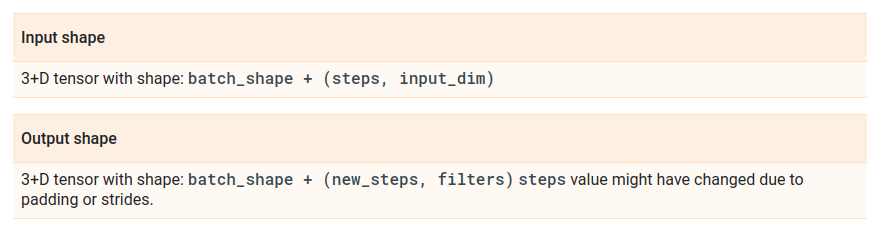


* Link -> https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv1D

> It requires a `3D shaped` dataset but the time series dataset is in `1D` format, we have to format it in `3D` to pass to the Conv1D layer.

In [150]:
WINDOWS_SIZE =7
HORIZON=1 

In [151]:
WINDOWS_SIZE, HORIZON

(7, 1)

In [152]:
full_windows, full_labels= make_windows(prices, window_size=WINDOWS_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(3255, 3255)

In [153]:
train_windows, test_windows, train_labels, test_labels= make_train_test_split(full_windows, full_labels)
len(train_windows), len(train_labels)

(2604, 2604)

In [154]:
train_windows[0].shape

(7,)

In [155]:
example= tf.constant(train_windows[0])
example

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

### Changing the `input_dims` from `1D` to `2D` 

In [156]:
expand_dims_layer= layers.Lambda(lambda x: tf.expand_dims(x, axis=1)) # Add an extra dimension to the `input_dims`

In [157]:
expand_dims_layer(example).shape

TensorShape([7, 1])

In [158]:
example.shape

TensorShape([7])

In [159]:
example

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [160]:
expand_dims_layer(example)

<tf.Tensor: shape=(7, 1), dtype=float32, numpy=
array([[123.65499],
       [125.455  ],
       [108.58483],
       [118.67466],
       [121.33866],
       [120.65533],
       [121.795  ]], dtype=float32)>

### Creating the Conv1D model

In [161]:
inputs= layers.Input(shape=(WINDOWS_SIZE, ), dtype="float32", name="model_4_inputs")
expand_dims_layer= layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
x= layers.Conv1D(filters= 128, kernel_size= WINDOWS_SIZE, padding="causal", activation="relu",name="conv_1d_layer_1")(expand_dims_layer)
x= layers.MaxPool1D(5, padding="same", name="max_pooling1d_1")(x)
x= layers.Conv1D(filters= 128, kernel_size= WINDOWS_SIZE, padding="causal", activation="relu",name="conv_1d_layer_2")(x)
x= layers.MaxPool1D(5, padding="same", name="max_pooling1d_2")(x)
x= layers.Conv1D(filters= 128, kernel_size= WINDOWS_SIZE, padding="causal", activation="relu",name="conv_1d_layer_3")(x)
x= layers.MaxPool1D(5, padding="same", name="max_pooling1d_3")(x)
outputs= layers.Dense(HORIZON, activation="linear", name="output_layer")(x)

model_4= tf.keras.Model(inputs, outputs, name="model_4_conv1d")

In [162]:
model_4.summary()

Model: "model_4_conv1d"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model_4_inputs (InputLayer)  [(None, 7)]              0         
                                                                 
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv_1d_layer_1 (Conv1D)    (None, 1, 128)            6400      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 1, 128)           0         
 1D)                                                             
                                                                 
 conv_1d_layer_2 (Conv1D)    (None, 1, 128)            114816    
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 1, 128)           0         
 1D)                                                

In [163]:
model_4.compile(loss="mae", optimizer= tf.keras.optimizers.Adam(), metrics=['mae', 'mse'])

history_4= model_4.fit(train_windows, train_labels, batch_size=128, epochs=100, validation_data=(test_windows, test_labels,), callbacks=[create_model_checkpoint('model_4_conv1d')])

Epoch 1/100
21/21 [==============================] - 10s 72ms/step - loss: 2478.1526 - mae: 2478.1526 - mse: 16611504.0000 - val_loss: 6790.1865 - val_mae: 6790.1865 - val_mse: 58205612.0000
Epoch 2/100
21/21 [==============================] - 1s 64ms/step - loss: 386.5461 - mae: 386.5461 - mse: 486592.0938 - val_loss: 2710.3430 - val_mae: 2710.3430 - val_mse: 11719969.0000
Epoch 3/100
21/21 [==============================] - 1s 54ms/step - loss: 240.8543 - mae: 240.8543 - mse: 230914.0938 - val_loss: 2192.9221 - val_mae: 2192.9221 - val_mse: 8144482.5000
Epoch 4/100
21/21 [==============================] - 1s 54ms/step - loss: 222.4845 - mae: 222.4845 - mse: 209789.4375 - val_loss: 1988.7494 - val_mae: 1988.7494 - val_mse: 6945984.0000
Epoch 5/100
21/21 [==============================] - 1s 55ms/step - loss: 205.5957 - mae: 205.5957 - mse: 189620.7500 - val_loss: 1943.3942 - val_mae: 1943.3942 - val_mse: 6708340.5000
Epoch 6/100
21/21 [==============================] - 1s 54ms/step - 

In [164]:
model_4.evaluate(test_windows, test_labels)

21/21 [==============================] - 0s 3ms/step - loss: 1258.3126 - mae: 1258.3126 - mse: 2924093.5000


[1258.3126220703125, 1258.3126220703125, 2924093.5]

In [165]:
model_4_checkpoint= tf.keras.models.load_model('/content/model_experiments/model_4_conv1d')

In [166]:
model_4_checkpoint.evaluate(test_windows, test_labels)

21/21 [==============================] - 1s 9ms/step - loss: 1152.1343 - mae: 1152.1343 - mse: 2624105.0000


[1152.13427734375, 1152.13427734375, 2624105.0]

In [167]:
model_4_preds= make_preds(model_4_checkpoint, test_windows)
model_4_preds[:5]

<tf.Tensor: shape=(5,), dtype=float64, numpy=
array([18365.828125  , 19053.33789062, 18830.18945312, 17321.03710938,
       17014.95117188])>

In [168]:
model_4_results= evaluate_preds(tf.squeeze(test_labels), model_4_preds)
model_4_results

{'mae': 1152.1341055844855,
 'mse': 2624105.2365140575,
 'rmse': 1619.9090210607685,
 'mape': 2.9019344348317992,
 'mase': 1.0072278274700823}

In [169]:
model_2_results

{'mae': 1265.0422744404943,
 'mse': 2881417.072801882,
 'rmse': 1697.4737325808262,
 'mape': 3.190103910145813,
 'mase': 1.1029986146978583}

In [170]:
model_1_results

{'mae': 1148.5936359959676,
 'mse': 2633934.6304410635,
 'rmse': 1622.9401191790976,
 'mape': 2.8890927225634364,
 'mase': 1.0041326500297292}

## Hyper-parameter Tuning

* Link -> https://www.tensorflow.org/tensorboard/hyperparameter_tuning_with_hparams

### Loading the Tensorboard notebook extension

In [171]:
# %load_ext tensorboard

In [172]:
# from tensorboard.plugins.hparams import api as hp

In [173]:

# inputs= layers.Input(shape=(WINDOWS_SIZE, ), dtype="float32", name="model_4_inputs")
# expand_dims_layer= layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
# # x= layers.Conv1D(filters= 128, kernel_size= WINDOWS_SIZE, padding="causal", activation="relu",name="conv_1d_layer_1")(expand_dims_layer)
# # x= layers.MaxPool1D(5, padding="same", name="max_pooling1d_1")(x)

# x= layers.Conv1D(hp.HParam['filters'], hp.HParam['kernel_size'], hp.HParam['padding'], activation="relu",name="conv_1d_layer_1")(expand_dims_layer)
# x= layers.MaxPool1D(hp.HParam['pool_size'], hp.HParam['padding'], name="max_pooling1d")(x)

# outputs= layers.Dense(HORIZON, activation="linear", name="output_layer")(x)

# model_4_hparams= tf.keras.Model(inputs, outputs, name="model_4_conv1d_hyperparameters")


# model_4_hparams.compile(optimizer= hp.hparams['optimizer'], loss='mae', accuracy=['mae', 'mse'])

# history_model_4_hparams= model_4_hparams.fit(train_windows, train_labels, batch_size=128, epochs=100, validation_data=(test_windows, test_labels,), callbacks=[create_model_checkpoint('model_4_conv1d')])

## `Model 5`: RNN(LSTM)


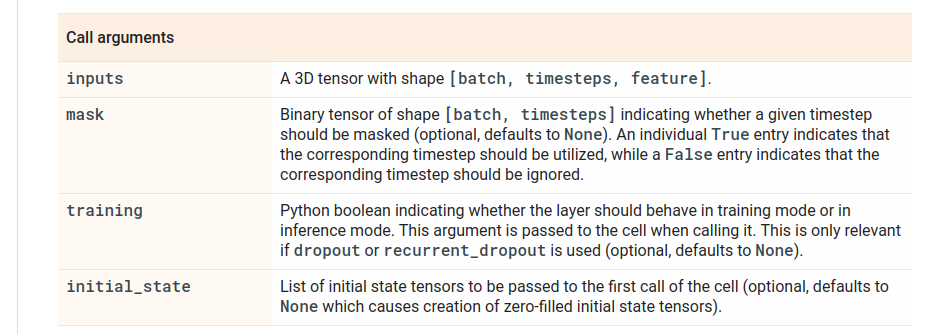


* Link -> https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM

In [174]:
inputs= layers.Input(shape=(WINDOWS_SIZE, ), dtype="float32", name="model_5_inputs")
expand_dims_layer= layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
x= layers.LSTM(128, activation='relu')(expand_dims_layer)
x= layers.Dense(32, activation="relu")(x)
outputs= layers.Dense(HORIZON, activation="linear", name="output_layer")(x)

model_5= tf.keras.Model(inputs, outputs, name="model_5_lstm")

In [175]:
model_5.summary()

Model: "model_5_lstm"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model_5_inputs (InputLayer)  [(None, 7)]              0         
                                                                 
 lambda_2 (Lambda)           (None, 1, 7)              0         
                                                                 
 lstm (LSTM)                 (None, 128)               69632     
                                                                 
 dense_6 (Dense)             (None, 32)                4128      
                                                                 
 output_layer (Dense)        (None, 1)                 33        
                                                                 
Total params: 73,793
Trainable params: 73,793
Non-trainable params: 0
_________________________________________________________________


In [176]:
model_5.compile(loss="mae", optimizer= tf.keras.optimizers.Adam(), metrics=['mae', 'mse'])

history_5= model_5.fit(train_windows, train_labels, batch_size=128, epochs=100, validation_data=(test_windows, test_labels,), callbacks=[create_model_checkpoint('model_5_lstm')])

Epoch 1/100
21/21 [==============================] - ETA: 0s - loss: 3412.2468 - mae: 3412.2468 - mse: 24646668.0000

21/21 [==============================] - 5s 127ms/step - loss: 3412.2468 - mae: 3412.2468 - mse: 24646668.0000 - val_loss: 25160.2520 - val_mae: 25160.2520 - val_mse: 697939648.0000
Epoch 2/100
20/21 [===========================>..] - ETA: 0s - loss: 1501.8204 - mae: 1501.8204 - mse: 5947419.0000

21/21 [==============================] - 2s 103ms/step - loss: 1480.5376 - mae: 1480.5376 - mse: 5851306.5000 - val_loss: 3475.4995 - val_mae: 3475.4995 - val_mse: 18589558.0000
Epoch 3/100
18/21 [========================>.....] - ETA: 0s - loss: 350.0563 - mae: 350.0563 - mse: 428882.3125

21/21 [==============================] - 2s 86ms/step - loss: 339.8399 - mae: 339.8399 - mse: 404678.6562 - val_loss: 2046.5801 - val_mae: 2046.5801 - val_mse: 7377548.0000
Epoch 4/100
21/21 [==============================] - ETA: 0s - loss: 223.6030 - mae: 223.6030 - mse: 218640.8125

21/21 [==============================] - 2s 85ms/step - loss: 223.6030 - mae: 223.6030 - mse: 218640.8125 - val_loss: 2004.9845 - val_mae: 2004.9845 - val_mse: 7144560.5000
Epoch 5/100
21/21 [==============================] - 0s 7ms/step - loss: 209.2839 - mae: 209.2839 - mse: 198918.8594 - val_loss: 2023.8311 - val_mae: 2023.8311 - val_mse: 7254489.5000
Epoch 6/100
21/21 [==============================] - 0s 7ms/step - loss: 208.1557 - mae: 208.1557 - mse: 195992.3594 - val_loss: 2005.0991 - val_mae: 2005.0991 - val_mse: 7116539.5000
Epoch 7/100
21/21 [==============================] - ETA: 0s - loss: 207.3822 - mae: 207.3822 - mse: 195987.1406

21/21 [==============================] - 2s 86ms/step - loss: 207.3822 - mae: 207.3822 - mse: 195987.1406 - val_loss: 1993.4716 - val_mae: 1993.4716 - val_mse: 7037733.5000
Epoch 8/100
21/21 [==============================] - ETA: 0s - loss: 207.3735 - mae: 207.3735 - mse: 191607.6250

21/21 [==============================] - 2s 104ms/step - loss: 207.3735 - mae: 207.3735 - mse: 191607.6250 - val_loss: 1945.6987 - val_mae: 1945.6987 - val_mse: 6698905.0000
Epoch 9/100
21/21 [==============================] - ETA: 0s - loss: 202.8193 - mae: 202.8193 - mse: 186759.8750

21/21 [==============================] - 2s 86ms/step - loss: 202.8193 - mae: 202.8193 - mse: 186759.8750 - val_loss: 1918.0951 - val_mae: 1918.0951 - val_mse: 6522734.5000
Epoch 10/100
21/21 [==============================] - ETA: 0s - loss: 199.9525 - mae: 199.9525 - mse: 183262.0938

21/21 [==============================] - 2s 84ms/step - loss: 199.9525 - mae: 199.9525 - mse: 183262.0938 - val_loss: 1901.9823 - val_mae: 1901.9823 - val_mse: 6418528.0000
Epoch 11/100
20/21 [===========================>..] - ETA: 0s - loss: 197.1168 - mae: 197.1168 - mse: 179544.7031

21/21 [==============================] - 2s 101ms/step - loss: 197.1176 - mae: 197.1176 - mse: 179243.6562 - val_loss: 1899.1588 - val_mae: 1899.1588 - val_mse: 6395040.5000
Epoch 12/100
20/21 [===========================>..] - ETA: 0s - loss: 196.5684 - mae: 196.5684 - mse: 174420.5469

21/21 [==============================] - 2s 87ms/step - loss: 196.5444 - mae: 196.5444 - mse: 173871.0000 - val_loss: 1850.2781 - val_mae: 1850.2781 - val_mse: 6042591.0000
Epoch 13/100
21/21 [==============================] - ETA: 0s - loss: 191.2449 - mae: 191.2449 - mse: 170364.7188

21/21 [==============================] - 2s 88ms/step - loss: 191.2449 - mae: 191.2449 - mse: 170364.7188 - val_loss: 1848.2306 - val_mae: 1848.2306 - val_mse: 6068174.5000
Epoch 14/100
20/21 [===========================>..] - ETA: 0s - loss: 188.7272 - mae: 188.7272 - mse: 165006.7812

21/21 [==============================] - 2s 85ms/step - loss: 188.6449 - mae: 188.6449 - mse: 164417.1562 - val_loss: 1784.2646 - val_mae: 1784.2646 - val_mse: 5629090.5000
Epoch 15/100
21/21 [==============================] - 0s 7ms/step - loss: 187.5864 - mae: 187.5864 - mse: 160910.6719 - val_loss: 1823.0609 - val_mae: 1823.0609 - val_mse: 5902983.5000
Epoch 16/100
19/21 [==========================>...] - ETA: 0s - loss: 183.3601 - mae: 183.3601 - mse: 155499.3750

21/21 [==============================] - 2s 105ms/step - loss: 181.9292 - mae: 181.9292 - mse: 152915.3594 - val_loss: 1732.8055 - val_mae: 1732.8055 - val_mse: 5286450.0000
Epoch 17/100
20/21 [===========================>..] - ETA: 0s - loss: 175.9233 - mae: 175.9233 - mse: 136212.2188

21/21 [==============================] - 2s 87ms/step - loss: 178.3584 - mae: 178.3584 - mse: 147774.8906 - val_loss: 1698.3120 - val_mae: 1698.3120 - val_mse: 5122833.5000
Epoch 18/100
20/21 [===========================>..] - ETA: 0s - loss: 173.4369 - mae: 173.4369 - mse: 141831.5312

21/21 [==============================] - 2s 87ms/step - loss: 173.1281 - mae: 173.1281 - mse: 141034.4844 - val_loss: 1655.0768 - val_mae: 1655.0768 - val_mse: 4853933.0000
Epoch 19/100
21/21 [==============================] - ETA: 0s - loss: 169.4227 - mae: 169.4227 - mse: 136077.2969

21/21 [==============================] - 2s 86ms/step - loss: 169.4227 - mae: 169.4227 - mse: 136077.2969 - val_loss: 1641.4437 - val_mae: 1641.4437 - val_mse: 4711429.0000
Epoch 20/100
19/21 [==========================>...] - ETA: 0s - loss: 167.1199 - mae: 167.1199 - mse: 131548.5469

21/21 [==============================] - 2s 106ms/step - loss: 166.5258 - mae: 166.5258 - mse: 131839.7500 - val_loss: 1591.9189 - val_mae: 1591.9189 - val_mse: 4441772.0000
Epoch 21/100
18/21 [========================>.....] - ETA: 0s - loss: 163.6465 - mae: 163.6465 - mse: 129744.1094

21/21 [==============================] - 2s 86ms/step - loss: 162.8626 - mae: 162.8626 - mse: 125571.0078 - val_loss: 1558.1858 - val_mae: 1558.1858 - val_mse: 4257676.0000
Epoch 22/100
19/21 [==========================>...] - ETA: 0s - loss: 163.8293 - mae: 163.8293 - mse: 125845.8984

21/21 [==============================] - 2s 86ms/step - loss: 165.3368 - mae: 165.3368 - mse: 126103.3750 - val_loss: 1533.6848 - val_mae: 1533.6848 - val_mse: 4124596.0000
Epoch 23/100
21/21 [==============================] - ETA: 0s - loss: 157.3196 - mae: 157.3196 - mse: 118933.7109

21/21 [==============================] - 2s 102ms/step - loss: 157.3196 - mae: 157.3196 - mse: 118933.7109 - val_loss: 1510.3717 - val_mae: 1510.3717 - val_mse: 4090499.7500
Epoch 24/100
21/21 [==============================] - 0s 7ms/step - loss: 153.6903 - mae: 153.6903 - mse: 115354.9766 - val_loss: 1532.0066 - val_mae: 1532.0066 - val_mse: 4062610.2500
Epoch 25/100
21/21 [==============================] - ETA: 0s - loss: 153.8596 - mae: 153.8596 - mse: 112695.2656

21/21 [==============================] - 2s 88ms/step - loss: 153.8596 - mae: 153.8596 - mse: 112695.2656 - val_loss: 1454.3114 - val_mae: 1454.3114 - val_mse: 3793285.0000
Epoch 26/100
21/21 [==============================] - ETA: 0s - loss: 147.8355 - mae: 147.8355 - mse: 107643.6719

21/21 [==============================] - 2s 87ms/step - loss: 147.8355 - mae: 147.8355 - mse: 107643.6719 - val_loss: 1429.8838 - val_mae: 1429.8838 - val_mse: 3641166.7500
Epoch 27/100
21/21 [==============================] - 0s 8ms/step - loss: 154.7600 - mae: 154.7600 - mse: 113322.2031 - val_loss: 1468.9166 - val_mae: 1468.9166 - val_mse: 3950387.5000
Epoch 28/100
21/21 [==============================] - 0s 7ms/step - loss: 153.9221 - mae: 153.9221 - mse: 107299.6250 - val_loss: 1466.7878 - val_mae: 1466.7878 - val_mse: 3942385.7500
Epoch 29/100
19/21 [==========================>...] - ETA: 0s - loss: 145.0640 - mae: 145.0640 - mse: 105909.7500

21/21 [==============================] - 2s 85ms/step - loss: 144.3277 - mae: 144.3277 - mse: 104056.8984 - val_loss: 1417.1224 - val_mae: 1417.1224 - val_mse: 3524107.5000
Epoch 30/100
19/21 [==========================>...] - ETA: 0s - loss: 146.1577 - mae: 146.1577 - mse: 102387.4062

21/21 [==============================] - 2s 104ms/step - loss: 146.2662 - mae: 146.2662 - mse: 103406.4922 - val_loss: 1381.4613 - val_mae: 1381.4613 - val_mse: 3467687.5000
Epoch 31/100
20/21 [===========================>..] - ETA: 0s - loss: 140.8545 - mae: 140.8545 - mse: 99777.4219

21/21 [==============================] - 2s 87ms/step - loss: 140.6046 - mae: 140.6046 - mse: 98892.1016 - val_loss: 1368.8440 - val_mae: 1368.8440 - val_mse: 3356263.7500
Epoch 32/100
21/21 [==============================] - ETA: 0s - loss: 139.1274 - mae: 139.1274 - mse: 98367.9375 

21/21 [==============================] - 2s 85ms/step - loss: 139.1274 - mae: 139.1274 - mse: 98367.9375 - val_loss: 1363.0640 - val_mae: 1363.0640 - val_mse: 3321246.0000
Epoch 33/100
20/21 [===========================>..] - ETA: 0s - loss: 140.3129 - mae: 140.3129 - mse: 98765.2031

21/21 [==============================] - 2s 103ms/step - loss: 139.7383 - mae: 139.7383 - mse: 97940.4062 - val_loss: 1355.5168 - val_mae: 1355.5168 - val_mse: 3289798.5000
Epoch 34/100
21/21 [==============================] - 0s 7ms/step - loss: 136.9949 - mae: 136.9949 - mse: 95535.9375 - val_loss: 1375.8640 - val_mae: 1375.8640 - val_mse: 3351127.0000
Epoch 35/100
19/21 [==========================>...] - ETA: 0s - loss: 136.9309 - mae: 136.9309 - mse: 96256.4062

21/21 [==============================] - 2s 89ms/step - loss: 137.9782 - mae: 137.9782 - mse: 95858.7656 - val_loss: 1344.0537 - val_mae: 1344.0537 - val_mse: 3311938.7500
Epoch 36/100
20/21 [===========================>..] - ETA: 0s - loss: 144.6363 - mae: 144.6363 - mse: 101796.7578

21/21 [==============================] - 2s 87ms/step - loss: 143.0798 - mae: 143.0798 - mse: 100273.2734 - val_loss: 1327.6576 - val_mae: 1327.6576 - val_mse: 3209561.2500
Epoch 37/100
21/21 [==============================] - ETA: 0s - loss: 135.8729 - mae: 135.8729 - mse: 94142.0000 

21/21 [==============================] - 2s 85ms/step - loss: 135.8729 - mae: 135.8729 - mse: 94142.0000 - val_loss: 1321.9805 - val_mae: 1321.9805 - val_mse: 3190887.7500
Epoch 38/100
19/21 [==========================>...] - ETA: 0s - loss: 136.1550 - mae: 136.1550 - mse: 92886.7109 

21/21 [==============================] - 2s 104ms/step - loss: 137.0067 - mae: 137.0067 - mse: 95478.4844 - val_loss: 1315.0580 - val_mae: 1315.0580 - val_mse: 3146292.0000
Epoch 39/100
20/21 [===========================>..] - ETA: 0s - loss: 136.9036 - mae: 136.9036 - mse: 93270.1797 

21/21 [==============================] - 2s 85ms/step - loss: 136.4053 - mae: 136.4053 - mse: 92501.4297 - val_loss: 1310.8168 - val_mae: 1310.8168 - val_mse: 3128569.7500
Epoch 40/100
21/21 [==============================] - 0s 8ms/step - loss: 133.0441 - mae: 133.0441 - mse: 91329.4062 - val_loss: 1339.3010 - val_mae: 1339.3010 - val_mse: 3203201.5000
Epoch 41/100
21/21 [==============================] - 0s 7ms/step - loss: 137.3191 - mae: 137.3191 - mse: 93129.4141 - val_loss: 1395.9279 - val_mae: 1395.9279 - val_mse: 3425675.2500
Epoch 42/100
20/21 [===========================>..] - ETA: 0s - loss: 140.6748 - mae: 140.6748 - mse: 93707.8828 

21/21 [==============================] - 2s 87ms/step - loss: 140.8447 - mae: 140.8447 - mse: 94480.2031 - val_loss: 1295.5131 - val_mae: 1295.5131 - val_mse: 3075054.0000
Epoch 43/100
21/21 [==============================] - 0s 9ms/step - loss: 132.2163 - mae: 132.2163 - mse: 89590.3125 - val_loss: 1351.4081 - val_mae: 1351.4081 - val_mse: 3388823.7500
Epoch 44/100
21/21 [==============================] - 0s 8ms/step - loss: 136.7953 - mae: 136.7953 - mse: 92290.1016 - val_loss: 1300.6121 - val_mae: 1300.6121 - val_mse: 3065352.7500
Epoch 45/100
21/21 [==============================] - 0s 7ms/step - loss: 131.8981 - mae: 131.8981 - mse: 88443.3906 - val_loss: 1331.9969 - val_mae: 1331.9969 - val_mse: 3300085.5000
Epoch 46/100
20/21 [===========================>..] - ETA: 0s - loss: 132.4862 - mae: 132.4862 - mse: 89910.2656 

21/21 [==============================] - 2s 89ms/step - loss: 131.4638 - mae: 131.4638 - mse: 88753.2891 - val_loss: 1278.8564 - val_mae: 1278.8564 - val_mse: 3022727.2500
Epoch 47/100
21/21 [==============================] - 0s 7ms/step - loss: 133.1921 - mae: 133.1921 - mse: 88861.9766 - val_loss: 1400.3092 - val_mae: 1400.3092 - val_mse: 3601373.0000
Epoch 48/100
21/21 [==============================] - ETA: 0s - loss: 132.7968 - mae: 132.7968 - mse: 89195.9219

21/21 [==============================] - 2s 105ms/step - loss: 132.7968 - mae: 132.7968 - mse: 89195.9219 - val_loss: 1276.9884 - val_mae: 1276.9884 - val_mse: 3029826.5000
Epoch 49/100
20/21 [===========================>..] - ETA: 0s - loss: 132.1071 - mae: 132.1071 - mse: 89082.2344

21/21 [==============================] - 2s 89ms/step - loss: 131.6723 - mae: 131.6723 - mse: 88223.7500 - val_loss: 1274.3267 - val_mae: 1274.3267 - val_mse: 2978429.2500
Epoch 50/100
21/21 [==============================] - 0s 7ms/step - loss: 129.7511 - mae: 129.7511 - mse: 87530.3359 - val_loss: 1303.3845 - val_mae: 1303.3845 - val_mse: 3176233.2500
Epoch 51/100
21/21 [==============================] - 0s 8ms/step - loss: 129.7582 - mae: 129.7582 - mse: 85993.4766 - val_loss: 1296.1116 - val_mae: 1296.1116 - val_mse: 3145026.7500
Epoch 52/100
20/21 [===========================>..] - ETA: 0s - loss: 129.6407 - mae: 129.6407 - mse: 85062.3125

21/21 [==============================] - 2s 87ms/step - loss: 130.8414 - mae: 130.8414 - mse: 86804.1016 - val_loss: 1258.5365 - val_mae: 1258.5365 - val_mse: 2953358.5000
Epoch 53/100
21/21 [==============================] - 0s 8ms/step - loss: 131.2923 - mae: 131.2923 - mse: 86283.5312 - val_loss: 1265.9880 - val_mae: 1265.9880 - val_mse: 2941740.0000
Epoch 54/100
21/21 [==============================] - 0s 8ms/step - loss: 128.8889 - mae: 128.8889 - mse: 85513.8281 - val_loss: 1298.4105 - val_mae: 1298.4105 - val_mse: 3160713.5000
Epoch 55/100
21/21 [==============================] - 0s 7ms/step - loss: 128.4009 - mae: 128.4009 - mse: 85537.6953 - val_loss: 1299.2906 - val_mae: 1299.2906 - val_mse: 3165827.2500
Epoch 56/100
19/21 [==========================>...] - ETA: 0s - loss: 129.4799 - mae: 129.4799 - mse: 88470.7344

21/21 [==============================] - 2s 104ms/step - loss: 127.3414 - mae: 127.3414 - mse: 84945.1016 - val_loss: 1248.1298 - val_mae: 1248.1298 - val_mse: 2923810.7500
Epoch 57/100
21/21 [==============================] - 0s 15ms/step - loss: 127.2514 - mae: 127.2514 - mse: 84308.6484 - val_loss: 1267.0024 - val_mae: 1267.0024 - val_mse: 2941847.2500
Epoch 58/100
21/21 [==============================] - 0s 13ms/step - loss: 130.1508 - mae: 130.1508 - mse: 85903.0938 - val_loss: 1248.5270 - val_mae: 1248.5270 - val_mse: 2945033.7500
Epoch 59/100
21/21 [==============================] - ETA: 0s - loss: 129.3230 - mae: 129.3230 - mse: 85252.6094

21/21 [==============================] - 3s 139ms/step - loss: 129.3230 - mae: 129.3230 - mse: 85252.6094 - val_loss: 1236.9543 - val_mae: 1236.9543 - val_mse: 2874466.5000
Epoch 60/100
20/21 [===========================>..] - ETA: 0s - loss: 126.2148 - mae: 126.2148 - mse: 84553.3516

21/21 [==============================] - 2s 87ms/step - loss: 126.2431 - mae: 126.2431 - mse: 84147.6016 - val_loss: 1234.3628 - val_mae: 1234.3628 - val_mse: 2869356.5000
Epoch 61/100
20/21 [===========================>..] - ETA: 0s - loss: 126.0815 - mae: 126.0815 - mse: 83466.6328

21/21 [==============================] - 2s 86ms/step - loss: 126.3178 - mae: 126.3178 - mse: 83309.5703 - val_loss: 1232.3248 - val_mae: 1232.3248 - val_mse: 2874159.5000
Epoch 62/100
21/21 [==============================] - 0s 7ms/step - loss: 128.2238 - mae: 128.2238 - mse: 83919.6562 - val_loss: 1276.8759 - val_mae: 1276.8760 - val_mse: 2974949.7500
Epoch 63/100
21/21 [==============================] - 0s 8ms/step - loss: 128.0403 - mae: 128.0403 - mse: 84062.1719 - val_loss: 1246.0978 - val_mae: 1246.0978 - val_mse: 2874743.7500
Epoch 64/100
21/21 [==============================] - 0s 7ms/step - loss: 124.2151 - mae: 124.2151 - mse: 82381.7109 - val_loss: 1264.5316 - val_mae: 1264.5316 - val_mse: 3025665.2500
Epoch 65/100
16/21 [=====================>........] - ETA: 0s - loss: 125.0578 - mae: 125.0578 - mse: 82794.8828 

21/21 [==============================] - 2s 107ms/step - loss: 124.3919 - mae: 124.3919 - mse: 82480.7578 - val_loss: 1218.1112 - val_mae: 1218.1112 - val_mse: 2802801.2500
Epoch 66/100
21/21 [==============================] - 0s 7ms/step - loss: 129.6711 - mae: 129.6711 - mse: 83295.0625 - val_loss: 1383.1387 - val_mae: 1383.1387 - val_mse: 3345058.7500
Epoch 67/100
19/21 [==========================>...] - ETA: 0s - loss: 128.3773 - mae: 128.3773 - mse: 85427.6328

21/21 [==============================] - 2s 88ms/step - loss: 127.8660 - mae: 127.8660 - mse: 84029.2500 - val_loss: 1212.6392 - val_mae: 1212.6392 - val_mse: 2798534.7500
Epoch 68/100
21/21 [==============================] - 0s 8ms/step - loss: 122.3125 - mae: 122.3125 - mse: 80218.0078 - val_loss: 1221.3662 - val_mae: 1221.3662 - val_mse: 2793688.0000
Epoch 69/100
21/21 [==============================] - 0s 7ms/step - loss: 124.2372 - mae: 124.2372 - mse: 81195.5000 - val_loss: 1218.3933 - val_mae: 1218.3933 - val_mse: 2784431.5000
Epoch 70/100
21/21 [==============================] - 0s 7ms/step - loss: 126.7715 - mae: 126.7715 - mse: 81442.3047 - val_loss: 1229.8885 - val_mae: 1229.8885 - val_mse: 2817998.0000
Epoch 71/100
21/21 [==============================] - 0s 8ms/step - loss: 124.7047 - mae: 124.7047 - mse: 80080.2969 - val_loss: 1217.1934 - val_mae: 1217.1934 - val_mse: 2780800.5000
Epoch 72/100
21/21 [==============================] - 0s 7ms/step - loss: 122.9378 - mae: 12

21/21 [==============================] - 2s 86ms/step - loss: 125.7358 - mae: 125.7358 - mse: 80578.1172 - val_loss: 1197.0811 - val_mae: 1197.0811 - val_mse: 2746251.2500
Epoch 75/100
21/21 [==============================] - 0s 7ms/step - loss: 126.9363 - mae: 126.9363 - mse: 81378.4688 - val_loss: 1214.4556 - val_mae: 1214.4556 - val_mse: 2836417.0000
Epoch 76/100
20/21 [===========================>..] - ETA: 0s - loss: 120.7938 - mae: 120.7938 - mse: 77248.4688

21/21 [==============================] - 2s 84ms/step - loss: 121.3866 - mae: 121.3866 - mse: 77940.7031 - val_loss: 1195.6364 - val_mae: 1195.6364 - val_mse: 2756067.0000
Epoch 77/100
21/21 [==============================] - 0s 8ms/step - loss: 121.6452 - mae: 121.6452 - mse: 78203.4688 - val_loss: 1282.0126 - val_mae: 1282.0126 - val_mse: 3074019.0000
Epoch 78/100
21/21 [==============================] - 0s 7ms/step - loss: 123.3271 - mae: 123.3271 - mse: 79921.9219 - val_loss: 1200.6849 - val_mae: 1200.6849 - val_mse: 2784165.5000
Epoch 79/100
21/21 [==============================] - ETA: 0s - loss: 125.6560 - mae: 125.6560 - mse: 79943.1328

21/21 [==============================] - 2s 103ms/step - loss: 125.6560 - mae: 125.6560 - mse: 79943.1328 - val_loss: 1195.3983 - val_mae: 1195.3983 - val_mse: 2763174.5000
Epoch 80/100
18/21 [========================>.....] - ETA: 0s - loss: 126.3616 - mae: 126.3616 - mse: 83280.8594

21/21 [==============================] - 2s 87ms/step - loss: 123.3665 - mae: 123.3665 - mse: 79447.8281 - val_loss: 1191.1835 - val_mae: 1191.1835 - val_mse: 2716689.7500
Epoch 81/100
20/21 [===========================>..] - ETA: 0s - loss: 120.0387 - mae: 120.0387 - mse: 76768.6016

21/21 [==============================] - 2s 87ms/step - loss: 120.3614 - mae: 120.3614 - mse: 77323.9297 - val_loss: 1184.8545 - val_mae: 1184.8545 - val_mse: 2716200.7500
Epoch 82/100
20/21 [===========================>..] - ETA: 0s - loss: 119.7904 - mae: 119.7904 - mse: 76515.8359

21/21 [==============================] - 2s 104ms/step - loss: 120.2577 - mae: 120.2577 - mse: 76839.9062 - val_loss: 1183.5400 - val_mae: 1183.5400 - val_mse: 2709002.0000
Epoch 83/100
21/21 [==============================] - 0s 7ms/step - loss: 121.7982 - mae: 121.7982 - mse: 76944.0469 - val_loss: 1193.1846 - val_mae: 1193.1846 - val_mse: 2764727.7500
Epoch 84/100
21/21 [==============================] - 0s 7ms/step - loss: 122.8369 - mae: 122.8369 - mse: 77733.1562 - val_loss: 1185.7250 - val_mae: 1185.7250 - val_mse: 2737665.5000
Epoch 85/100
20/21 [===========================>..] - ETA: 0s - loss: 121.2803 - mae: 121.2803 - mse: 76970.6406

21/21 [==============================] - 2s 87ms/step - loss: 121.4210 - mae: 121.4210 - mse: 76877.9219 - val_loss: 1180.9435 - val_mae: 1180.9435 - val_mse: 2693178.5000
Epoch 86/100
21/21 [==============================] - 0s 7ms/step - loss: 122.0518 - mae: 122.0518 - mse: 78837.7734 - val_loss: 1222.5425 - val_mae: 1222.5425 - val_mse: 2799682.7500
Epoch 87/100
21/21 [==============================] - 0s 7ms/step - loss: 120.1954 - mae: 120.1954 - mse: 77651.1719 - val_loss: 1190.7279 - val_mae: 1190.7279 - val_mse: 2710118.5000
Epoch 88/100
21/21 [==============================] - 0s 7ms/step - loss: 124.7510 - mae: 124.7510 - mse: 79838.7734 - val_loss: 1189.6278 - val_mae: 1189.6278 - val_mse: 2707964.2500
Epoch 89/100
21/21 [==============================] - 0s 8ms/step - loss: 126.1336 - mae: 126.1336 - mse: 79665.2734 - val_loss: 1361.3662 - val_mae: 1361.3662 - val_mse: 3356109.0000
Epoch 90/100
20/21 [===========================>..] - ETA: 0s - loss: 124.8317 - mae: 124.83

21/21 [==============================] - 2s 85ms/step - loss: 124.3712 - mae: 124.3712 - mse: 78342.5391 - val_loss: 1172.9073 - val_mae: 1172.9073 - val_mse: 2687912.5000
Epoch 91/100
21/21 [==============================] - 0s 7ms/step - loss: 119.4120 - mae: 119.4120 - mse: 75726.6016 - val_loss: 1182.2316 - val_mae: 1182.2316 - val_mse: 2735302.5000
Epoch 92/100
21/21 [==============================] - 0s 7ms/step - loss: 120.8591 - mae: 120.8591 - mse: 77398.4922 - val_loss: 1179.2484 - val_mae: 1179.2484 - val_mse: 2684923.7500
Epoch 93/100
21/21 [==============================] - 0s 7ms/step - loss: 124.3615 - mae: 124.3615 - mse: 78828.2422 - val_loss: 1283.0802 - val_mae: 1283.0802 - val_mse: 2995808.5000
Epoch 94/100
21/21 [==============================] - 0s 7ms/step - loss: 127.2953 - mae: 127.2953 - mse: 81494.1719 - val_loss: 1198.1554 - val_mae: 1198.1554 - val_mse: 2731519.2500
Epoch 95/100
21/21 [==============================] - 0s 7ms/step - loss: 122.0674 - mae: 12

21/21 [==============================] - 2s 86ms/step - loss: 124.7704 - mae: 124.7704 - mse: 79070.4297 - val_loss: 1166.4375 - val_mae: 1166.4375 - val_mse: 2670812.7500
Epoch 98/100
21/21 [==============================] - 0s 7ms/step - loss: 124.2433 - mae: 124.2433 - mse: 77987.4453 - val_loss: 1170.0538 - val_mae: 1170.0538 - val_mse: 2694578.2500
Epoch 99/100
21/21 [==============================] - 0s 7ms/step - loss: 127.9369 - mae: 127.9369 - mse: 79820.2656 - val_loss: 1227.2301 - val_mae: 1227.2301 - val_mse: 2817711.7500
Epoch 100/100
21/21 [==============================] - 0s 7ms/step - loss: 120.5800 - mae: 120.5800 - mse: 77542.5312 - val_loss: 1169.0502 - val_mae: 1169.0502 - val_mse: 2692103.0000


In [177]:
model_5.evaluate(test_windows, test_labels)

21/21 [==============================] - 0s 3ms/step - loss: 1169.0502 - mae: 1169.0502 - mse: 2692103.0000


[1169.0501708984375, 1169.0501708984375, 2692103.0]

In [178]:
model_5_checkpoint= tf.keras.models.load_model('/content/model_experiments/model_5_lstm')

In [179]:
model_5_checkpoint.evaluate(test_windows, test_labels)

21/21 [==============================] - 0s 3ms/step - loss: 1166.4375 - mae: 1166.4375 - mse: 2670812.7500


[1166.4375, 1166.4375, 2670812.75]

In [180]:
model_5_preds= make_preds(model_5_checkpoint, test_windows)
model_5_preds[:5]

<tf.Tensor: shape=(5,), dtype=float64, numpy=
array([18399.02539062, 19018.33398438, 18856.64453125, 17474.34375   ,
       17083.39648438])>

In [181]:
model_5_results= evaluate_preds(test_labels, model_5_preds)
model_5_results

{'mae': 14406.497084036859,
 'mse': 315832926.05064315,
 'rmse': 17197.35935121259,
 'mape': 41.67122592175804,
 'mase': 12.594562290166026}

In [182]:
model_4_results

{'mae': 1152.1341055844855,
 'mse': 2624105.2365140575,
 'rmse': 1619.9090210607685,
 'mape': 2.9019344348317992,
 'mase': 1.0072278274700823}

## Conclusion after training `5` models

> As neural networks are such powerful algorithms, they can be used for almost any problem, however, that doesn't mean they'll achieve performant or usable results. We can clearly see that the `deep learning`(neural networks) we trained above haven't beaten the `naive based forecasting model`.  

## Make a multivariate time-series dataset

> So far all of our models have barely kept up with the `naïve forecast`.

> And so far all of them have been trained on a `single variable` (also called `univariate time series`) i.e, the historical price of Bitcoin.

> If predicting the price of Bitcoin using the price of Bitcoin hasn't worked out very well, maybe giving our model more information may help. `More information` is a vague term because we could actually feed almost anything to our model(s) and they would still try to find patterns.

> `For example`, we could use the historical price of Bitcoin as well as anyone with the name `Elon Musk` Tweeted on that day to predict the future price of Bitcoin.

### But would this help?

> Porbably not.

> What would be better is if we passed our model something related to Bitcoin (again, this is quite vauge, since in an `open system like a market`, you could argue everything is related).

> This will be different for almost every time series you work on but in our case, we could try to see if the `Bitcoin block reward size` adds any predictive power to our model(s).

### What is the Bitcoin block reward size?

> The Bitcoin block reward size is the number of Bitcoin someone receives from mining a Bitcoin block. At its inception, the Bitcoin block reward size was `50`. But every four years or so, the Bitcoin block reward `halves`. For example, the block reward size went from `50` (starting January 2009) to `25` on `November 28 2012`.

> Let's encode this information into our time series data and see if it helps a model's performance.

> `Note`: Adding an extra feature to our dataset such as the Bitcoin block reward size will take our data from `univariate` (only the historical price of Bitcoin) to `multivariate` (the price of Bitcoin as well as the block reward size).


In [183]:
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [184]:
bitcoin_prices.tail()

,Price
Date,
2022-09-01,20127.140625
2022-09-02,19969.771484
2022-09-03,19832.087891
2022-09-04,19986.712891
2022-09-05,19728.171875


## Making the `multivariate` time series

> We are adding the `block reward size` into the `bitcoin_prices` dataframe from above to turn it into a `multivariate` dataset.

The following block rewards and dates were sourced from [cmcmarkets.com](https://www.cmcmarkets.com/en/learn-cryptocurrencies/bitcoin-halving).

| Block Reward | Start Date |
| ----- | ----- |
| 50 | 3 January 2009 (2009-01-03) |
| 25 | 28 November 2012 |
| 12.5 | 9 July 2016 |
| 6.25 | 11 May 2020 |
| 3.125 | TBA (expected 2024) |
| 1.5625 | TBA (expected 2028) | 

> Since our Bitcoin historical data starts from `17 October 2014`, none of the timesteps in our multivariate time series will have a block reward of `50`.



### Block reward values

In [185]:
block_reward_1 = 50 # 3 January 2009 (2009-01-03) - this block reward isn't in our dataset (it starts from 01 October 2013)
block_reward_2 = 25 # 28 November 2012 
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 11 May 2020

# Block reward dates (datetime form of the above date stamps)
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-11")

In [186]:
bitcoin_prices.index[0]

Timestamp('2013-10-01 00:00:00')

### Get date indexes for when to add in different block dates

In [187]:
block_reward_2_days= (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days= (block_reward_4_datetime- bitcoin_prices.index[0]).days

block_reward_2_days, block_reward_3_days

(1012, 2414)

In [188]:
365*4

1460

### Adding `Block reward values` to the `bitcoin_prices` dataframe

In [189]:
bitcoin_prices.head(), bitcoin_prices.tail()

(                Price
 Date                 
 2013-10-01  123.65499
 2013-10-02  125.45500
 2013-10-03  108.58483
 2013-10-04  118.67466
 2013-10-05  121.33866,                    Price
 Date                    
 2022-09-01  20127.140625
 2022-09-02  19969.771484
 2022-09-03  19832.087891
 2022-09-04  19986.712891
 2022-09-05  19728.171875)

In [190]:
bitcoin_prices['block_reward_size']=None

bitcoin_prices.iloc[:block_reward_2_days, -1]= block_reward_2
bitcoin_prices.iloc[block_reward_2_days: block_reward_3_days, -1]= block_reward_3
bitcoin_prices.iloc[block_reward_3_days: , -1]= block_reward_4

In [191]:
bitcoin_prices.head()

,Price,block_reward_size
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


In [192]:
bitcoin_prices.tail()

,Price,block_reward_size
Date,,
2022-09-01,20127.140625,6.25
2022-09-02,19969.771484,6.25
2022-09-03,19832.087891,6.25
2022-09-04,19986.712891,6.25
2022-09-05,19728.171875,6.25


In [193]:
bitcoin_prices[1500:1510]

,Price,block_reward_size
Date,,
2017-11-09,7143.580078,12.5
2017-11-10,6618.140137,12.5
2017-11-11,6357.600098,12.5
2017-11-12,5950.069824,12.5
2017-11-13,6559.490234,12.5
2017-11-14,6635.750000,12.5
2017-11-15,7315.540039,12.5
2017-11-16,7871.689941,12.5
2017-11-17,7708.990234,12.5


## Visualizing the `multivariate` dataset

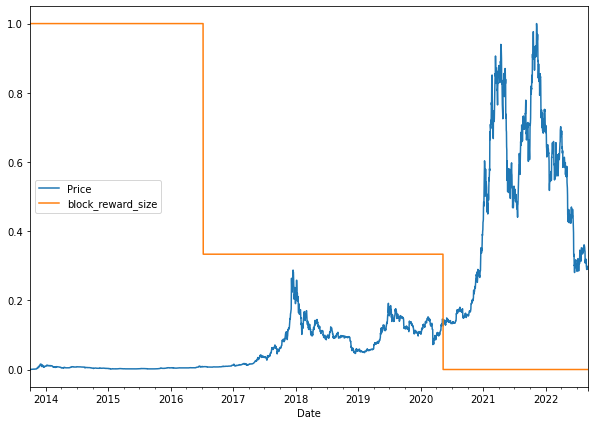

In [194]:
# Note: Because of the different scales of our values we'll scale them to be between 0 and 1.
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices[["Price", "block_reward_size"]]), # we need to scale the data first
                                     columns=bitcoin_prices.columns,
                                     index=bitcoin_prices.index)
scaled_price_block_df.plot(figsize=(10, 7));


## Making a windowed dataset with pandas

> Previously, we used some custom made functions to window our `univariate` time series. However, since we've just added another (`block_reward_size`) to our dataset, these functions won't work.

> we can use the `.DataFrame.shift()` method to create a `windowed multivariate time series`. The `shift()` method offsets an index by a specified number of periods.

* Link -> https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shift.html

### Setup dataset hyperparameters

In [195]:
HORIZON = 1
WINDOW_SIZE = 7

In [196]:
# Make a copy of the Bitcoin historical data with block reward feature
bitcoin_prices_windowed = bitcoin_prices.copy()

# Add windowed columns
for i in range(WINDOW_SIZE): # Shift values for each step in WINDOW_SIZE
  bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)
bitcoin_prices_windowed.head(10)

,Price,block_reward_size,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


### Dropping the `NaN` values from the dataFrame.

We'll also remove the `NaN` values using pandas [`dropna()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html) method, this equivalent to starting our windowing function at `sample 0 (the first sample) + WINDOW_SIZE`.

> Now that we've got a windowed dataset, let's separate features (`X`) from labels (`y`).

> Remember in our windowed dataset, we're trying to use the previous `WINDOW_SIZE` steps to predict `HORIZON` steps.

```
Window for a week (7) to predict a horizon of 1 (multivariate time series)
WINDOW_SIZE & block_reward -> HORIZON

[0, 1, 2, 3, 4, 5, 6, block_reward] -> [7]
[1, 2, 3, 4, 5, 6, 7, block_reward] -> [8]
[2, 3, 4, 5, 6, 7, 8, block_reward] -> [9]
```

* `X` -> A week(7) worth of prices of bitcoin `+` the block reward at that time.
* `y` -> The label or the price of the bitcoin to be predicted by the model, which is trained on `X`.



In [197]:
X= bitcoin_prices_windowed.dropna().drop('Price', axis=1).astype('float32')
y= bitcoin_prices_windowed.dropna()["Price"].astype('float32')

In [198]:
X.head()

,block_reward_size,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [199]:
y.head()

Date
2013-10-08    123.032997
2013-10-09    124.049004
2013-10-10    125.961159
2013-10-11    125.279663
2013-10-12    125.927498
Name: Price, dtype: float32

In [200]:
X.shape

(3255, 8)

In [201]:
y.shape

(3255,)

In [202]:
X.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3255 entries, 2013-10-08 to 2022-09-05
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   block_reward_size  3255 non-null   float32
 1   Price+1            3255 non-null   float32
 2   Price+2            3255 non-null   float32
 3   Price+3            3255 non-null   float32
 4   Price+4            3255 non-null   float32
 5   Price+5            3255 non-null   float32
 6   Price+6            3255 non-null   float32
 7   Price+7            3255 non-null   float32
dtypes: float32(8)
memory usage: 127.1 KB


In [203]:
 y.dtype

dtype('float32')

### Splitting the dataset into train, test split

In [204]:
train_windows, test_windows, train_labels, test_labels = make_train_test_split(X, y)

In [205]:
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2604, 651, 2604, 651)

In [206]:
train_windows.shape, test_windows.shape, train_labels.shape, test_labels.shape

((2604, 8), (651, 8), (2604,), (651,))

In [207]:
train_labels.dtype, test_labels.dtype

(dtype('float32'), dtype('float32'))

## `Model: 6` Multivariate Dense Model

### Steps:


* A single dense layer with 128 hidden units and ReLU (rectified linear unit) activation
* An output layer with linear activation (or no activation)
* Adam optimizer and MAE loss function
* Batch size of 128
* 100 epochs

In [208]:
WINDOWS_SIZE, HORIZON

(7, 1)

In [209]:
inputs= layers.Input(shape=(WINDOWS_SIZE+ 1, ), dtype="float32",  name="model_6_inputs")
x= layers.Dense(128, activation='relu')(inputs)
outputs= layers.Dense(HORIZON, activation="linear")(x)

model_6= tf.keras.Model(inputs, outputs, name="model_6_multivariate_dense")

In [210]:
model_6.summary()

Model: "model_6_multivariate_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model_6_inputs (InputLayer)  [(None, 8)]              0         
                                                                 
 dense_7 (Dense)             (None, 128)               1152      
                                                                 
 dense_8 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,281
Trainable params: 1,281
Non-trainable params: 0
_________________________________________________________________


In [211]:
model_6.compile(loss='mae', optimizer=tf.keras.optimizers.Adam(), metrics=['mae', 'mse'])

history_model_6= model_6.fit(train_windows, train_labels, epochs=100, batch_size=128, validation_data=(test_windows, test_labels), callbacks=[create_model_checkpoint(model_name='model_6_multivariate_dense', save_path='model_experiments')])

Epoch 1/100
21/21 [==============================] - 1s 29ms/step - loss: 3180.7141 - mae: 3180.7141 - mse: 26140084.0000 - val_loss: 2066.5881 - val_mae: 2066.5881 - val_mse: 7567217.0000
Epoch 2/100
21/21 [==============================] - 0s 4ms/step - loss: 467.6508 - mae: 467.6508 - mse: 686616.0000 - val_loss: 3213.3818 - val_mae: 3213.3818 - val_mse: 15773718.0000
Epoch 3/100
21/21 [==============================] - 0s 23ms/step - loss: 245.7303 - mae: 245.7303 - mse: 248214.0469 - val_loss: 2007.5875 - val_mae: 2007.5875 - val_mse: 7241424.5000
Epoch 4/100
21/21 [==============================] - 0s 22ms/step - loss: 210.4819 - mae: 210.4819 - mse: 197348.7188 - val_loss: 1936.5144 - val_mae: 1936.5144 - val_mse: 6764791.5000
Epoch 5/100
21/21 [==============================] - 0s 24ms/step - loss: 202.8359 - mae: 202.8359 - mse: 185107.6875 - val_loss: 1892.9714 - val_mae: 1892.9714 - val_mse: 6451656.0000
Epoch 6/100
21/21 [==============================] - 0s 23ms/step - los

In [212]:
model_6.evaluate(test_windows, test_labels)

21/21 [==============================] - 0s 2ms/step - loss: 1165.8042 - mae: 1165.8042 - mse: 2687670.5000


[1165.80419921875, 1165.80419921875, 2687670.5]

In [213]:
model_6_checkpoint= tf.keras.models.load_model('/content/model_experiments/model_6_multivariate_dense')

In [214]:
model_6_checkpoint.evaluate(test_windows, test_labels)

21/21 [==============================] - 0s 2ms/step - loss: 1165.8042 - mae: 1165.8042 - mse: 2687670.5000


[1165.80419921875, 1165.80419921875, 2687670.5]

In [215]:
model_6_preds= make_preds(model_6_checkpoint, test_windows)
model_6_preds[:5]

<tf.Tensor: shape=(5,), dtype=float64, numpy=
array([18373.109375  , 19110.90234375, 18871.62890625, 17427.109375  ,
       17058.75      ])>

In [216]:
model_6_preds.shape

TensorShape([651])

In [217]:
tf.squeeze(test_labels).shape

TensorShape([651])

In [218]:
model_6_preds.dtype

tf.float64

In [219]:
test_labels.dtype

dtype('float32')

In [220]:
model_6_results= evaluate_preds(tf.squeeze(test_labels), tf.cast(model_6_preds, dtype='float32'))
model_6_results

{'mae': 1165.8042,
 'mse': 2687670.8,
 'rmse': 1639.4116,
 'mape': 2.9378738,
 'mase': 1.0191786}

In [221]:
model_1_results

{'mae': 1148.5936359959676,
 'mse': 2633934.6304410635,
 'rmse': 1622.9401191790976,
 'mape': 2.8890927225634364,
 'mase': 1.0041326500297292}

In [222]:
naive_results

{'mae': 1141.506761082822,
 'mse': 2592967.393714534,
 'rmse': 1610.269354398367,
 'mape': 2.8639307796373665,
 'mase': 0.9984741472055335}

## `Model: 6_1` Exercise to improve `model_6`

* Link -> https://dev.mrdbourke.com/tensorflow-deep-learning/02_neural_network_classification_in_tensorflow/#improving-a-model



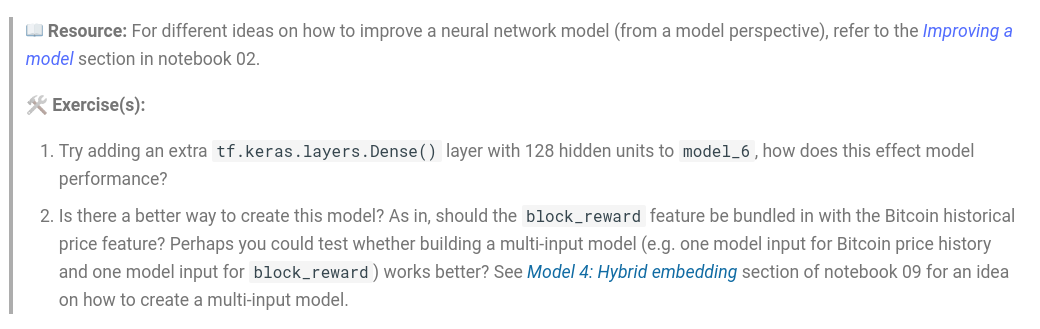

In [223]:
inputs= layers.Input(shape=(WINDOWS_SIZE+ 1, ), dtype="float32",  name="model_6_1_inputs")
x= layers.Dense(512, activation='relu')(inputs)
outputs= layers.Dense(HORIZON, activation="linear")(x)

model_6_1= tf.keras.Model(inputs, outputs, name="model_6_1_multivariate_dense")

model_6_1.compile(loss='mae', optimizer=tf.keras.optimizers.Adam(), metrics=['mae', 'mse'])

history_model_6_1= model_6_1.fit(train_windows, train_labels, epochs=100, batch_size=128, validation_data=(test_windows, test_labels), callbacks=[create_model_checkpoint(model_name='model_6_1_multivariate_dense', save_path='model_experiments')])

Epoch 1/100
21/21 [==============================] - 1s 29ms/step - loss: 1251.9836 - mae: 1251.9836 - mse: 5764471.0000 - val_loss: 4653.1011 - val_mae: 4653.1011 - val_mse: 29021916.0000
Epoch 2/100
21/21 [==============================] - 0s 23ms/step - loss: 305.0520 - mae: 305.0520 - mse: 326786.9062 - val_loss: 1991.0753 - val_mae: 1991.0753 - val_mse: 7065908.5000
Epoch 3/100
21/21 [==============================] - 0s 22ms/step - loss: 203.6163 - mae: 203.6163 - mse: 184490.0469 - val_loss: 1840.6676 - val_mae: 1840.6676 - val_mse: 6039429.0000
Epoch 4/100
21/21 [==============================] - 0s 23ms/step - loss: 189.8586 - mae: 189.8586 - mse: 165055.2812 - val_loss: 1760.7188 - val_mae: 1760.7188 - val_mse: 5510314.5000
Epoch 5/100
21/21 [==============================] - 0s 4ms/step - loss: 183.7839 - mae: 183.7839 - mse: 150281.9844 - val_loss: 1781.4927 - val_mae: 1781.4927 - val_mse: 5638770.0000
Epoch 6/100
21/21 [==============================] - 0s 23ms/step - loss

In [224]:
model_6_1.summary()

Model: "model_6_1_multivariate_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model_6_1_inputs (InputLaye  [(None, 8)]              0         
 r)                                                              
                                                                 
 dense_9 (Dense)             (None, 512)               4608      
                                                                 
 dense_10 (Dense)            (None, 1)                 513       
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [225]:
model_6_1.evaluate(test_windows, test_labels)

21/21 [==============================] - 0s 2ms/step - loss: 1404.1066 - mae: 1404.1066 - mse: 3513456.0000


[1404.1065673828125, 1404.1065673828125, 3513456.0]

In [226]:
model_6_1_checkpoint= tf.keras.models.load_model('/content/model_experiments/model_6_1_multivariate_dense')

In [227]:
model_6_1_checkpoint.evaluate(test_windows, test_labels)

21/21 [==============================] - 0s 2ms/step - loss: 1145.7914 - mae: 1145.7914 - mse: 2604232.2500


[1145.7913818359375, 1145.7913818359375, 2604232.25]

In [228]:
model_6_1_preds= make_preds(model_6_1_checkpoint, test_windows)
model_6_1_preds[:5]

<tf.Tensor: shape=(5,), dtype=float64, numpy=
array([18334.65625   , 19027.79296875, 18786.29101562, 17286.47460938,
       17034.7265625 ])>

In [229]:
model_6_1_pred_probs= model_6_1_checkpoint.predict(test_windows)
model_6_1_pred_probs[:5]

array([[18334.656],
       [19027.793],
       [18786.291],
       [17286.475],
       [17034.727]], dtype=float32)

In [230]:
model_6_1_pred_probs.shape

(651, 1)

In [231]:
model_6_1_preds_1= tf.cast(tf.squeeze(model_6_1_pred_probs), dtype="float32")
model_6_1_preds_1[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([18334.656, 19027.793, 18786.291, 17286.475, 17034.727],
      dtype=float32)>

In [232]:
model_6_1_preds_1.shape

TensorShape([651])

In [233]:
test_labels.dtype

dtype('float32')

In [234]:
model_6_1_preds.dtype

tf.float64

In [235]:
model_6_1_results= evaluate_preds(tf.cast(test_labels, dtype="float64"), model_6_1_preds)
model_6_1_results

{'mae': 1145.7913816484254,
 'mse': 2604232.014248234,
 'rmse': 1613.7633080003504,
 'mape': 2.8811666351005285,
 'mase': 1.0016828410112095}

In [236]:
model_6_results

{'mae': 1165.8042,
 'mse': 2687670.8,
 'rmse': 1639.4116,
 'mape': 2.9378738,
 'mase': 1.0191786}

## `Model: 6_2` Exercise to improve `model_6`

* Link -> https://dev.mrdbourke.com/tensorflow-deep-learning/02_neural_network_classification_in_tensorflow/#improving-a-model



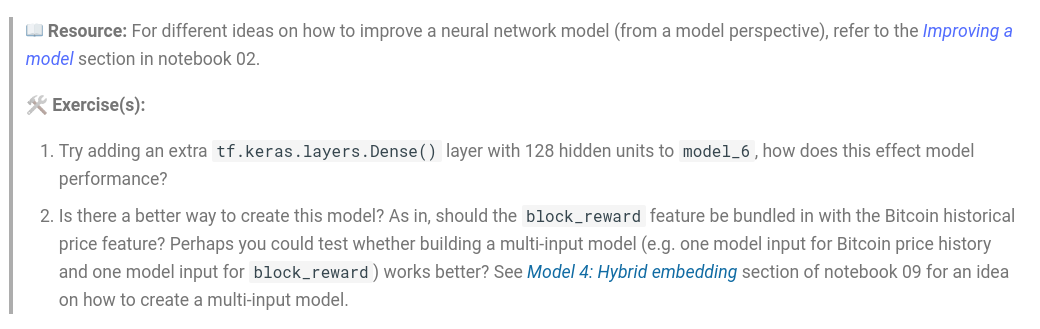

In [237]:
inputs= layers.Input(shape=(WINDOWS_SIZE+ 1, ), dtype="float32",  name="model_6_2_inputs")
x= layers.Dense(512, activation='relu')(inputs)
x= layers.Dense(256, activation='relu')(x)
outputs= layers.Dense(HORIZON, activation="linear")(x)

model_6_2= tf.keras.Model(inputs, outputs, name="model_6_2_multivariate_dense")

model_6_2.compile(loss='mae', optimizer=tf.keras.optimizers.Adam(), metrics=['mae', 'mse'])

history_model_6_2= model_6_2.fit(train_windows, train_labels, epochs=100, batch_size=128, validation_data=(test_windows, test_labels), callbacks=[create_model_checkpoint(model_name='model_6_2_multivariate_dense', save_path='model_experiments')])

Epoch 1/100
21/21 [==============================] - 3s 112ms/step - loss: 591.7719 - mae: 591.7719 - mse: 1780686.2500 - val_loss: 2654.8792 - val_mae: 2654.8792 - val_mse: 11605441.0000
Epoch 2/100
21/21 [==============================] - 1s 58ms/step - loss: 206.7641 - mae: 206.7641 - mse: 185050.6875 - val_loss: 1561.5161 - val_mae: 1561.5161 - val_mse: 4191942.5000
Epoch 3/100
21/21 [==============================] - 1s 51ms/step - loss: 156.7549 - mae: 156.7549 - mse: 113014.6641 - val_loss: 1364.8689 - val_mae: 1364.8689 - val_mse: 3308164.2500
Epoch 4/100
21/21 [==============================] - 0s 8ms/step - loss: 140.7284 - mae: 140.7284 - mse: 95921.0938 - val_loss: 1482.1532 - val_mae: 1482.1532 - val_mse: 3753110.2500
Epoch 5/100
21/21 [==============================] - 0s 7ms/step - loss: 165.3154 - mae: 165.3154 - mse: 109895.5312 - val_loss: 1391.6771 - val_mae: 1391.6771 - val_mse: 3542465.0000
Epoch 6/100
21/21 [==============================] - 0s 11ms/step - loss: 1

In [238]:
model_6_2.evaluate(test_windows, test_labels)

21/21 [==============================] - 0s 4ms/step - loss: 1250.4562 - mae: 1250.4562 - mse: 2956315.2500


[1250.4561767578125, 1250.4561767578125, 2956315.25]

In [239]:
model_6_2_checkpoint= tf.keras.models.load_model('/content/model_experiments/model_6_2_multivariate_dense')

In [240]:
model_6_2_checkpoint.evaluate(test_windows, test_labels)

21/21 [==============================] - 0s 3ms/step - loss: 1144.1003 - mae: 1144.1003 - mse: 2607101.2500


[1144.100341796875, 1144.100341796875, 2607101.25]

In [241]:
model_6_2_preds= make_preds(model_6_2_checkpoint, test_windows)
model_6_2_preds[:5]

<tf.Tensor: shape=(5,), dtype=float64, numpy=
array([18341.88476562, 19059.296875  , 18763.140625  , 17241.82226562,
       17048.16210938])>

In [242]:
test_labels.dtype

dtype('float32')

In [243]:
model_6_2_preds.dtype

tf.float64

In [244]:
model_6_2_results= evaluate_preds(tf.cast(test_labels, dtype="float64"), model_6_2_preds)
model_6_2_results

{'mae': 1144.1002394153227,
 'mse': 2607101.361534675,
 'rmse': 1614.6520868393523,
 'mape': 2.87633894112567,
 'mase': 1.000204397217915}

In [245]:
model_6_1_results

{'mae': 1145.7913816484254,
 'mse': 2604232.014248234,
 'rmse': 1613.7633080003504,
 'mape': 2.8811666351005285,
 'mase': 1.0016828410112095}

In [246]:
model_6_results

{'mae': 1165.8042,
 'mse': 2687670.8,
 'rmse': 1639.4116,
 'mape': 2.9378738,
 'mase': 1.0191786}

## `Model: 6_3` Exercise to improve `model_6`

* Link -> https://dev.mrdbourke.com/tensorflow-deep-learning/02_neural_network_classification_in_tensorflow/#improving-a-model



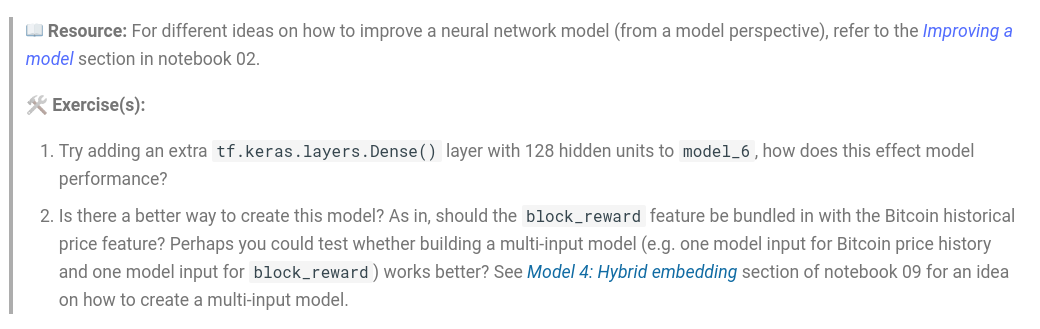

In [247]:
inputs= layers.Input(shape=(WINDOWS_SIZE+ 1, ), dtype="float32",  name="model_6_3_inputs")
x= layers.Dense(512, activation='relu')(inputs)
x= layers.Dense(512, activation='relu')(x)
outputs= layers.Dense(HORIZON, activation="linear")(x)

model_6_3= tf.keras.Model(inputs, outputs, name="model_6_3_multivariate_dense")

model_6_3.compile(loss='mae', optimizer=tf.keras.optimizers.Adam(), metrics=['mae', 'mse'])

history_model_6_3= model_6_3.fit(train_windows, train_labels, epochs=100, batch_size=128, validation_data=(test_windows, test_labels), callbacks=[create_model_checkpoint(model_name='model_6_3_multivariate_dense', save_path='model_experiments')])

Epoch 1/100
21/21 [==============================] - 2s 61ms/step - loss: 980.4413 - mae: 980.4413 - mse: 3737436.5000 - val_loss: 3642.5867 - val_mae: 3642.5867 - val_mse: 19428096.0000
Epoch 2/100
21/21 [==============================] - 1s 48ms/step - loss: 341.7402 - mae: 341.7402 - mse: 391990.9688 - val_loss: 1983.8907 - val_mae: 1983.8907 - val_mse: 7027907.0000
Epoch 3/100
21/21 [==============================] - 1s 64ms/step - loss: 229.1873 - mae: 229.1873 - mse: 208082.7344 - val_loss: 1863.4205 - val_mae: 1863.4205 - val_mse: 5985397.0000
Epoch 4/100
21/21 [==============================] - 1s 41ms/step - loss: 181.0815 - mae: 181.0815 - mse: 147429.8594 - val_loss: 1563.8331 - val_mae: 1563.8331 - val_mse: 4376461.5000
Epoch 5/100
21/21 [==============================] - 1s 51ms/step - loss: 148.1795 - mae: 148.1795 - mse: 104476.2500 - val_loss: 1347.0857 - val_mae: 1347.0857 - val_mse: 3342800.7500
Epoch 6/100
21/21 [==============================] - 0s 7ms/step - loss: 

In [248]:
model_6_3.evaluate(test_windows, test_labels)

21/21 [==============================] - 0s 4ms/step - loss: 1151.0614 - mae: 1151.0614 - mse: 2644820.0000


[1151.0614013671875, 1151.0614013671875, 2644820.0]

In [249]:
model_6_3_checkpoint= tf.keras.models.load_model('/content/model_experiments/model_6_3_multivariate_dense')

In [250]:
model_6_3_checkpoint.evaluate(test_windows, test_labels)

21/21 [==============================] - 1s 4ms/step - loss: 1145.8364 - mae: 1145.8364 - mse: 2598445.7500


[1145.83642578125, 1145.83642578125, 2598445.75]

In [251]:
model_6_3_preds= make_preds(model_6_3_checkpoint, test_windows)
model_6_3_preds[:5]

<tf.Tensor: shape=(5,), dtype=float64, numpy=
array([18385.98046875, 19100.72851562, 18795.26367188, 17250.17578125,
       17056.26367188])>

In [252]:
model_6_3_results= evaluate_preds(tf.cast(test_labels, dtype="float64"), model_6_3_preds)
model_6_3_results

{'mae': 1145.8363695276498,
 'mse': 2598445.747233366,
 'rmse': 1611.9695242880264,
 'mape': 2.882178484305888,
 'mase': 1.001722170672258}

In [253]:
model_6_2_results

{'mae': 1144.1002394153227,
 'mse': 2607101.361534675,
 'rmse': 1614.6520868393523,
 'mape': 2.87633894112567,
 'mase': 1.000204397217915}

In [254]:
model_6_1_results

{'mae': 1145.7913816484254,
 'mse': 2604232.014248234,
 'rmse': 1613.7633080003504,
 'mape': 2.8811666351005285,
 'mase': 1.0016828410112095}

In [255]:
model_6_results

{'mae': 1165.8042,
 'mse': 2687670.8,
 'rmse': 1639.4116,
 'mape': 2.9378738,
 'mase': 1.0191786}

## `Model: 6_4` Exercise to improve `model_6`

* Link -> https://dev.mrdbourke.com/tensorflow-deep-learning/02_neural_network_classification_in_tensorflow/#improving-a-model


### uisng `SGD()` optimizer was giving me this error,

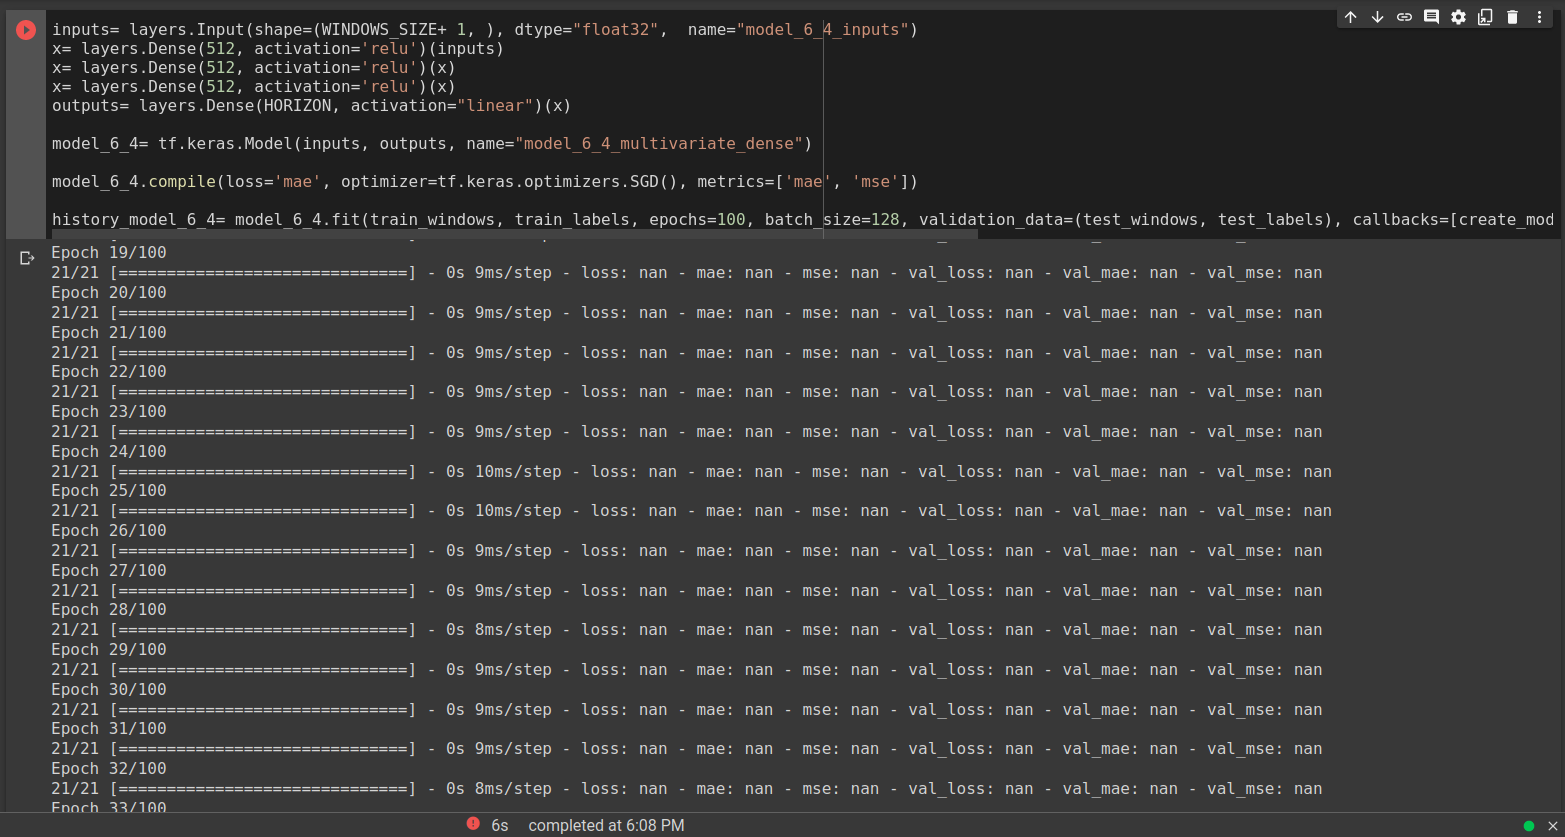


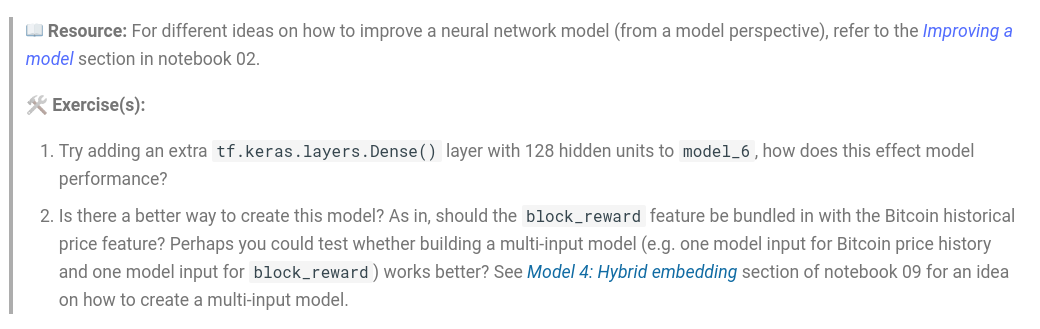

In [256]:
inputs= layers.Input(shape=(WINDOWS_SIZE+ 1, ), dtype="float32",  name="model_6_4_inputs")
x= layers.Dense(512, activation='relu')(inputs)
x= layers.Dense(512, activation='relu')(x)
x= layers.Dense(512, activation='relu')(x)
outputs= layers.Dense(HORIZON, activation="linear")(x)

model_6_4= tf.keras.Model(inputs, outputs, name="model_6_4_multivariate_dense")

model_6_4.compile(loss='mae', optimizer=tf.keras.optimizers.Adam(), metrics=['mae', 'mse'])

history_model_6_4= model_6_4.fit(train_windows, train_labels, epochs=100, batch_size=128, validation_data=(test_windows, test_labels), callbacks=[create_model_checkpoint(model_name='model_6_4_multivariate_dense', save_path='model_experiments')])

Epoch 1/100
21/21 [==============================] - 1s 40ms/step - loss: 820.5070 - mae: 820.5070 - mse: 2724852.7500 - val_loss: 2400.0972 - val_mae: 2400.0972 - val_mse: 9759966.0000
Epoch 2/100
21/21 [==============================] - 1s 54ms/step - loss: 268.5781 - mae: 268.5781 - mse: 260955.8438 - val_loss: 1965.1555 - val_mae: 1965.1555 - val_mse: 6750975.5000
Epoch 3/100
21/21 [==============================] - 2s 81ms/step - loss: 188.6277 - mae: 188.6277 - mse: 153241.5156 - val_loss: 1577.6241 - val_mae: 1577.6241 - val_mse: 4273699.0000
Epoch 4/100
21/21 [==============================] - 0s 15ms/step - loss: 157.4808 - mae: 157.4808 - mse: 114886.7500 - val_loss: 1700.2875 - val_mae: 1700.2875 - val_mse: 4724488.0000
Epoch 5/100
21/21 [==============================] - 0s 16ms/step - loss: 196.9290 - mae: 196.9290 - mse: 143429.0625 - val_loss: 2081.5356 - val_mae: 2081.5356 - val_mse: 6597836.5000
Epoch 6/100
21/21 [==============================] - 1s 50ms/step - loss: 

In [257]:
model_6_4.evaluate(test_windows, test_labels)

21/21 [==============================] - 0s 2ms/step - loss: 1506.7354 - mae: 1506.7354 - mse: 3804261.0000


[1506.7353515625, 1506.7353515625, 3804261.0]

In [258]:
model_6_4_checkpoint= tf.keras.models.load_model('/content/model_experiments/model_6_4_multivariate_dense')

In [259]:
model_6_4_checkpoint.evaluate(test_windows, test_labels)

21/21 [==============================] - 0s 2ms/step - loss: 1142.4778 - mae: 1142.4778 - mse: 2601616.5000


[1142.477783203125, 1142.477783203125, 2601616.5]

In [260]:
model_6_4_preds= make_preds(model_6_4_checkpoint, test_windows)
model_6_4_preds[:5]

<tf.Tensor: shape=(5,), dtype=float64, numpy=
array([18369.89453125, 19062.72851562, 18793.59179688, 17314.39257812,
       17064.86523438])>

In [261]:
model_6_4_results= evaluate_preds(tf.cast(test_labels, dtype="float64"), model_6_4_preds)
model_6_4_results

{'mae': 1142.4778465821812,
 'mse': 2601616.7042664792,
 'rmse': 1612.9527904642712,
 'mape': 2.8745300113014283,
 'mase': 0.9987860560710308}

In [262]:
model_6_3_results

{'mae': 1145.8363695276498,
 'mse': 2598445.747233366,
 'rmse': 1611.9695242880264,
 'mape': 2.882178484305888,
 'mase': 1.001722170672258}

In [263]:
model_6_2_results

{'mae': 1144.1002394153227,
 'mse': 2607101.361534675,
 'rmse': 1614.6520868393523,
 'mape': 2.87633894112567,
 'mase': 1.000204397217915}

In [264]:
model_6_1_results

{'mae': 1145.7913816484254,
 'mse': 2604232.014248234,
 'rmse': 1613.7633080003504,
 'mape': 2.8811666351005285,
 'mase': 1.0016828410112095}

In [265]:
model_6_results

{'mae': 1165.8042,
 'mse': 2687670.8,
 'rmse': 1639.4116,
 'mape': 2.9378738,
 'mase': 1.0191786}

## `Model 7`: N-BEATS algorithm

Time to step things up a notch.

So far we've tried a bunch of smaller models, models with only a couple of layers.

But one of the best ways to improve a model's performance is to increase the number of layers in it.

That's exactly what the [N-BEATS (Neural Basis Expansion Analysis for Interpretable Time Series Forecasting) algorithm](https://arxiv.org/pdf/1905.10437.pdf) does.

The N-BEATS algorithm focuses on univariate time series problems and achieved state-of-the-art performance in the winner of the [M4 competition](https://www.sciencedirect.com/science/article/pii/S0169207019301128) (a forecasting competition).

For our next modelling experiment we're going to be replicating the **generic architecture** of the N-BEATS algorithm (see [section 3.3 of the N-BEATS paper](https://arxiv.org/pdf/1905.10437.pdf)).

We're not going to go through all of the details in the paper, instead we're going to focus on:
1. Replicating the model architecture in [Figure 1 of the N-BEATS paper](https://arxiv.org/pdf/1905.10437.pdf) 

![figure 1 from N-BBEATS paper, the algorithm we're going to build](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/10-figure-1-nbeats-paper-annotated.png)
*N-BEATS algorithm we're going to replicate with TensorFlow with window (input) and horizon (output) annotations.*

2. Using the same hyperparameters as the paper which can be found in [Appendix D of the N-BEATS paper](https://arxiv.org/pdf/1905.10437.pdf)

Doing this will give us an opportunity to practice:
* Creating a custom layer for the `NBeatsBlock` by subclassing [`tf.keras.layers.Layer`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Layer)
  * Creating a custom layer is helpful for when TensorFlow doesn't already have an existing implementation of a layer or if you'd like to make a layer configuration repeat a number of times (e.g. like a stack of N-BEATS blocks)
* Implementing a custom architecture using the Functional API 
* Finding a paper related to our problem and seeing how it goes 

> As we can see in the paper, the authors state “N-BEATS is implemented and trained in TensorFlow”, that's what we'll be doing too!


### Creating an NBeatsBlock Custom layer

In [266]:
class NBeatsBlock(tf.keras.layers.Layer):
  # The Constructor of the class.
  def __init__(self, input_size: int, theta_size: int, horizon: int, n_neurons: int, n_layers: int,  **kwargs):
    super().__init__(**kwargs)
    self.input_size= input_size
    self.theta_size= theta_size
    self.horizon= horizon
    self.n_neurons= n_neurons
    self.n_layers= n_layers

    # Block contains stack of 4 fully connected layers each has ReLU activation
    self.hidden= [tf.keras.layers.Dense(n_neurons, activation='relu') for _ in range(n_layers)]

    # Output of block is a theta layer with linear activation
    self.theta_layer= tf.keras.layers.Dense(theta_size, activation='linear', name='theta_layer')

  # the `call method` is what runs when the layer is called 
  def call(self, inputs):
    x= inputs
    for layer in self.hidden: # pass inputs through each hidden layer 
      x=layer(x)

    theta= self.theta_layer(x)

    # Output the backcast and forecast from theta
    backcast, forecast= theta[:, :self.input_size], theta[:, -self.horizon]
    return backcast, forecast

Setting up the `NBeatsBlock` custom layer we see: 
* The class inherits from `tf.keras.layers.Layer` (this gives it all of the methods assosciated with `tf.keras.layers.Layer`)
* The constructor (`def __init__(...)`) takes all of the layer hyperparameters as well as the `**kwargs` argument
  * The `**kwargs` argument takes care of all of the hyperparameters which aren't mentioned in the constructor such as, `input_shape`, `trainable` and `name`
* In the constructor, the block architecture layers are created:
  * The hidden layers are created as a stack of fully connected with `n_nuerons` hidden units layers with ReLU activation
  * The theta layer uses `theta_size` hidden units as well as linear activation
* The `call()` method is what is run when the layer is called:
  * It first passes the inputs (the historical Bitcoin data) through each of the hidden layers (a stack of fully connected layers with ReLU activation)
  * After the inputs have been through each of the fully connected layers, they get passed through the theta layer where the backcast (backwards predictions, shape: `input_size`) and forecast (forward predictions, shape: `horizon`) are returned

![code mapping to image of N-BEATS basic block](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/10-nbeats-basic-block-replication-with-tensorflow-layer-subclassing.png)
*Using TensorFlow layer subclassing to replicate the N-BEATS basic block. See section 3.1 of N-BEATS paper for details.*

Let's see our block replica in action by together by creating a toy version of `NBeatsBlock`.

> 📖  **Resource:** Much of the creation of the time series materials (the ones you're going through now), including replicating the N-BEATS algorithm were streamed live on Twitch. If you'd like to see replays of how the algorithm was replicated, check out the [*Time series research and TensorFlow course material creation playlist*](https://youtube.com/playlist?list=PL8IpyNZ21vUSCM7nRAuS-hW_E-sgwdmaI) on the Daniel Bourke arXiv YouTube channel.

### Set up dummy NBeatsBlock layer to represent inputs and outputs

In [267]:
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE, 
                                       theta_size=WINDOW_SIZE+HORIZON, # backcast + forecast 
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4)

In [268]:
dummy_nbeats_block_layer

### Create dummy inputs (have to be same size as input_size)

In [269]:
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis=0) # input shape to the model has to reflect Dense layer input requirements (ndim=2)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

### Pass dummy inputs to dummy NBeatsBlock layer

In [270]:
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
# These are the activation outputs of the theta layer (they'll be random due to no training of the model)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [ 0.05275632 -0.2696216  -0.08459947 -0.5939578  -0.29202265 -0.17945848
 -0.11112916]
Forecast: 1.2064251899719238


## Preparing the data for the N-BEATS algorithm using `tf.data` API

> This is based on `univariate` time series point data forecasting.

In [271]:
bitcoin_prices.head()

,Price,block_reward_size
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


In [272]:
bitcoin_prices.drop('block_reward_size', axis=1).copy()

,Price
Date,
2013-10-01,123.654990
2013-10-02,125.455000
2013-10-03,108.584830
2013-10-04,118.674660
2013-10-05,121.338660
...,...
2022-09-01,20127.140625
2022-09-02,19969.771484
2022-09-03,19832.087891


In [273]:
bitcoin_prices_nbeats = bitcoin_prices.drop('block_reward_size', axis=1).copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Price+{i+1}"] = bitcoin_prices_nbeats["Price"].shift(periods=i+1)
bitcoin_prices_nbeats.dropna().head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500
2013-10-10,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483
2013-10-11,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466
2013-10-12,125.92750,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866


In [274]:
X= bitcoin_prices_nbeats.dropna().drop('Price', axis=1)
y= bitcoin_prices_nbeats.dropna()['Price']

train_windows, test_windows, train_labels, test_labels = make_train_test_split(X,y)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2604, 651, 2604, 651)

## Making the datasets performant and load faster

In [275]:
train_features_dataset= tf.data.Dataset.from_tensor_slices(train_windows)
train_labels_dataset= tf.data.Dataset.from_tensor_slices(train_labels)

test_features_dataset= tf.data.Dataset.from_tensor_slices(test_windows)
test_labels_dataset= tf.data.Dataset.from_tensor_slices(test_labels)

train_dataset= tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset= tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

train_dataset= train_dataset.batch(1024).prefetch(tf.data.AUTOTUNE)
test_dataset= test_dataset.batch(1024).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

### Setting up hyper-parameters for N-BEATS Algorithm

In [276]:
# Values from N-BEATS paper Figure 1 and Table 18/Appendix D
N_EPOCHS = 5000 # called "Iterations" in Table 18
N_NEURONS = 512 # called "Width" in Table 18
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON # called "Lookback" in Table 18
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

### Residual Connections or Residual Neural Networks(ResNet)

> They're what make N-BEATS double residual stacking (section 3.2 of the N-BEATS paper) possible:

* `tf.keras.layers.subtract(inputs)` - subtracts list of input tensors from each other
* `tf.keras.layers.add(inputs)` - adds list of input tensors to each other


In [277]:
# Make tensors
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

# Subtract
subtracted = layers.subtract([tensor_1, tensor_2])

# Add
added = layers.add([tensor_1, tensor_2])

print(f"Input tensors: {tensor_1.numpy()} & {tensor_2.numpy()}")
print(f"Subtracted: {subtracted.numpy()}")
print(f"Added: {added.numpy()}")

Input tensors: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
Subtracted: [10 10 10 10 10 10 10 10 10 10]
Added: [10 12 14 16 18 20 22 24 26 28]


### Building the N-BEATS Algorithm model

#### Steps in building the model:

1. Setup an instance of the N-BEATS block layer using NBeatsBlock (this'll be the initial block used for the network, the rest will be created as part of stacks)
2. Create an input layer for the N-BEATS stack (we'll be using the Keras Functional API for this)
3. Make the `initial backcast` and `forecasts` for the model with the layer created in (1)
4. Use a for loop to create stacks of block layers
5. Use the NBeatsBlock class within the for loop created in (4) to create blocks which return backcasts and block-level forecasts
6. Create the `double residual stacking` using `subtract` and `add` layers
7. Put the model inputs and outputs together using `tf.keras.Model()`
8. Compile the model with `MAE loss` (the paper uses multiple losses but we'll use MAE to keep it inline with our other models) and Adam optimizer with default settings as per section 5.2 of N-BEATS paper)
9. Fit the N-BEATS model for `5000 epochs` and since it's fitting for so many epochs, we'll use a couple of callbacks:
  * `tf.keras.callbacks.EarlyStopping()` - stop the model from training if it doesn't improve validation loss for 200 epochs and restore the best performing weights using restore_best_weights=True (this'll prevent the model from training for loooongggggg period of time without improvement)
  * `tf.keras.callbacks.ReduceLROnPlateau()` - if the model's validation loss doesn't improve for 100 epochs, reduce the learning rate by 10x to try and help it make incremental improvements (the smaller the learning rate, the smaller updates a model tries to make)


In [278]:
WINDOWS_SIZE, WINDOW_SIZE, HORIZON

(7, 7, 1)

### Callbacks for the model

In [279]:
early_stopping_callback= create_early_stopping_callback(monitor='val_loss', patience=200, restore_best_weight="True")
learning_rate_callback= reduce_learning_rate_callback(monitor="val_loss", factor=0.1, patience=100, minimum_lr=0)

In [280]:
%%time

# 1. Setup an instance of the N-BEATS block layer
nbeats_block_layer= NBeatsBlock(input_size=INPUT_SIZE, theta_size= THETA_SIZE, horizon= HORIZON, n_neurons= N_NEURONS, n_layers=N_LAYERS, name="Initial_block")

# 2. Create an input 
stack_inputs= layers.Input(shape=(INPUT_SIZE), name="nbeats_input")

# 3. Make the initial backcast and forecasts for the model 
backcast, forecast= nbeats_block_layer(stack_inputs)

residuals = layers.subtract([stack_inputs, backcast], name=f"subtract_00") 

# 4. Create stacks of block layers
for i, _ in enumerate(range(N_STACKS-1)): # First stack is already created in step(3)

# 5. Use the NBeatsBlock class within the for loop created in (4) to create blocks which return backcasts and block-level forecasts
  backcast, block_forecast= NBeatsBlock(input_size=INPUT_SIZE, theta_size= THETA_SIZE, horizon= HORIZON, n_neurons= N_NEURONS, n_layers=N_LAYERS, name=f"NBEATSBlock_{i}")(residuals)

# 6. Create the double residual stacking
  residuals= layers.subtract([residuals, backcast], name=f"substract_{i}")
  forecast= layers.add([forecast, block_forecast], name=f"add_{i}")

# 7. Put the model inputs and outputs together 
model_7= tf.keras.Model(stack_inputs, forecast, name="model_7_nbeats_algorithm")

# 8. Compile the model with MAE loss
model_7.compile(loss="mae", optimizer= tf.keras.optimizers.Adam(), metrics=['mae','mse'])

# 9. Fit the model
history_nbeats_model_7= model_7.fit(train_dataset, epochs=N_EPOCHS, validation_data=test_dataset, callbacks=[early_stopping_callback, learning_rate_callback, create_model_checkpoint('NBEATS_model_7')])


Epoch 1/5000
3/3 [==============================] - ETA: 0s - loss: 43467.5234 - mae: 40753.1523 - mse: 5143903744.0000

3/3 [==============================] - 29s 11s/step - loss: 43467.5234 - mae: 40753.1523 - mse: 5143903744.0000 - val_loss: 25830.5156 - val_mae: 25830.5156 - val_mse: 743358784.0000 - lr: 0.0010
Epoch 2/5000
2/3 [===================>..........] - ETA: 0s - loss: 3183.5334 - mae: 3183.5334 - mse: 31570890.0000

3/3 [==============================] - 21s 10s/step - loss: 3387.8916 - mae: 3502.5676 - mse: 27102442.0000 - val_loss: 3905.5603 - val_mae: 3905.5603 - val_mse: 22954506.0000 - lr: 0.0010
Epoch 3/5000
3/3 [==============================] - 0s 96ms/step - loss: 547.7665 - mae: 663.4257 - mse: 1106459.1250 - val_loss: 16788.1953 - val_mae: 16788.1953 - val_mse: 314182368.0000 - lr: 0.0010
Epoch 4/5000
3/3 [==============================] - 0s 62ms/step - loss: 2346.0381 - mae: 2577.7424 - mse: 13074393.0000 - val_loss: 12927.7959 - val_mae: 12927.7959 - val_mse: 194413152.0000 - lr: 0.0010
Epoch 5/5000
2/3 [===================>..........] - ETA: 0s - loss: 761.2994 - mae: 761.2994 - mse: 1776117.3750

3/3 [==============================] - 17s 8s/step - loss: 728.5446 - mae: 710.1642 - mse: 1366358.1250 - val_loss: 3498.2781 - val_mae: 3498.2781 - val_mse: 17448698.0000 - lr: 0.0010
Epoch 6/5000
3/3 [==============================] - 0s 98ms/step - loss: 724.1879 - mae: 997.4551 - mse: 2408648.2500 - val_loss: 4210.3672 - val_mae: 4210.3672 - val_mse: 24875122.0000 - lr: 0.0010
Epoch 7/5000
3/3 [==============================] - 0s 60ms/step - loss: 686.1840 - mae: 737.5825 - mse: 1305543.5000 - val_loss: 12399.6133 - val_mae: 12399.6133 - val_mse: 184141920.0000 - lr: 0.0010
Epoch 8/5000
3/3 [==============================] - 0s 61ms/step - loss: 2132.5308 - mae: 2396.1130 - mse: 11130267.0000 - val_loss: 5462.0430 - val_mae: 5462.0430 - val_mse: 39155784.0000 - lr: 0.0010
Epoch 9/5000
2/3 [===================>..........] - ETA: 0s - loss: 207.0923 - mae: 207.0923 - mse: 200367.0156

3/3 [==============================] - 16s 8s/step - loss: 314.6407 - mae: 374.9915 - mse: 386286.1250 - val_loss: 2187.4541 - val_mae: 2187.4541 - val_mse: 8111027.5000 - lr: 0.0010
Epoch 10/5000
3/3 [==============================] - 0s 97ms/step - loss: 289.7966 - mae: 323.1337 - mse: 330536.3750 - val_loss: 2307.5427 - val_mae: 2307.5427 - val_mse: 8805533.0000 - lr: 0.0010
Epoch 11/5000
3/3 [==============================] - 0s 62ms/step - loss: 439.7986 - mae: 567.8490 - mse: 824607.6875 - val_loss: 6628.4648 - val_mae: 6628.4648 - val_mse: 51506140.0000 - lr: 0.0010
Epoch 12/5000
3/3 [==============================] - 0s 58ms/step - loss: 867.0667 - mae: 963.5146 - mse: 1805651.3750 - val_loss: 3117.3975 - val_mae: 3117.3975 - val_mse: 15569638.0000 - lr: 0.0010
Epoch 13/5000
3/3 [==============================] - 0s 58ms/step - loss: 699.8581 - mae: 783.5783 - mse: 1388284.0000 - val_loss: 7804.7388 - val_mae: 7804.7388 - val_mse: 70059024.0000 - lr: 0.0010
Epoch 14/5000
3/3 [=

3/3 [==============================] - 18s 9s/step - loss: 1256.1472 - mae: 1398.5211 - mse: 3942942.7500 - val_loss: 2158.4792 - val_mae: 2158.4792 - val_mse: 8146263.0000 - lr: 0.0010
Epoch 17/5000
3/3 [==============================] - 0s 85ms/step - loss: 578.0875 - mae: 705.8932 - mse: 1092519.0000 - val_loss: 2309.0742 - val_mae: 2309.0742 - val_mse: 9209287.0000 - lr: 0.0010
Epoch 18/5000
2/3 [===================>..........] - ETA: 0s - loss: 218.9354 - mae: 218.9354 - mse: 239595.9688

3/3 [==============================] - 18s 9s/step - loss: 364.6780 - mae: 446.4617 - mse: 528019.8125 - val_loss: 2068.9907 - val_mae: 2068.9907 - val_mse: 7525210.0000 - lr: 0.0010
Epoch 19/5000
3/3 [==============================] - ETA: 0s - loss: 427.9547 - mae: 507.0603 - mse: 630386.5625

3/3 [==============================] - 17s 9s/step - loss: 427.9547 - mae: 507.0603 - mse: 630386.5625 - val_loss: 1893.4276 - val_mae: 1893.4276 - val_mse: 6259101.5000 - lr: 0.0010
Epoch 20/5000
3/3 [==============================] - 0s 81ms/step - loss: 416.0411 - mae: 516.3089 - mse: 661477.1875 - val_loss: 2936.9282 - val_mae: 2936.9282 - val_mse: 13325612.0000 - lr: 0.0010
Epoch 21/5000
3/3 [==============================] - 0s 61ms/step - loss: 220.5333 - mae: 247.6897 - mse: 213036.0156 - val_loss: 2145.4619 - val_mae: 2145.4619 - val_mse: 8016678.0000 - lr: 0.0010
Epoch 22/5000
2/3 [===================>..........] - ETA: 0s - loss: 161.6225 - mae: 161.6225 - mse: 162555.3281

3/3 [==============================] - 17s 8s/step - loss: 199.7163 - mae: 221.0927 - mse: 187883.8594 - val_loss: 1880.5791 - val_mae: 1880.5791 - val_mse: 5821293.0000 - lr: 0.0010
Epoch 23/5000
3/3 [==============================] - 0s 98ms/step - loss: 271.1772 - mae: 316.7466 - mse: 264573.8438 - val_loss: 2141.0503 - val_mae: 2141.0503 - val_mse: 7740535.0000 - lr: 0.0010
Epoch 24/5000
3/3 [==============================] - 0s 64ms/step - loss: 497.8038 - mae: 602.9937 - mse: 814430.1875 - val_loss: 2482.2964 - val_mae: 2482.2964 - val_mse: 9932073.0000 - lr: 0.0010
Epoch 25/5000
2/3 [===================>..........] - ETA: 0s - loss: 129.1361 - mae: 129.1361 - mse: 109599.6250

3/3 [==============================] - 19s 9s/step - loss: 220.6505 - mae: 272.0040 - mse: 225579.5781 - val_loss: 1848.6049 - val_mae: 1848.6049 - val_mse: 5799536.5000 - lr: 0.0010
Epoch 26/5000
3/3 [==============================] - ETA: 0s - loss: 179.2414 - mae: 206.2463 - mse: 157223.8125

3/3 [==============================] - 17s 8s/step - loss: 179.2414 - mae: 206.2463 - mse: 157223.8125 - val_loss: 1624.0549 - val_mae: 1624.0549 - val_mse: 4668902.0000 - lr: 0.0010
Epoch 27/5000
3/3 [==============================] - 0s 99ms/step - loss: 159.8654 - mae: 181.5786 - mse: 135094.0312 - val_loss: 1817.3491 - val_mae: 1817.3491 - val_mse: 5648312.0000 - lr: 0.0010
Epoch 28/5000
3/3 [==============================] - 0s 63ms/step - loss: 247.6759 - mae: 281.5666 - mse: 217027.7969 - val_loss: 3160.3279 - val_mae: 3160.3279 - val_mse: 13444785.0000 - lr: 0.0010
Epoch 29/5000
3/3 [==============================] - 0s 61ms/step - loss: 685.3556 - mae: 814.2512 - mse: 1334023.6250 - val_loss: 1806.4431 - val_mae: 1806.4431 - val_mse: 5353061.0000 - lr: 0.0010
Epoch 30/5000
3/3 [==============================] - 0s 61ms/step - loss: 264.0132 - mae: 327.9229 - mse: 293423.0000 - val_loss: 2303.5769 - val_mae: 2303.5769 - val_mse: 8643999.0000 - lr: 0.0010
Epoch 31/5000
2/3 [====

3/3 [==============================] - 17s 8s/step - loss: 175.5878 - mae: 198.8524 - mse: 147707.2031 - val_loss: 1605.4006 - val_mae: 1605.4006 - val_mse: 4471936.0000 - lr: 0.0010
Epoch 32/5000
3/3 [==============================] - 0s 99ms/step - loss: 160.6388 - mae: 180.8480 - mse: 129263.6250 - val_loss: 1632.3082 - val_mae: 1632.3082 - val_mse: 4791405.0000 - lr: 0.0010
Epoch 33/5000
3/3 [==============================] - 0s 66ms/step - loss: 208.1983 - mae: 240.1854 - mse: 179226.6406 - val_loss: 1753.0972 - val_mae: 1753.0972 - val_mse: 5044247.0000 - lr: 0.0010
Epoch 34/5000
3/3 [==============================] - 0s 59ms/step - loss: 405.8372 - mae: 497.5077 - mse: 550382.6875 - val_loss: 1717.2345 - val_mae: 1717.2345 - val_mse: 4849584.0000 - lr: 0.0010
Epoch 35/5000
3/3 [==============================] - 0s 66ms/step - loss: 228.3485 - mae: 284.1054 - mse: 228989.0000 - val_loss: 1636.0011 - val_mae: 1636.0011 - val_mse: 4811764.0000 - lr: 0.0010
Epoch 36/5000
2/3 [======

3/3 [==============================] - 17s 8s/step - loss: 184.1452 - mae: 221.3008 - mse: 162256.4062 - val_loss: 1512.3276 - val_mae: 1512.3276 - val_mse: 4018267.7500 - lr: 0.0010
Epoch 37/5000
3/3 [==============================] - ETA: 0s - loss: 166.5002 - mae: 194.3642 - mse: 139000.2344

3/3 [==============================] - 18s 9s/step - loss: 166.5002 - mae: 194.3642 - mse: 139000.2344 - val_loss: 1474.3363 - val_mae: 1474.3363 - val_mse: 3945229.2500 - lr: 0.0010
Epoch 38/5000
3/3 [==============================] - ETA: 0s - loss: 157.6183 - mae: 183.4429 - mse: 125475.7500

3/3 [==============================] - 17s 8s/step - loss: 157.6183 - mae: 183.4429 - mse: 125475.7500 - val_loss: 1392.2532 - val_mae: 1392.2532 - val_mse: 3580543.5000 - lr: 0.0010
Epoch 39/5000
3/3 [==============================] - 0s 115ms/step - loss: 177.8015 - mae: 207.1306 - mse: 147141.6094 - val_loss: 1396.5308 - val_mae: 1396.5308 - val_mse: 3444885.5000 - lr: 0.0010
Epoch 40/5000
3/3 [==============================] - 0s 61ms/step - loss: 261.4896 - mae: 321.5694 - mse: 263301.0938 - val_loss: 1565.6703 - val_mae: 1565.6703 - val_mse: 4131674.5000 - lr: 0.0010
Epoch 41/5000
3/3 [==============================] - 0s 59ms/step - loss: 167.6634 - mae: 202.4460 - mse: 139869.9531 - val_loss: 1430.9067 - val_mae: 1430.9067 - val_mse: 3777688.2500 - lr: 0.0010
Epoch 42/5000
2/3 [===================>..........] - ETA: 0s - loss: 102.4527 - mae: 102.4527 - mse: 77638.1172

3/3 [==============================] - 17s 8s/step - loss: 146.6258 - mae: 171.4136 - mse: 114272.0391 - val_loss: 1335.8894 - val_mae: 1335.8894 - val_mse: 3291981.7500 - lr: 0.0010
Epoch 43/5000
2/3 [===================>..........] - ETA: 0s - loss: 110.4790 - mae: 110.4790 - mse: 86816.9219

3/3 [==============================] - 16s 8s/step - loss: 154.4135 - mae: 179.0674 - mse: 120650.7578 - val_loss: 1315.4436 - val_mae: 1315.4436 - val_mse: 3160739.5000 - lr: 0.0010
Epoch 44/5000
2/3 [===================>..........] - ETA: 0s - loss: 119.6661 - mae: 119.6661 - mse: 84472.8672

3/3 [==============================] - 17s 8s/step - loss: 183.2060 - mae: 218.8615 - mse: 147147.6250 - val_loss: 1284.8625 - val_mae: 1284.8625 - val_mse: 3092905.7500 - lr: 0.0010
Epoch 45/5000
3/3 [==============================] - 0s 84ms/step - loss: 204.7402 - mae: 246.9741 - mse: 179628.2344 - val_loss: 1310.7441 - val_mae: 1310.7441 - val_mse: 3219370.2500 - lr: 0.0010
Epoch 46/5000
3/3 [==============================] - 0s 59ms/step - loss: 196.5380 - mae: 240.6459 - mse: 168831.6719 - val_loss: 1377.2662 - val_mae: 1377.2662 - val_mse: 3373474.0000 - lr: 0.0010
Epoch 47/5000
3/3 [==============================] - 0s 58ms/step - loss: 159.1723 - mae: 190.3088 - mse: 126595.4375 - val_loss: 1371.8047 - val_mae: 1371.8047 - val_mse: 3475792.2500 - lr: 0.0010
Epoch 48/5000
3/3 [==============================] - 0s 59ms/step - loss: 146.3925 - mae: 172.2797 - mse: 112316.5000 - val_loss: 1307.2969 - val_mae: 1307.2969 - val_mse: 3168455.5000 - lr: 0.0010
Epoch 49/5000
2/3 [======

3/3 [==============================] - 17s 8s/step - loss: 154.4295 - mae: 180.9589 - mse: 118376.1172 - val_loss: 1284.2836 - val_mae: 1284.2836 - val_mse: 3075460.2500 - lr: 0.0010
Epoch 50/5000
3/3 [==============================] - ETA: 0s - loss: 170.8577 - mae: 203.5680 - mse: 132687.1250

3/3 [==============================] - 17s 8s/step - loss: 170.8577 - mae: 203.5680 - mse: 132687.1250 - val_loss: 1266.3192 - val_mae: 1266.3192 - val_mse: 3016481.5000 - lr: 0.0010
Epoch 51/5000
3/3 [==============================] - 0s 85ms/step - loss: 187.9030 - mae: 225.4003 - mse: 155037.9219 - val_loss: 1273.2422 - val_mae: 1273.2422 - val_mse: 3053864.7500 - lr: 0.0010
Epoch 52/5000
3/3 [==============================] - 0s 60ms/step - loss: 190.5029 - mae: 232.3673 - mse: 158416.1094 - val_loss: 1311.4800 - val_mae: 1311.4800 - val_mse: 3120677.7500 - lr: 0.0010
Epoch 53/5000
3/3 [==============================] - 0s 60ms/step - loss: 159.9590 - mae: 192.3548 - mse: 125923.9375 - val_loss: 1306.1998 - val_mae: 1306.1998 - val_mse: 3193270.5000 - lr: 0.0010
Epoch 54/5000
3/3 [==============================] - 0s 59ms/step - loss: 155.7660 - mae: 185.6290 - mse: 118698.5703 - val_loss: 1273.1357 - val_mae: 1273.1357 - val_mse: 3035770.0000 - lr: 0.0010
Epoch 55/5000
3/3 [======

3/3 [==============================] - 17s 8s/step - loss: 169.1459 - mae: 203.8617 - mse: 131398.7344 - val_loss: 1265.1831 - val_mae: 1265.1831 - val_mse: 2979813.7500 - lr: 0.0010
Epoch 63/5000
3/3 [==============================] - 0s 90ms/step - loss: 160.3801 - mae: 191.5723 - mse: 124082.4375 - val_loss: 1276.6495 - val_mae: 1276.6495 - val_mse: 3054705.5000 - lr: 0.0010
Epoch 64/5000
3/3 [==============================] - 0s 60ms/step - loss: 167.1576 - mae: 201.6006 - mse: 129591.1328 - val_loss: 1268.9800 - val_mae: 1268.9800 - val_mse: 2990397.7500 - lr: 0.0010
Epoch 65/5000
3/3 [==============================] - 0s 58ms/step - loss: 156.3320 - mae: 186.5253 - mse: 119784.2578 - val_loss: 1280.4335 - val_mae: 1280.4335 - val_mse: 3071928.0000 - lr: 0.0010
Epoch 66/5000
2/3 [===================>..........] - ETA: 0s - loss: 102.7934 - mae: 102.7934 - mse: 65731.3984

3/3 [==============================] - 17s 8s/step - loss: 160.0256 - mae: 192.1415 - mse: 121513.0547 - val_loss: 1259.2666 - val_mae: 1259.2666 - val_mse: 2965092.0000 - lr: 0.0010
Epoch 67/5000
3/3 [==============================] - 0s 97ms/step - loss: 156.6211 - mae: 186.4011 - mse: 119334.1875 - val_loss: 1264.9012 - val_mae: 1264.9012 - val_mse: 3008202.2500 - lr: 0.0010
Epoch 68/5000
2/3 [===================>..........] - ETA: 0s - loss: 105.2300 - mae: 105.2300 - mse: 66851.2031

3/3 [==============================] - 17s 8s/step - loss: 164.9817 - mae: 198.5114 - mse: 126240.2734 - val_loss: 1256.3298 - val_mae: 1256.3298 - val_mse: 2953130.7500 - lr: 0.0010
Epoch 69/5000
3/3 [==============================] - 0s 86ms/step - loss: 160.0835 - mae: 191.2930 - mse: 122915.6172 - val_loss: 1272.4708 - val_mae: 1272.4708 - val_mse: 3039911.2500 - lr: 0.0010
Epoch 70/5000
3/3 [==============================] - 0s 60ms/step - loss: 165.9966 - mae: 200.1941 - mse: 127886.9062 - val_loss: 1269.1936 - val_mae: 1269.1936 - val_mse: 2991471.2500 - lr: 0.0010
Epoch 71/5000
3/3 [==============================] - 0s 60ms/step - loss: 154.9178 - mae: 185.0611 - mse: 118034.6250 - val_loss: 1287.7598 - val_mae: 1287.7598 - val_mse: 3104257.5000 - lr: 0.0010
Epoch 72/5000
3/3 [==============================] - 0s 59ms/step - loss: 155.0657 - mae: 185.9569 - mse: 116193.7109 - val_loss: 1256.5021 - val_mae: 1256.5021 - val_mse: 2957893.5000 - lr: 0.0010
Epoch 73/5000
3/3 [======

3/3 [==============================] - 17s 8s/step - loss: 160.5855 - mae: 192.7523 - mse: 120753.6172 - val_loss: 1248.0569 - val_mae: 1248.0569 - val_mse: 2929788.7500 - lr: 0.0010
Epoch 75/5000
3/3 [==============================] - 0s 89ms/step - loss: 160.4714 - mae: 191.3655 - mse: 122017.8984 - val_loss: 1264.4877 - val_mae: 1264.4877 - val_mse: 3010264.2500 - lr: 0.0010
Epoch 76/5000
3/3 [==============================] - 0s 59ms/step - loss: 168.1749 - mae: 203.2079 - mse: 129854.1250 - val_loss: 1278.3035 - val_mae: 1278.3035 - val_mse: 3016272.5000 - lr: 0.0010
Epoch 77/5000
3/3 [==============================] - 0s 63ms/step - loss: 151.6454 - mae: 181.4173 - mse: 114379.7266 - val_loss: 1312.2672 - val_mae: 1312.2672 - val_mse: 3213620.2500 - lr: 0.0010
Epoch 78/5000
2/3 [===================>..........] - ETA: 0s - loss: 93.5736 - mae: 93.5736 - mse: 58784.5430

3/3 [==============================] - 17s 8s/step - loss: 141.0239 - mae: 167.6508 - mse: 102209.4375 - val_loss: 1244.7957 - val_mae: 1244.7957 - val_mse: 2927750.5000 - lr: 0.0010
Epoch 79/5000
3/3 [==============================] - ETA: 0s - loss: 142.1650 - mae: 167.0048 - mse: 102361.6016

3/3 [==============================] - 17s 8s/step - loss: 142.1650 - mae: 167.0048 - mse: 102361.6016 - val_loss: 1227.3596 - val_mae: 1227.3596 - val_mse: 2866079.7500 - lr: 0.0010
Epoch 80/5000
3/3 [==============================] - 0s 87ms/step - loss: 153.0490 - mae: 182.2668 - mse: 110287.9766 - val_loss: 1232.7783 - val_mae: 1232.7783 - val_mse: 2893620.2500 - lr: 0.0010
Epoch 81/5000
3/3 [==============================] - 0s 59ms/step - loss: 177.9482 - mae: 212.4165 - mse: 137263.0312 - val_loss: 1228.5219 - val_mae: 1228.5219 - val_mse: 2874994.7500 - lr: 0.0010
Epoch 82/5000
3/3 [==============================] - 0s 59ms/step - loss: 193.7163 - mae: 237.1455 - mse: 160073.6406 - val_loss: 1328.9609 - val_mae: 1328.9609 - val_mse: 3199547.5000 - lr: 0.0010
Epoch 83/5000
3/3 [==============================] - 0s 59ms/step - loss: 155.8197 - mae: 187.9078 - mse: 119874.9453 - val_loss: 1402.6953 - val_mae: 1402.6953 - val_mse: 3634574.7500 - lr: 0.0010
Epoch 84/5000
3/3 [======

3/3 [==============================] - 17s 8s/step - loss: 172.4537 - mae: 206.0976 - mse: 130011.6172 - val_loss: 1221.1387 - val_mae: 1221.1387 - val_mse: 2833495.2500 - lr: 0.0010
Epoch 112/5000
3/3 [==============================] - 0s 87ms/step - loss: 177.9081 - mae: 214.4330 - mse: 142523.2656 - val_loss: 1263.4792 - val_mae: 1263.4792 - val_mse: 3032120.0000 - lr: 0.0010
Epoch 113/5000
3/3 [==============================] - 0s 60ms/step - loss: 162.4313 - mae: 196.6071 - mse: 123050.4766 - val_loss: 1265.7200 - val_mae: 1265.7200 - val_mse: 2962204.7500 - lr: 0.0010
Epoch 114/5000
3/3 [==============================] - 0s 60ms/step - loss: 141.7532 - mae: 168.2153 - mse: 104892.2891 - val_loss: 1282.5198 - val_mae: 1282.5198 - val_mse: 3109006.5000 - lr: 0.0010
Epoch 115/5000
3/3 [==============================] - 0s 58ms/step - loss: 134.4777 - mae: 157.6655 - mse: 96362.4297 - val_loss: 1241.6112 - val_mae: 1241.6112 - val_mse: 2928918.2500 - lr: 0.0010
Epoch 116/5000
3/3 [==

3/3 [==============================] - 16s 8s/step - loss: 146.8069 - mae: 173.8787 - mse: 105440.6875 - val_loss: 1219.9058 - val_mae: 1219.9058 - val_mse: 2851214.2500 - lr: 0.0010
Epoch 118/5000
3/3 [==============================] - 0s 82ms/step - loss: 156.8661 - mae: 186.6673 - mse: 117366.3125 - val_loss: 1222.0485 - val_mae: 1222.0485 - val_mse: 2871525.7500 - lr: 0.0010
Epoch 119/5000
3/3 [==============================] - 0s 62ms/step - loss: 161.7055 - mae: 195.0726 - mse: 120550.9375 - val_loss: 1230.5245 - val_mae: 1230.5245 - val_mse: 2854759.7500 - lr: 0.0010
Epoch 120/5000
3/3 [==============================] - 0s 61ms/step - loss: 144.8088 - mae: 172.6738 - mse: 106344.5859 - val_loss: 1239.1882 - val_mae: 1239.1882 - val_mse: 2949598.5000 - lr: 0.0010
Epoch 121/5000
2/3 [===================>..........] - ETA: 0s - loss: 93.5845 - mae: 93.5845 - mse: 58736.1953

3/3 [==============================] - 17s 8s/step - loss: 141.6594 - mae: 168.6366 - mse: 101247.6641 - val_loss: 1217.0164 - val_mae: 1217.0164 - val_mse: 2838138.0000 - lr: 0.0010
Epoch 122/5000
3/3 [==============================] - 0s 87ms/step - loss: 144.2402 - mae: 170.6376 - mse: 104725.8984 - val_loss: 1224.9243 - val_mae: 1224.9243 - val_mse: 2888953.0000 - lr: 0.0010
Epoch 123/5000
2/3 [===================>..........] - ETA: 0s - loss: 96.7721 - mae: 96.7721 - mse: 59679.3906

3/3 [==============================] - 17s 8s/step - loss: 147.3430 - mae: 175.7210 - mse: 105494.6016 - val_loss: 1213.3306 - val_mae: 1213.3306 - val_mse: 2825933.7500 - lr: 0.0010
Epoch 124/5000
3/3 [==============================] - 0s 99ms/step - loss: 149.4259 - mae: 177.6894 - mse: 109612.1875 - val_loss: 1223.7562 - val_mae: 1223.7562 - val_mse: 2886585.2500 - lr: 0.0010
Epoch 125/5000
3/3 [==============================] - 0s 61ms/step - loss: 153.3660 - mae: 184.2465 - mse: 111501.3125 - val_loss: 1220.6832 - val_mae: 1220.6832 - val_mse: 2840252.5000 - lr: 0.0010
Epoch 126/5000
3/3 [==============================] - 0s 59ms/step - loss: 144.1690 - mae: 171.8058 - mse: 105098.2734 - val_loss: 1244.7487 - val_mae: 1244.7487 - val_mse: 2979976.7500 - lr: 0.0010
Epoch 127/5000
3/3 [==============================] - 0s 59ms/step - loss: 139.0024 - mae: 165.4781 - mse: 98507.7109 - val_loss: 1214.1486 - val_mae: 1214.1486 - val_mse: 2826557.2500 - lr: 0.0010
Epoch 128/5000
3/3 [==

3/3 [==============================] - 16s 8s/step - loss: 136.9219 - mae: 162.0271 - mse: 95225.8750 - val_loss: 1204.9525 - val_mae: 1204.9525 - val_mse: 2819686.5000 - lr: 0.0010
Epoch 130/5000
2/3 [===================>..........] - ETA: 0s - loss: 100.1911 - mae: 100.1911 - mse: 64114.9922

3/3 [==============================] - 17s 8s/step - loss: 149.2105 - mae: 176.7178 - mse: 107172.4766 - val_loss: 1201.0735 - val_mae: 1201.0735 - val_mse: 2801988.5000 - lr: 0.0010
Epoch 131/5000
3/3 [==============================] - 0s 82ms/step - loss: 164.4701 - mae: 198.6180 - mse: 121331.4375 - val_loss: 1232.4614 - val_mae: 1232.4614 - val_mse: 2874371.0000 - lr: 0.0010
Epoch 132/5000
3/3 [==============================] - 0s 61ms/step - loss: 142.5237 - mae: 170.9405 - mse: 103189.7891 - val_loss: 1262.4844 - val_mae: 1262.4844 - val_mse: 3059481.2500 - lr: 0.0010
Epoch 133/5000
3/3 [==============================] - 0s 63ms/step - loss: 131.7366 - mae: 156.1824 - mse: 91715.2500 - val_loss: 1211.9373 - val_mae: 1211.9373 - val_mse: 2824589.5000 - lr: 0.0010
Epoch 134/5000
3/3 [==============================] - 0s 58ms/step - loss: 129.9259 - mae: 152.6280 - mse: 90037.7734 - val_loss: 1206.4164 - val_mae: 1206.4164 - val_mse: 2823121.5000 - lr: 0.0010
Epoch 135/5000
3/3 [===

3/3 [==============================] - 16s 8s/step - loss: 160.1345 - mae: 189.9870 - mse: 116001.3516 - val_loss: 1200.7732 - val_mae: 1200.7732 - val_mse: 2809639.0000 - lr: 0.0010
Epoch 137/5000
3/3 [==============================] - 0s 99ms/step - loss: 171.6568 - mae: 208.8678 - mse: 129072.7891 - val_loss: 1270.2164 - val_mae: 1270.2164 - val_mse: 2993782.2500 - lr: 0.0010
Epoch 138/5000
3/3 [==============================] - 0s 62ms/step - loss: 135.5572 - mae: 162.3445 - mse: 96065.0000 - val_loss: 1292.7454 - val_mae: 1292.7454 - val_mse: 3170242.7500 - lr: 0.0010
Epoch 139/5000
3/3 [==============================] - 0s 61ms/step - loss: 121.5074 - mae: 142.2545 - mse: 83189.7734 - val_loss: 1216.4418 - val_mae: 1216.4418 - val_mse: 2848292.2500 - lr: 0.0010
Epoch 140/5000
3/3 [==============================] - 0s 63ms/step - loss: 118.3557 - mae: 137.6298 - mse: 79379.6484 - val_loss: 1206.3420 - val_mae: 1206.3420 - val_mse: 2827546.0000 - lr: 0.0010
Epoch 141/5000
3/3 [====

3/3 [==============================] - 17s 8s/step - loss: 171.0471 - mae: 205.1970 - mse: 123667.0391 - val_loss: 1195.1926 - val_mae: 1195.1926 - val_mse: 2764405.0000 - lr: 0.0010
Epoch 144/5000
3/3 [==============================] - 0s 95ms/step - loss: 161.2663 - mae: 195.7798 - mse: 119552.4141 - val_loss: 1279.3964 - val_mae: 1279.3964 - val_mse: 3104299.7500 - lr: 0.0010
Epoch 145/5000
3/3 [==============================] - 0s 64ms/step - loss: 137.8759 - mae: 165.5795 - mse: 96566.0000 - val_loss: 1226.5393 - val_mae: 1226.5393 - val_mse: 2879949.2500 - lr: 0.0010
Epoch 146/5000
3/3 [==============================] - 0s 60ms/step - loss: 129.2923 - mae: 152.5358 - mse: 88976.5625 - val_loss: 1238.0819 - val_mae: 1238.0819 - val_mse: 2981550.7500 - lr: 0.0010
Epoch 147/5000
3/3 [==============================] - 0s 59ms/step - loss: 124.6920 - mae: 146.5526 - mse: 85014.8906 - val_loss: 1213.0225 - val_mae: 1213.0225 - val_mse: 2868380.0000 - lr: 0.0010
Epoch 148/5000
3/3 [====

### Evaluate the model

In [281]:
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 23ms/step - loss: 1195.1926 - mae: 1195.1926 - mse: 2764405.0000


[1195.192626953125, 1195.192626953125, 2764405.0]

In [282]:
model_7.summary()

Model: "model_7_nbeats_algorithm"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 nbeats_input (InputLayer)      [(None, 7)]          0           []                               
                                                                                                  
 Initial_block (NBeatsBlock)    ((None, 7),          796168      ['nbeats_input[0][0]']           
                                 (None,))                                                         
                                                                                                  
 subtract_00 (Subtract)         (None, 7)            0           ['nbeats_input[0][0]',           
                                                                  'Initial_block[0][0]']          
                                                                           

In [283]:
model_7_checkpoint= tf.keras.models.load_model('/content/model_experiments/NBEATS_model_7')

In [284]:
model_7_checkpoint.evaluate(test_dataset)

1/1 [==============================] - 1s 813ms/step - loss: 1195.1926 - mae: 1195.1926 - mse: 2764405.0000


[1195.192626953125, 1195.192626953125, 2764405.0]

In [285]:
model_7_preds= make_preds(model_7_checkpoint, test_dataset)
model_7_preds[:5]

<tf.Tensor: shape=(5,), dtype=float64, numpy=
array([18335.96289062, 18849.01757812, 18759.8046875 , 17533.15429688,
       16965.08203125])>

In [286]:
model_7_results= evaluate_preds(test_labels, model_7_preds)
model_7_results

{'mae': 1195.1927203415898,
 'mse': 2764405.0327141853,
 'rmse': 1662.6500030716584,
 'mape': 3.0112783014152003,
 'mase': nan}

In [287]:
model_6_results

{'mae': 1165.8042,
 'mse': 2687670.8,
 'rmse': 1639.4116,
 'mape': 2.9378738,
 'mase': 1.0191786}

In [288]:
model_6_2_results

{'mae': 1144.1002394153227,
 'mse': 2607101.361534675,
 'rmse': 1614.6520868393523,
 'mape': 2.87633894112567,
 'mase': 1.000204397217915}

In [289]:
model_6_1_results

{'mae': 1145.7913816484254,
 'mse': 2604232.014248234,
 'rmse': 1613.7633080003504,
 'mape': 2.8811666351005285,
 'mase': 1.0016828410112095}

In [290]:
naive_results

{'mae': 1141.506761082822,
 'mse': 2592967.393714534,
 'rmse': 1610.269354398367,
 'mape': 2.8639307796373665,
 'mase': 0.9984741472055335}

## Visualizing the model

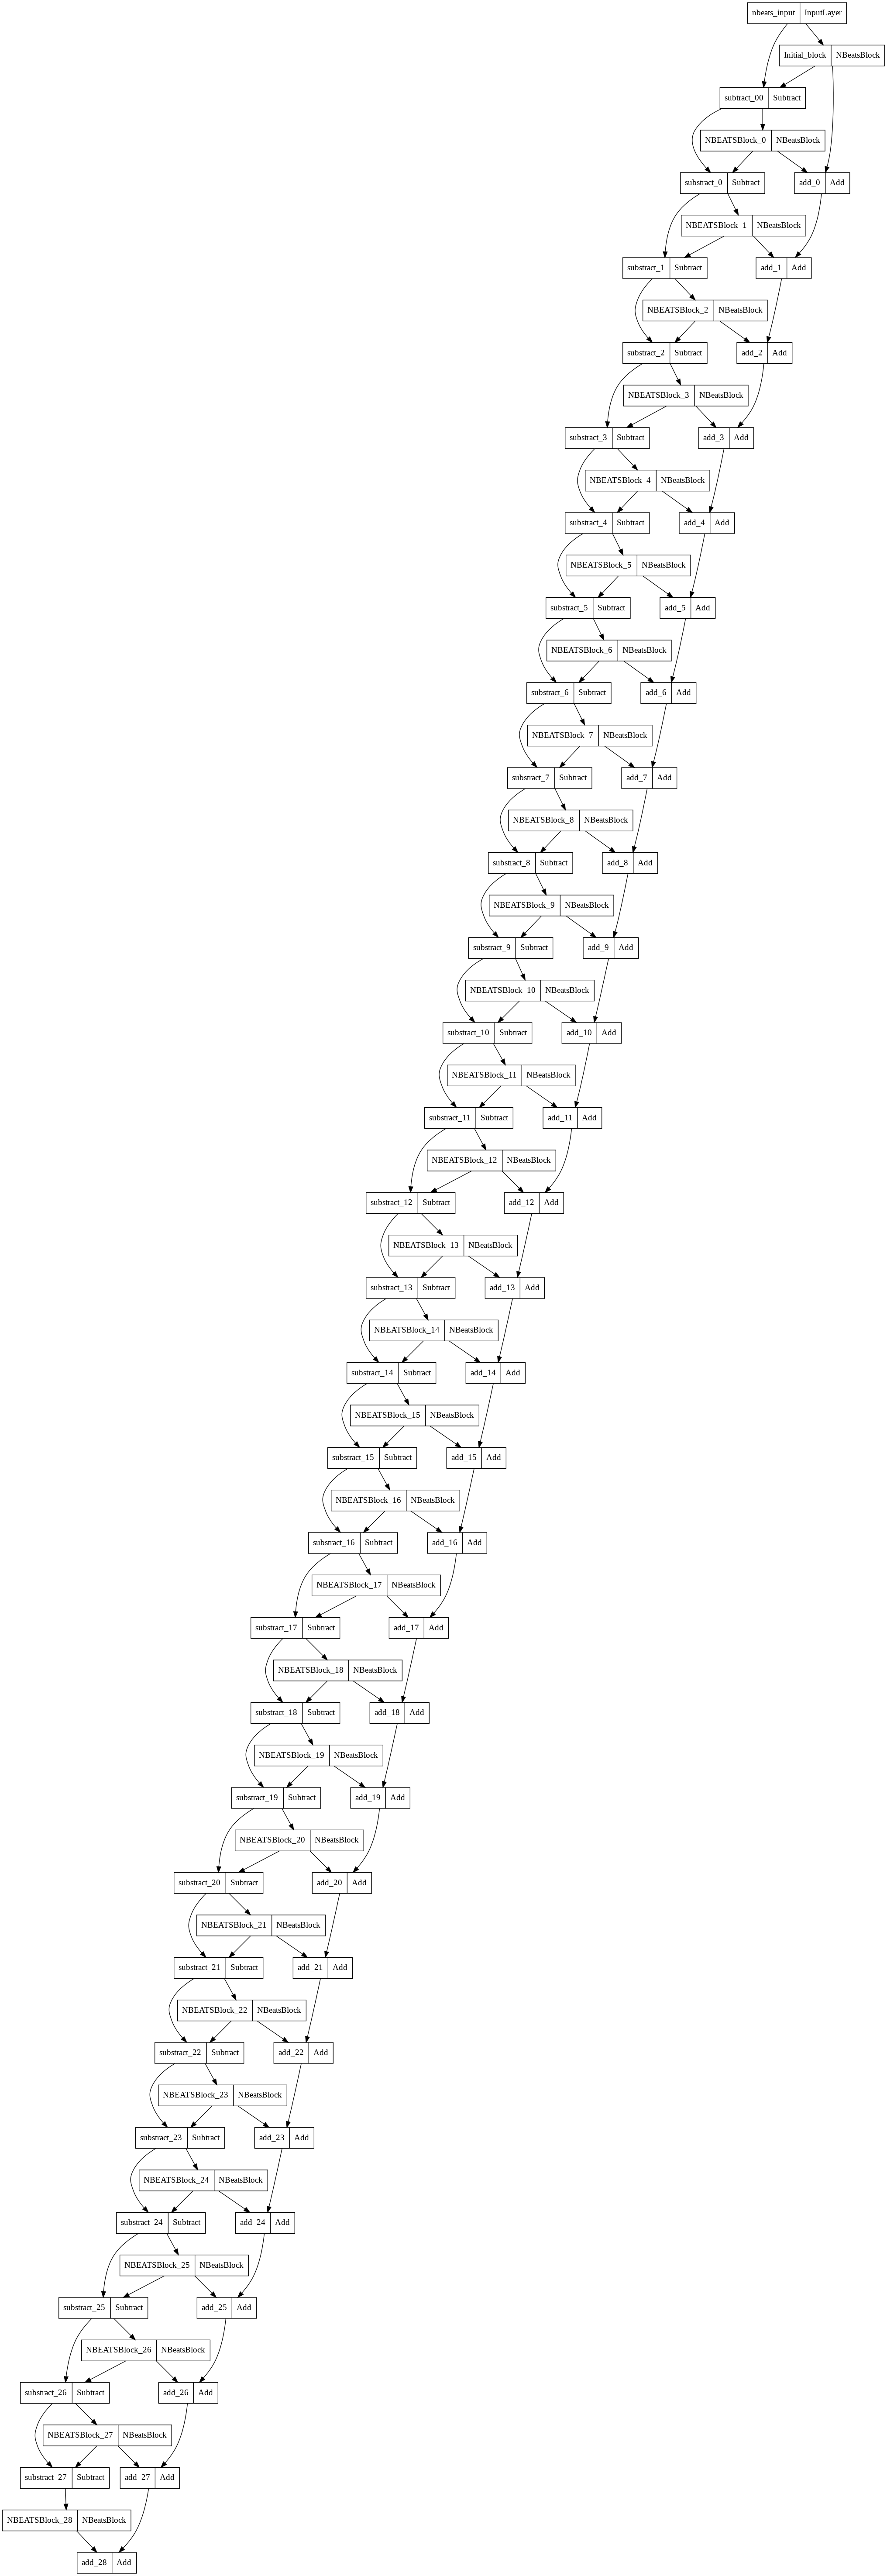

In [291]:
from tensorflow.keras.utils import plot_model
plot_model(model_7)

## `Model: 8` Ensemble Model(stacking different models together)

>An ensemble involves training and combining multiple different models on the same problem. Ensemble models are often the types of models you'll see winning data science competitions on websites like Kaggle

In [292]:
WINDOW_SIZE, HORIZON

(7, 1)

## Callbacks for the Ensemble Model

In [293]:
early_stopping_callback= create_early_stopping_callback(monitor='val_loss', patience=200, restore_best_weight="True")
learning_rate_callback= reduce_learning_rate_callback(monitor="val_loss", factor=0.1, patience=100, minimum_lr=0)

## Constructing and fitting an ensemble of models (using different loss functions)

In [294]:
def get_ensemble_models(horizon=HORIZON, 
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10, 
                        num_epochs=100, 
                        loss_fns=["mae", "mse", "mape"]):
  """
  Returns a list of num_iter models each trained on MAE, MSE and MAPE loss.

  For example, if num_iter=10, a list of 30 trained models will be returned:
  10 * len(["mae", "mse", "mape"]).
  """
  # Make empty list for trained ensemble models
  ensemble_models = []

  # Create num_iter number of models per loss function
  for i in range(num_iter):
    # Build and fit a new model with a different loss function
    for loss_function in loss_fns:
      print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}")

      # Construct a simple model (similar to model_1)
      # Initialize layers with normal (Gaussian) distribution so we can use the models for prediction
      #   # interval estimation later: https://www.tensorflow.org/api_docs/python/tf/keras/initializers/HeNormal
      inputs= layers.Input(shape=(WINDOW_SIZE,), dtype="float32", name="model_inputs")
      x=layers.Dense(128, kernel_initializer="he_normal", activation="relu")(inputs)
      x=layers.Dense(128, kernel_initializer="he_normal", activation="relu")(x)
      outputs=layers.Dense(HORIZON, activation="linear")(x)

      model= tf.keras.Model(inputs, outputs, name=f"model_{i}")

      # Compile simple model with current loss function
      model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae", "mse"])
      
      # Fit model
      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,
                # Add callbacks to prevent training from going/stalling for too long
                callbacks=[early_stopping_callback, learning_rate_callback, create_model_checkpoint('Ensemble_model_8')])
      
      # Append fitted model to list of ensemble models
      ensemble_models.append(model)

  return ensemble_models # return list of trained models

In [295]:
%%time
ensemble_models=get_ensemble_models(HORIZON, train_dataset, test_dataset)
ensemble_models

Optimizing model by reducing: mae for 100 epochs, model number: 0
Optimizing model by reducing: mse for 100 epochs, model number: 0
Optimizing model by reducing: mape for 100 epochs, model number: 0
Optimizing model by reducing: mae for 100 epochs, model number: 1
Optimizing model by reducing: mse for 100 epochs, model number: 1
Optimizing model by reducing: mape for 100 epochs, model number: 1
Optimizing model by reducing: mae for 100 epochs, model number: 2
Optimizing model by reducing: mse for 100 epochs, model number: 2
Optimizing model by reducing: mape for 100 epochs, model number: 2
Optimizing model by reducing: mae for 100 epochs, model number: 3
Optimizing model by reducing: mse for 100 epochs, model number: 3
Optimizing model by reducing: mape for 100 epochs, model number: 3
Optimizing model by reducing: mae for 100 epochs, model number: 4
Optimizing model by reducing: mse for 100 epochs, model number: 4
Optimizing model by reducing: mape for 100 epochs, model number: 4
Optim

In [296]:
ensemble_models

In [297]:
len(ensemble_models)

30

### Make Predictions with Ensemble Model

In [298]:
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data) # make predictions with current ensemble model
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))

In [299]:
ensemble_preds= make_ensemble_preds(ensemble_models, test_dataset)
ensemble_preds[:5]

<tf.Tensor: shape=(5, 651), dtype=float32, numpy=
array([[18664.781, 19142.17 , 18779.645, ..., 19906.516, 20043.941,
        20123.76 ],
       [18822.783, 19284.664, 19019.605, ..., 20162.023, 20245.635,
        20203.316],
       [19102.748, 19959.768, 19552.162, ..., 20800.514, 20662.693,
        20792.432],
       [18346.713, 19073.832, 19193.305, ..., 20505.207, 19929.576,
        20242.71 ],
       [18339.672, 19096.955, 18919.965, ..., 20032.676, 19717.86 ,
        19995.889]], dtype=float32)>

In [300]:
ensemble_preds.shape

TensorShape([30, 651])

In [301]:
test_labels.dtype

dtype('float64')

### Evaluate Ensemble model predictions

In [302]:
ensemble_results= evaluate_preds(tf.cast(test_labels, dtype="float32"), ensemble_preds)
ensemble_results

{'mae': 1635.5089,
 'mse': 5495082.5,
 'rmse': 2120.0564,
 'mape': 4.096838,
 'mase': 1.4298075}

## Ensemble `Mean` Predictions

In [303]:
ensemble_mean= tf.reduce_mean(ensemble_preds, axis=0)
ensemble_mean[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([18339.43 , 19042.186, 18765.229, 17333.982, 17115.336],
      dtype=float32)>

In [304]:
ensemble_mean_results= evaluate_preds(tf.cast(test_labels, dtype="float32"), ensemble_mean)
ensemble_mean_results

{'mae': 1158.9657,
 'mse': 2632280.2,
 'rmse': 1622.4303,
 'mape': 2.9190397,
 'mase': 1.0132002}

## Ensemble `Medium` Predictions

In [305]:
ensemble_medium= np.median(ensemble_preds, axis=0)
ensemble_medium[:5]

array([18455.098, 19126.035, 18887.602, 17391.578, 17267.201],
      dtype=float32)

In [306]:
ensemble_median_results= evaluate_preds(tf.cast(test_labels, dtype="float32"), ensemble_medium)
ensemble_median_results

{'mae': 1180.5465,
 'mse': 2739943.5,
 'rmse': 1655.2775,
 'mape': 2.9726608,
 'mase': 1.0320667}

In [307]:
ensemble_mean_results

{'mae': 1158.9657,
 'mse': 2632280.2,
 'rmse': 1622.4303,
 'mape': 2.9190397,
 'mase': 1.0132002}

In [308]:
model_1_results

{'mae': 1148.5936359959676,
 'mse': 2633934.6304410635,
 'rmse': 1622.9401191790976,
 'mape': 2.8890927225634364,
 'mase': 1.0041326500297292}

In [309]:
naive_results

{'mae': 1141.506761082822,
 'mse': 2592967.393714534,
 'rmse': 1610.269354398367,
 'mape': 2.8639307796373665,
 'mase': 0.9984741472055335}

## Plotting the prediction intervals (uncertainty estimates) of our ensemble

> Right now all of our model's (prior to the ensemble model) are predicting `single points`. Meaning, given a set of `WINDOW_SIZE=7` values, the model will predict `HORIZION=1`.

* But what might be more helpful than a `single value`? Perhaps a `range of values`?

> `For example`, if a model is predicting the price of Bitcoin to be `50,000USD tomorrow`, would it be helpful to know it's predicting the 50,000USD because it's predicting the price to be between `48,000 and 52,000USD`?

> Knowing the range of values a model is predicting may help you make better `decisions for your forecasts`.

> You'd know that although the model is predicting 50,000USD (a **point prediction**, or single value in time), the value could actually be within the range 48,000USD to 52,000USD (of course, the value could also be *outside* of this range as well, but we'll get to that later).

> These kind of prediction ranges are called **prediction intervals** or **uncertainty estimates**. And they're often as important as the forecast itself.

* `Why?`

> Because **point predictions** are almost always going to be wrong. So having a range of values can help with decision making.

> 📖 **Resource(s):** 
> * The steps we're about to take have been inspired by the Machine Learning Mastery blog post [*Prediction Intervals for Deep Learning Neural Networks*](https://machinelearningmastery.com/prediction-intervals-for-deep-learning-neural-networks/). Check out the post for more options to measure uncertainty with neural networks.
> * For an example of uncertainty estimates being used in the wild, I'd also refer to Uber's [*Engineering Uncertainty Estimation in Neural Networks for Time Series Prediction at Uber*](https://eng.uber.com/neural-networks-uncertainty-estimation/) blog post.

![example of Uber's prediction intervals for daily completed trips in San Francisco](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/10-prediction-intervals-from-ubers-uncertainty-measures.png)

> *Example of how uncertainty estimates and predictions intervals can give an understanding of where point predictions (a single number) may not include all of useful information you'd like to know. For example, your model's point prediction for Uber trips on New Years Eve might be 100 (a made up number) but really, the prediction intervals are between 55 and 153 (both made up for the example). In this case, preparing 100 rides might end up being 53 short (it could even be more, like the point prediction, the prediction intervals are also estimates). The image comes from Uber's [blog post on uncertainty estimation in neural networks](https://eng.uber.com/neural-networks-uncertainty-estimation/).*

### One way of getting the `95% condfidnece prediction intervals` for a deep learning model is the `bootstrap method`: 
1. Take the predictions from a number of randomly initialized models (we've got this thanks to our ensemble model)
2. Measure the standard deviation of the predictions
3. Multiply standard deviation by [1.96](https://en.wikipedia.org/wiki/1.96) (assuming the distribution is Gaussian, 95% of observations fall within 1.96 standard deviations of the mean, `this is why we initialized our neural networks with a normal distribution`)
4. To get the prediction interval upper and lower bounds, add and subtract the value obtained in (3) to the mean/median of the predictions made in (1)


In [310]:
tf.math.reduce_std(ensemble_preds, axis=0)

<tf.Tensor: shape=(651,), dtype=float32, numpy=
array([ 633.29755,  721.2684 ,  773.03827,  531.466  ,  491.33917,
        698.3502 ,  910.7439 , 1048.642  ,  935.0505 ,  656.6405 ,
        740.09344,  644.64294,  729.1225 ,  781.3887 ,  753.2675 ,
        635.3877 ,  579.15247,  674.1088 ,  667.7615 ,  804.3632 ,
        866.86755,  829.21576,  766.36975,  948.6033 , 1071.5947 ,
       1029.929  ,  929.3446 ,  850.1942 ,  720.33923,  854.1468 ,
        937.6753 ,  944.5079 , 1097.8667 , 1260.4326 , 1192.9735 ,
       1084.1882 , 1022.3276 , 1128.8059 , 1225.2312 , 1143.1676 ,
       1408.3174 , 1472.8234 , 1251.3291 , 1328.723  , 1563.7583 ,
       1824.7764 , 1791.6481 , 1555.2572 , 1294.6411 , 1274.0206 ,
       1187.2924 , 1682.5839 , 2390.4944 , 1963.5872 , 1199.6931 ,
       1334.085  , 1342.9451 , 1615.3844 , 1336.7112 , 1271.5409 ,
       1145.3998 , 1574.7405 , 1463.0112 , 1590.228  , 1331.4763 ,
       1072.303  , 1369.4833 , 1754.1151 , 1593.1616 , 1326.8488 ,
       1093.42

### Find the `Upper and lower` bound of ensemble predictions

In [311]:
def get_upper_lower_bounds(ensemble_predictions):
  std= tf.math.reduce_std(ensemble_predictions, axis=0)

  interval = std * 1.96

  preds_mean= tf.reduce_mean(ensemble_predictions, axis=0)
  upper, lower= preds_mean + interval, preds_mean - interval

  return lower, upper

In [312]:
lower, upper= get_upper_lower_bounds(ensemble_preds)
lower[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([17098.166, 17628.5  , 17250.074, 16292.309, 16152.312],
      dtype=float32)>

In [313]:
upper[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([19580.693, 20455.871, 20280.383, 18375.656, 18078.361],
      dtype=float32)>

In [314]:
lower.shape, upper.shape

(TensorShape([651]), TensorShape([651]))

### Plotting/Visualizing the predictions of the Ensemble Model

> Wonderful, now we've got the upper and lower bounds for the the 95% prediction interval, let's plot them against our ensemble model's predictions.

> To do so, we can use our plotting function as well as the `matplotlib.pyplot.fill_between()` method to shade in the space between the `upper and lower bounds`.


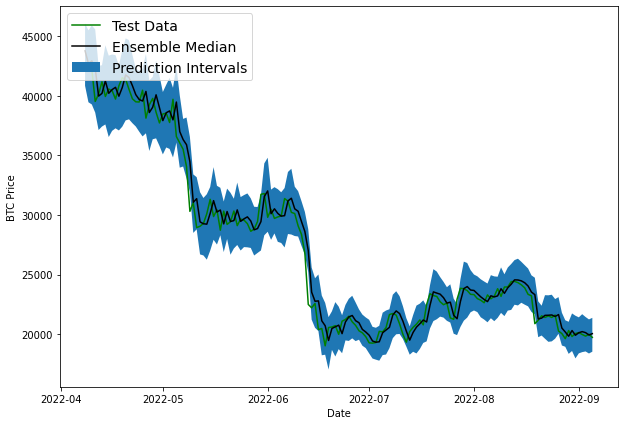

In [315]:
ensemble_median = np.median(ensemble_preds, axis=0)

# Plot the median of our ensemble preds along with the prediction intervals (where the predictions fall between)
offset=500
plt.figure(figsize=(10, 7))
plt.plot(test_windows.index[offset:], test_labels[offset:], "g", label="Test Data")
plt.plot(test_windows.index[offset:], ensemble_median[offset:], "k-", label="Ensemble Median")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.fill_between(test_windows.index[offset:], 
                 (lower)[offset:], 
                 (upper)[offset:], label="Prediction Intervals")
plt.legend(loc="upper left", fontsize=14);

## Conclusion

* The test data (the ground truth Bitcoin prices)
* The median of the ensemble predictions 
* The 95% prediction intervals (assuming the data is Gaussian/normal, the model is saying that 95% of the time, predicted value should fall between this range)

### What can you tell about the `ensemble model` from the plot above?

> It looks like the ensemble predictions are lagging slightly behind the actual data. And the prediction intervals are `fairly low throughout`.

> The combination of `lagging predictions` as well as `low prediction intervals` indicates that our ensemble model may be **overfitting** the data, meaning it's basically replicating what a naïve model would do and just predicting the previous timestep value for the next value.

* **Important** ->  `This would explain why previous attempts to beat the naïve forecast have been futile`.

> We can test this hypothesis of overfitting by creating a model to make predictions into the future and seeing what they look like.

> 🔑 **Note:** Our prediction intervals assume that the data we're using come from a Gaussian/normal distribution (also called a bell curve), however, open systems rarely follow the Gaussian. We'll see this later on with the turkey problem 🦃. For further reading on this topic, I'd recommend reading [*The Black Swan* by Nassim Nicholas Taleb](https://en.wikipedia.org/wiki/The_Black_Swan:_The_Impact_of_the_Highly_Improbable), especially Part 2 and Chapter 15.

## Aside: two types of uncertainty (coconut and subway)

* Inheritly, you know you cannot predict the future.

> That doesn't mean trying to isn't valuable.

> For many things, `future predictions are helpful`. Such as knowing the bus you're trying to catch to the library leaves at 10:08am. The time 10:08am is a `point prediction`, if the bus left at a random time every day, how helpful would it be?

> Just like saying the price of Bitcoin tomorrow will be 50,000USD is a point prediction.

> However, as we've discussed knowing a `prediction interval` or `uncertainty estimate` can be as helpful or even more helpful than a point prediction itself.

### `Uncertainty estimates` seek out to qualitatively and quantitatively answer the questions:

* What can my model know? (with perfect data, what's possible to learn?)
* What doesn't my model know? (what can a model never predict?)

### There are `two` types of `uncertainty` in machine learning you should be aware of:

* **Aleatoric uncertainty** - this type of uncertainty cannot be reduced, it is also referred to as "data" or "subway" uncertainty.
  * Let's say your train is scheduled to arrive at 10:08am but very rarely does it arrive at *exactly* 10:08am. You know it's usually a minute or two either side and perhaps up to 10-minutes late if traffic is bad. Even with all the data you could imagine, this level of uncertainty is still going to be present (much of it being noise).
  * When we measured prediction intervals, we were measuring a form of subway uncertainty for Bitcoin price predictions (a little either side of the point prediction).

* **Epistemic uncertainty** - this type of uncertainty can be reduced, it is also referred to as "model" or "coconut" uncertainty, it is very hard to calculate.
  * The analogy for coconut uncertainty involves whether or not you'd get hit on the head by a coconut when going to a beach. 
    * If you were at a beach with coconuts trees, as you could imagine, this would be very hard to calculate. How often does a coconut fall of a tree? Where are you standing? 
    * But you could reduce this uncertainty to zero by going to a beach without coconuts (collect more data about your situation).
  * Model uncertainty can be reduced by collecting more data samples/building a model to capture different parameters about the data you're modelling.

> The lines between these are blurred (one type of uncertainty can change forms into the other) and they can be confusing at first but are important to keep in mind for any kind of time series prediction.

> If you ignore the uncertanties, are you really going to get a reliable prediction?

* Perhaps another example might help.

### Uncertainty in dating

Let's say you're going on a First Date Feedback Radio Show to help improve your dating skills.

Where you go on a blind first date with a girl (feel free to replace girl with your own preference) and the radio hosts record the date and then playback snippets of where you could've improved.

And now let's add a twist. 

Last week your friend went on the same show. They told you about the girl they met and how the conversation went.

Because you're now a machine learning engineer, you decide to build a machine learning model to help you with first date conversations.

What levels of uncertainty do we have here? 

From an **aleatory uncertainty** (data) point of view, no matter how many conversations of first dates you collect, the conversation you end up having will likely be different to the rest (the best conversations have no subject and appear random).

From an **epistemic uncertainty** (model) point of view, if the date is truly blind and both parties don't know who they're seeing until they meet in person, the epistemic uncertainty would be high. Because now you have no idea who the person you're going to meet is nor what you might talk about.

However, the level of epistemic uncertainty would be reduced if your friend told about the girl they went on a date with last week on the show and it turns out you're going on a date with the same girl.

But even though you know a little bit about the girl, your `aleatory uncertainty` (or `subway uncertainty`) is still high because you're not sure where the conversation will go.

### Learning more on uncertainty

The field of quantifying uncertainty estimation in machine learning is a growing area of research.

If you'd like to learn more I'd recommend the following.

> 📖 **Resources:** Places to learn more about uncertainty in machine learning/forecasting:
* 🎥 [MIT 6.S191: Evidential Deep Learning and Uncertainty](https://youtu.be/toTcf7tZK8c) 
* [Uncertainty quantification on Wikipedia](https://en.wikipedia.org/wiki/Uncertainty_quantification#Aleatoric_and_epistemic_uncertainty)
* [*Why you should care about the Nate Silver vs. Nassim Taleb Twitter war*](https://towardsdatascience.com/why-you-should-care-about-the-nate-silver-vs-nassim-taleb-twitter-war-a581dce1f5fc) by Isaac Faber - a great insight into the role of uncertainty in the example of election prediction. 
* [*3 facts about time series forecasting that surprise experienced machine learning practitioners*](https://towardsdatascience.com/3-facts-about-time-series-forecasting-that-surprise-experienced-machine-learning-practitioners-69c18ee89387) by Skander Hannachi - fantastic outline of some of the main mistakes people make when building forecasting models, especially forgetting about uncertainty estimates.
* [*Engineering Uncertainty Estimation in Neural Networks for Time Series Prediction at Uber*](https://eng.uber.com/neural-networks-uncertainty-estimation/) - a discussion on techniques Uber used to engineer uncertainty estimates into their time sereis neural networks.


## `Model: 9` Train a model on the full historical data to make predictions into future

* What would a forecasting model be worth if we didn't use it to predict into the future?

> It's time we created a model which is able to make `future predictions on the price of Bitcoin`. To make predictions into the future, we'll train a model on the `full dataset` and then get to make predictions to some future horizon.

* Why use the full dataset?

> Previously, we split our data into training and test sets to evaluate how our model did on `pseudo-future data` (the test set). But since the goal of a forecasting model is to predict values into the `actual-future`, we won't be using a test set.

In [316]:
bitcoin_prices_windowed.head()

,Price,block_reward_size,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [317]:
bitcoin_prices_windowed.tail()

,Price,block_reward_size,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2022-09-01,20127.140625,6.25,20049.763672,19796.808594,20297.994141,19616.814453,20041.738281,20260.019531,21600.904297
2022-09-02,19969.771484,6.25,20127.140625,20049.763672,19796.808594,20297.994141,19616.814453,20041.738281,20260.019531
2022-09-03,19832.087891,6.25,19969.771484,20127.140625,20049.763672,19796.808594,20297.994141,19616.814453,20041.738281
2022-09-04,19986.712891,6.25,19832.087891,19969.771484,20127.140625,20049.763672,19796.808594,20297.994141,19616.814453
2022-09-05,19728.171875,6.25,19986.712891,19832.087891,19969.771484,20127.140625,20049.763672,19796.808594,20297.994141


### Creating the datasets

In [318]:
X_all= bitcoin_prices_windowed.dropna().drop(['Price', 'block_reward_size'], axis=1).to_numpy()
y_all= bitcoin_prices_windowed.dropna()["Price"].to_numpy()

### Making the datasets performant and load faster

In [319]:
features_dataset_all= tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all= tf.data.Dataset.from_tensor_slices(y_all)

dataset_all= tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

BATCH_SIZE=1024

dataset_all= dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

## Creating the Model

In [376]:
WINDOWS_SIZE, HORIZON

(7, 1)

In [377]:
inputs= layers.Input(shape=(WINDOWS_SIZE, ), dtype="float32", name="model_9_inputs")
x= layers.Dense(128, activation="relu")(inputs)
x= layers.Dense(128, activation="relu")(x)
x= layers.Dense(128, activation="relu")(x)
outputs= layers.Dense(HORIZON, activation="linear")(x)
model_9= tf.keras.Model(inputs, outputs, name="model_9_full_dataset")

In [378]:
model_9.summary()

Model: "model_9_full_dataset"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model_9_inputs (InputLayer)  [(None, 7)]              0         
                                                                 
 dense_239 (Dense)           (None, 128)               1024      
                                                                 
 dense_240 (Dense)           (None, 128)               16512     
                                                                 
 dense_241 (Dense)           (None, 128)               16512     
                                                                 
 dense_242 (Dense)           (None, 1)                 129       
                                                                 
Total params: 34,177
Trainable params: 34,177
Non-trainable params: 0
_________________________________________________________________


### callbacks for `Model_9`

In [379]:
early_stopping_callback= create_early_stopping_callback(monitor='loss', patience=200, restore_best_weight="True")
learning_rate_callback= reduce_learning_rate_callback(monitor="loss", factor=0.1, patience=100, minimum_lr=0)
# check_point_callback= model_check_point_callback('/content/model_experiments/model_9_full_dataset', False, False, 'loss')
# create_model_checkpoint('model_9_full_datset')

In [380]:
model_9.compile(loss="mae", optimizer=tf.keras.optimizers.Adam(), metrics=['mae', 'mse'])

history_model_9= model_9.fit(dataset_all, epochs=1000, callbacks=[early_stopping_callback, learning_rate_callback])

Epoch 1/1000
4/4 [==============================] - 0s 7ms/step - loss: 9037.2158 - mae: 9037.2158 - mse: 234397040.0000 - lr: 0.0010
Epoch 2/1000
4/4 [==============================] - 0s 6ms/step - loss: 3359.0984 - mae: 3359.0984 - mse: 32868484.0000 - lr: 0.0010
Epoch 3/1000
4/4 [==============================] - 0s 7ms/step - loss: 2644.4790 - mae: 2644.4790 - mse: 26021710.0000 - lr: 0.0010
Epoch 4/1000
4/4 [==============================] - 0s 6ms/step - loss: 1861.5623 - mae: 1861.5623 - mse: 12087921.0000 - lr: 0.0010
Epoch 5/1000
4/4 [==============================] - 0s 6ms/step - loss: 1570.3993 - mae: 1570.3993 - mse: 9301507.0000 - lr: 0.0010
Epoch 6/1000
4/4 [==============================] - 0s 5ms/step - loss: 1734.7338 - mae: 1734.7338 - mse: 10197090.0000 - lr: 0.0010
Epoch 7/1000
4/4 [==============================] - 0s 5ms/step - loss: 681.7203 - mae: 681.7203 - mse: 2153890.0000 - lr: 0.0010
Epoch 8/1000
4/4 [==============================] - 0s 5ms/step - loss: 

### How many timesteps to predict into the future?

In [381]:
INTO_FUTURE = 14 # since our Bitcoin data is daily, this is for 14 days

## Create function to make predictions into the future

![flowchart representation prediction loop to make forecasts and then append forecasts to data and make more forecasts continuously until forecast horizon is exhausted](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/10-prediction-loop-for-forecasts.png)
*Example flow chart representing the loop we're about to create for making forecasts. Not pictured: retraining a forecasting model every time a forecast is made & new data is acquired. For example, if you're predicting the price of Bitcoin daily, you'd want to retrain your model every day, since each day you're going to have a new data point to work with.*

Alright, let's create a function which returns `INTO_FUTURE` forecasted values using a trained model.

To do so, we'll build the following steps:
1. Function which takes as input: 
  * a list of values (the Bitcoin historical data)
  * a trained model (such as `model_9`)
  * a window into the future to predict (our `INTO_FUTURE` variable)
  * the window size a model was trained on (`WINDOW_SIZE`) - the model can only predict on the same kind of data it was trained on
2. Creates an empty list for future forecasts (this will be returned at the end of the function) and extracts the last `WINDOW_SIZE` values from the input values (predictions will start from the last `WINDOW_SIZE` values of the training data)
3. Loop `INTO_FUTURE` times making a prediction on `WINDOW_SIZE` datasets which update to remove the first the value and append the latest prediction 
  * Eventually future predictions will be made using the model's own previous predictions as input

In [382]:
# 1. Create function to make predictions into the future
def make_future_forecast(values, model, into_future, window_size=WINDOW_SIZE) -> list:
  """
  Makes future forecasts into_future steps after values ends.

  Returns future forecasts as list of floats.
  """
  # 2. Make an empty list for future forecasts/prepare data to forecast on
  future_forecast = []
  last_window = values[-WINDOW_SIZE:] # only want preds from the last window (this will get updated)

  # 3. Make INTO_FUTURE number of predictions, altering the data which gets predicted on each time 
  for _ in range(into_future):
    
    # Predict on last window then append it again, again, again (model starts to make forecasts on its own forecasts)
    future_pred = model.predict(tf.expand_dims(last_window, axis=0))
    print(f"Predicting on: \n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")
    
    # Append predictions to future_forecast
    future_forecast.append(tf.squeeze(future_pred).numpy())
    # print(future_forecast)

    # Update last window with new pred and get WINDOW_SIZE most recent preds (model was trained on WINDOW_SIZE windows)
    last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]
  
  return future_forecast

In [383]:
future_forecast= make_future_forecast(y_all,model_9, INTO_FUTURE, WINDOWS_SIZE)

Predicting on: 
 [19796.808594 20049.763672 20127.140625 19969.771484 19832.087891
 19986.712891 19728.171875] -> Prediction: 19773.458984375

Predicting on: 
 [20049.763672   20127.140625   19969.771484   19832.087891
 19986.712891   19728.171875   19773.45898438] -> Prediction: 20031.0859375

Predicting on: 
 [20127.140625   19969.771484   19832.087891   19986.712891
 19728.171875   19773.45898438 20031.0859375 ] -> Prediction: 20061.146484375

Predicting on: 
 [19969.771484   19832.087891   19986.712891   19728.171875
 19773.45898438 20031.0859375  20061.14648438] -> Prediction: 19928.5078125

Predicting on: 
 [19832.087891   19986.712891   19728.171875   19773.45898438
 20031.0859375  20061.14648438 19928.5078125 ] -> Prediction: 19843.53125

Predicting on: 
 [19986.712891   19728.171875   19773.45898438 20031.0859375
 20061.14648438 19928.5078125  19843.53125   ] -> Prediction: 19922.982421875

Predicting on: 
 [19728.171875   19773.45898438 20031.0859375  20061.14648438
 19928.50

In [384]:
bitcoin_prices_windowed.tail()

,Price,block_reward_size,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2022-09-01,20127.140625,6.25,20049.763672,19796.808594,20297.994141,19616.814453,20041.738281,20260.019531,21600.904297
2022-09-02,19969.771484,6.25,20127.140625,20049.763672,19796.808594,20297.994141,19616.814453,20041.738281,20260.019531
2022-09-03,19832.087891,6.25,19969.771484,20127.140625,20049.763672,19796.808594,20297.994141,19616.814453,20041.738281
2022-09-04,19986.712891,6.25,19832.087891,19969.771484,20127.140625,20049.763672,19796.808594,20297.994141,19616.814453
2022-09-05,19728.171875,6.25,19986.712891,19832.087891,19969.771484,20127.140625,20049.763672,19796.808594,20297.994141


### Plot future forecasts

This is so exciting! Forecasts made! 

But right now, they're just numbers on a page.

Let's bring them to life by adhering to the data explorer's motto: visualize, visualize, visualize!

To plot our model's future forecasts against the historical data of Bitcoin, we're going to need a series of future dates (future dates from the final date of where our dataset ends).

How about we create a function to return a date range from some specified start date to a specified number of days into the future (`INTO_FUTURE`).

To do so, we'll use a combination of NumPy's [`datetime64` datatype](https://numpy.org/doc/stable/reference/arrays.datetime.html) (our Bitcoin dates are already in this datatype) as well as NumPy's `timedelta64` method which helps to create date ranges.

In [385]:
future_forecast

[19773.459,
 20031.086,
 20061.146,
 19928.508,
 19843.531,
 19922.982,
 19647.367,
 19748.082,
 20000.824,
 19991.248,
 19902.242,
 19849.93,
 19849.77,
 19578.637]

In [386]:
len(future_forecast)

14

In [387]:
def get_future_dates(start_date, into_future, offset=1):
  """
  Returns array of datetime values from ranging from start_date to start_date+horizon.

  start_date: date to start range (np.datetime64)
  into_future: number of days to add onto start date for range (int)
  offset: number of days to offset start_date by (default 1)
  """
  start_date = start_date + np.timedelta64(offset, "D") # specify start date, "D" stands for day
  end_date = start_date + np.timedelta64(into_future, "D") # specify end date
  return np.arange(start_date, end_date, dtype="datetime64[D]") # return a date range between start date and end date

### Last Timestep of price of Bitcoin in DataFrame

In [388]:
last_timestep = bitcoin_prices.index[-1]
last_timestep

Timestamp('2022-09-05 00:00:00')

### Get next two weeks of timesteps

In [389]:
next_time_steps = get_future_dates(start_date=last_timestep, 
                                   into_future=INTO_FUTURE)
next_time_steps, len(next_time_steps)

(array(['2022-09-06', '2022-09-07', '2022-09-08', '2022-09-09',
        '2022-09-10', '2022-09-11', '2022-09-12', '2022-09-13',
        '2022-09-14', '2022-09-15', '2022-09-16', '2022-09-17',
        '2022-09-18', '2022-09-19'], dtype='datetime64[D]'), 14)

In [390]:
btc_prices[:-1][:5]

[123.65499, 125.455, 108.58483, 118.67466, 121.33866]

In [391]:
bitcoin_prices[:5]

,Price,block_reward_size
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


In [392]:
# Insert last timestep/final price so the graph doesn't look messed
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, btc_prices[-1])
next_time_steps, future_forecast

(array(['2022-09-05', '2022-09-06', '2022-09-07', '2022-09-08',
        '2022-09-09', '2022-09-10', '2022-09-11', '2022-09-12',
        '2022-09-13', '2022-09-14', '2022-09-15', '2022-09-16',
        '2022-09-17', '2022-09-18', '2022-09-19'], dtype='datetime64[D]'),
 array([19728.172, 19773.459, 20031.086, 20061.146, 19928.508, 19843.531,
        19922.982, 19647.367, 19748.082, 20000.824, 19991.248, 19902.242,
        19849.93 , 19849.77 , 19578.637], dtype=float32))

In [393]:
next_time_steps.shape, future_forecast.shape

((15,), (15,))

In [394]:
bitcoin_prices.index[:5]

DatetimeIndex(['2013-10-01', '2013-10-02', '2013-10-03', '2013-10-04',
               '2013-10-05'],
              dtype='datetime64[ns]', name='Date', freq=None)

### Plot future price predictions of Bitcoin

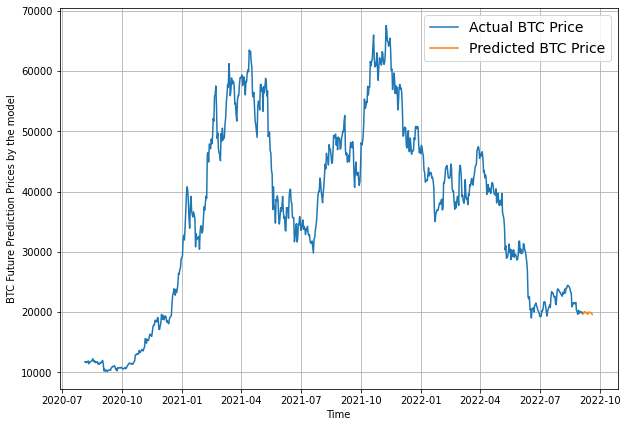

In [395]:
plt.figure(figsize=(10, 7))
plot_time_series(bitcoin_prices.index, btc_prices, start=2500, format="-", label="Actual BTC Price", ylabel="BTC Future Prediction Prices by the model")
plot_time_series(next_time_steps, future_forecast, format="-", label="Predicted BTC Price", ylabel="BTC Future Prediction Prices by the model")

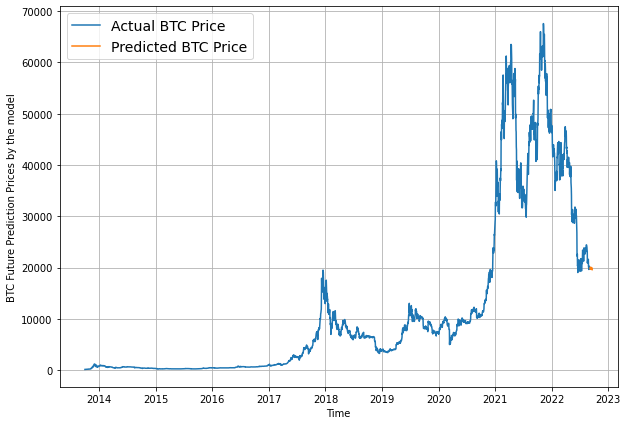

In [396]:
plt.figure(figsize=(10, 7))
plot_time_series(bitcoin_prices.index, btc_prices, format="-", label="Actual BTC Price", ylabel="BTC Future Prediction Prices by the model")
plot_time_series(next_time_steps, future_forecast, format="-", label="Predicted BTC Price", ylabel="BTC Future Prediction Prices by the model")

In [397]:
INTO_FUTURE

14

## Predicting `100` days into the future for the prices of bitcoin

In [398]:
INTO_FUTURE= 100
future_forecast= make_future_forecast(y_all,model_9, INTO_FUTURE, WINDOWS_SIZE)

Predicting on: 
 [19796.808594 20049.763672 20127.140625 19969.771484 19832.087891
 19986.712891 19728.171875] -> Prediction: 19773.458984375

Predicting on: 
 [20049.763672   20127.140625   19969.771484   19832.087891
 19986.712891   19728.171875   19773.45898438] -> Prediction: 20031.0859375

Predicting on: 
 [20127.140625   19969.771484   19832.087891   19986.712891
 19728.171875   19773.45898438 20031.0859375 ] -> Prediction: 20061.146484375

Predicting on: 
 [19969.771484   19832.087891   19986.712891   19728.171875
 19773.45898438 20031.0859375  20061.14648438] -> Prediction: 19928.5078125

Predicting on: 
 [19832.087891   19986.712891   19728.171875   19773.45898438
 20031.0859375  20061.14648438 19928.5078125 ] -> Prediction: 19843.53125

Predicting on: 
 [19986.712891   19728.171875   19773.45898438 20031.0859375
 20061.14648438 19928.5078125  19843.53125   ] -> Prediction: 19922.982421875

Predicting on: 
 [19728.171875   19773.45898438 20031.0859375  20061.14648438
 19928.50

In [400]:
last_timestep = bitcoin_prices.index[-1]
last_timestep

Timestamp('2022-09-05 00:00:00')

In [401]:
next_time_steps = get_future_dates(start_date=last_timestep, 
                                   into_future=INTO_FUTURE)
next_time_steps, len(next_time_steps)

(array(['2022-09-06', '2022-09-07', '2022-09-08', '2022-09-09',
        '2022-09-10', '2022-09-11', '2022-09-12', '2022-09-13',
        '2022-09-14', '2022-09-15', '2022-09-16', '2022-09-17',
        '2022-09-18', '2022-09-19', '2022-09-20', '2022-09-21',
        '2022-09-22', '2022-09-23', '2022-09-24', '2022-09-25',
        '2022-09-26', '2022-09-27', '2022-09-28', '2022-09-29',
        '2022-09-30', '2022-10-01', '2022-10-02', '2022-10-03',
        '2022-10-04', '2022-10-05', '2022-10-06', '2022-10-07',
        '2022-10-08', '2022-10-09', '2022-10-10', '2022-10-11',
        '2022-10-12', '2022-10-13', '2022-10-14', '2022-10-15',
        '2022-10-16', '2022-10-17', '2022-10-18', '2022-10-19',
        '2022-10-20', '2022-10-21', '2022-10-22', '2022-10-23',
        '2022-10-24', '2022-10-25', '2022-10-26', '2022-10-27',
        '2022-10-28', '2022-10-29', '2022-10-30', '2022-10-31',
        '2022-11-01', '2022-11-02', '2022-11-03', '2022-11-04',
        '2022-11-05', '2022-11-06', '202

In [402]:
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, btc_prices[-1])
next_time_steps, future_forecast

(array(['2022-09-05', '2022-09-06', '2022-09-07', '2022-09-08',
        '2022-09-09', '2022-09-10', '2022-09-11', '2022-09-12',
        '2022-09-13', '2022-09-14', '2022-09-15', '2022-09-16',
        '2022-09-17', '2022-09-18', '2022-09-19', '2022-09-20',
        '2022-09-21', '2022-09-22', '2022-09-23', '2022-09-24',
        '2022-09-25', '2022-09-26', '2022-09-27', '2022-09-28',
        '2022-09-29', '2022-09-30', '2022-10-01', '2022-10-02',
        '2022-10-03', '2022-10-04', '2022-10-05', '2022-10-06',
        '2022-10-07', '2022-10-08', '2022-10-09', '2022-10-10',
        '2022-10-11', '2022-10-12', '2022-10-13', '2022-10-14',
        '2022-10-15', '2022-10-16', '2022-10-17', '2022-10-18',
        '2022-10-19', '2022-10-20', '2022-10-21', '2022-10-22',
        '2022-10-23', '2022-10-24', '2022-10-25', '2022-10-26',
        '2022-10-27', '2022-10-28', '2022-10-29', '2022-10-30',
        '2022-10-31', '2022-11-01', '2022-11-02', '2022-11-03',
        '2022-11-04', '2022-11-05', '202

### Plot future price predictions of Bitcoin for `100` days into the future

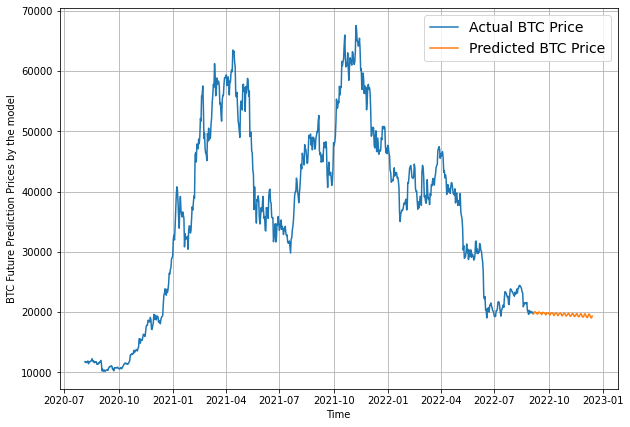

In [403]:
plt.figure(figsize=(10, 7))
plot_time_series(bitcoin_prices.index, btc_prices, start=2500, format="-", label="Actual BTC Price", ylabel="BTC Future Prediction Prices by the model")
plot_time_series(next_time_steps, future_forecast, format="-", label="Predicted BTC Price", ylabel="BTC Future Prediction Prices by the model")